## Master-thesis: Credit Risk Modeling @ Nova SBE

Created by: Dornigg, Thomas (41727)

<p align="center">
  <img width="600" height="450" src="https://i2.wp.com/testblog.earlysalary.com/wp-content/uploads/2020/06/rendered-1.png?fit=1024%2C512&ssl=1">
</p>

**Business Problem**<br>
In today’s financial markets, banks play a crucial role, especially when it comes to the decision on who should be granted a loan and under which market conditions. A major issue which financial institutions haveto face in this process is the risk of non-payment of its counterparty, meaning that banks need to pay special attention not to give a loan to risky borrowers. However, since banks have to analyze and process a certain amount of applications every day, this method is time-consuming and the result of the evaluation, when done manually, prone to errors. In this case, the best option for the bank is to evaluate the customer based on its previous credit history in a fully automatic way. To do so, statistical credit scoring algorithms are required to overcome those challenges. These algorithms, which compute probability of defaults for each applicant based on the credit history of its customers, are the main methods which financial institutions nowadays use to determine whether a loan should be granted to a borrower or not.

Regarding the machine learning problem we are facing in this project, since we are trying to build and train a model to predict whether a loan applicant should be granted a loan or not, it is clearly a classification problem where we have two different classes to group our data:<br>
- default or <br>
- non default<br>

The end goal is to use a robust model as part of a risk assessment before potential customers are sanctioned a loan from a financial institution. 

The dataset **"Credit Risk Dataset"** for this project can be found on <a href="https://www.kaggle.com/laotse/credit-risk-dataset/tasks">Kaggle</a>. It was published by Lao Tse under the CC0 public licence (usability 7/10). The data contains basic financial information about 31,679 borrowers with a total of 12 features related to each of the borrowers. Along with it, there are more specific information provided about every particular borrower. A full list of variables can be found below:

- **age**: is the age of the person at the time of the loan (numerical variable)
- **income**: is the yearly income of the person at the time of the loan (numerical variable)
- **home status**: is the type of ownership of the home (categorical variable; “rent”, “mortgage” or “own”)
- **employment length**: is the amount of time in years that person is employed (numerical variable)
- **loan intent**: is the aim of the loan (categorical variable; “education”, “medical”, “venture”, “home improvement”, “personal” or “debt consolidation”)
- **loan amount**: is the dimension of the loan taken in dollars (numerical variable)
- **loan grade**: is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of the collateral, and the likelihood of repayment of the principal and interest (categorical variable)
- **interest rate**: is the interest paid for the loan in percentage (numerical variable)
- **loan to income ratio**: is the ratio between the loan taken and the annual income (numerical variable; between 0 and 1)
- **historical default**: answers whether the person has defaulted before (categorical variable; “Y” or “N”)
- **loan status**: numerical variable; 0 (no default) or 1 (default)

In [90]:
# @hidden
from IPython.display import HTML
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('.cm-comment:contains(@hidden)').closest('div.input').hide();
 }else {
 $('.cm-comment:contains(@hidden)').closest('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
The raw code for this notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

#### Libraries

In [257]:
# @hidden
from IPython.display import display 
import numpy as np 
import pandas as pd
import random
import pickle
import string
import warnings
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

#-----------------Plots
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import pylab as pl
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline
%config InlineBackend.figure_format='retina'

#-----------------Pre-processing
import category_encoders as ce
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from yellowbrick.model_selection import RFECV

#-----------------Feature Importance
from sklearn.feature_selection import SelectKBest, f_classif ,mutual_info_classif
from sklearn.feature_selection import SelectFromModel
import shap

#-----------------Modelling
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#-----------------Scores and Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score as cv_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.metrics import roc_curve
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

#-----------------GUI
from ipywidgets import *
from IPython.display import display
import ipywidgets as widgets

#### Data import

In [2]:
# @hidden
url = 'https://raw.githubusercontent.com/ThomasD96/University_Repo/master/Nova_SBE/Master_thesis/data/credit_risk_dataset.csv'
df = pd.read_csv(url, low_memory = True)

column_rename = {
                'person_age':'age',
                'person_income':'income',
                'person_home_ownership':'home_ownership',
                'person_emp_length':'emp_length',
                'loan_int_rate':'interest_rate',
                'loan_status':'status',
                'loan_amnt':'amount',
                'loan_grade':'grade',
                'cb_person_default_on_file' :'historical_default',    
                'cb_person_cred_hist_length':'cred_history_length'
                }

df = df.rename(columns = column_rename)

### 1. EDA
In the following EDA process, basic statistics and graphs were considered to find trends, anomalies, patterns, and relationships within the data. The goal of this EDA is to explore what the data can tell and will follow a top to bottom approach. First, a general overview will identify individual features that draw attention and may be of interest for further analysis. Later, these findings can be used for the construction of the model, the selection of features, and the interpretation of the model.

#### Target variable

In [231]:
# @hidden
default = df[df.status == 1]
no_default = df[df.status == 0]
percentage_defaulters= round((len(default)*100)/len(df),2)
percentage_nondefaulters= round((len(no_default)*100)/len(df),2)

print("The Percentage of people who have paid their loan is:", percentage_nondefaulters,"%")
print("The Percentage of people who have NOT paid their loan is:", percentage_defaulters,"%")
print("The Ratio of Data Imbalance is:",round(len(no_default)/len(default),2))

The Percentage of people who have paid their loan is: 78.18 %
The Percentage of people who have NOT paid their loan is: 21.82 %
The Ratio of Data Imbalance is: 3.58


In [232]:
# @hidden
percentage_nondefaulters_adjusted = str(percentage_nondefaulters) + "%"
percentage_defaulters_adjusted = str(percentage_defaulters) + "%"
no_default_len = len(no_default)
no_default_len = "(" + str(no_default_len) + ")"
default_len = len(default)
default_len = "(" + str(default_len) + ")"

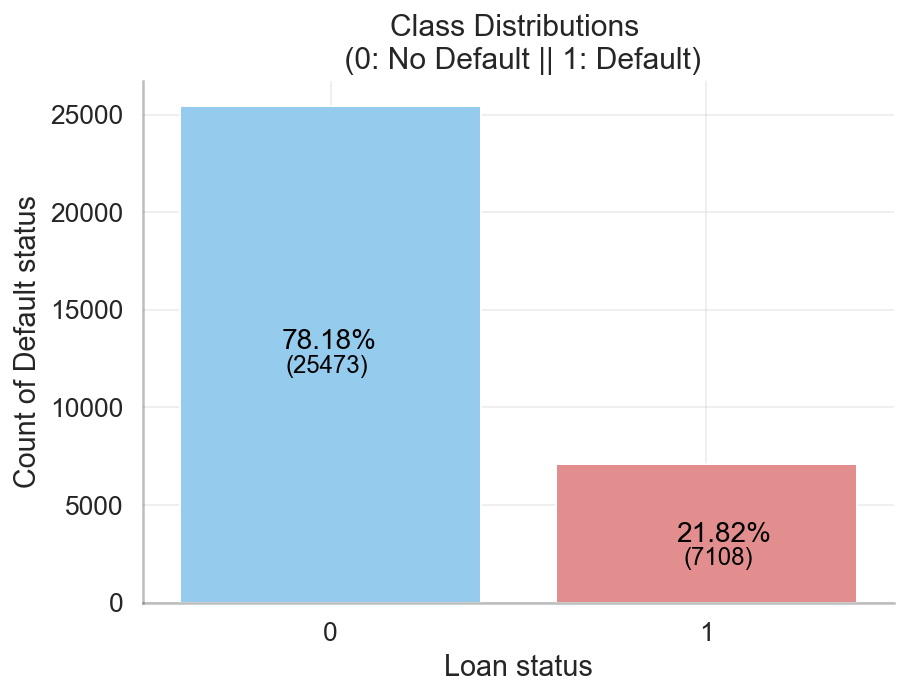

In [238]:
# @hidden
# https://matplotlib.org/stable/gallery/color/named_colors.html
colors = ["lightskyblue", "lightcoral"]
sns.set_context('notebook', font_scale=1.2)
plt.figure(figsize=(6, 4.8))
sns.countplot(df.status, palette=colors)
plt.xlabel("Loan status")
plt.annotate(percentage_nondefaulters_adjusted, xy=(-0.13, 13000), color = 'black', size = 14)
plt.annotate(no_default_len, xy=(-0.12, 11780), color = 'black', size = 12)
plt.annotate(percentage_defaulters_adjusted, xy=(0.92, 3100), color = 'black', size = 14)
plt.annotate(default_len, xy=(0.94, 1950), color = 'black', size = 12)
plt.ylabel("Count of Default status")
plt.title('Class Distributions \n (0: No Default || 1: Default)', fontsize=15)
plt.grid(axis='both', alpha=.3)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)
plt.show()

#### Default proportion of loan grades

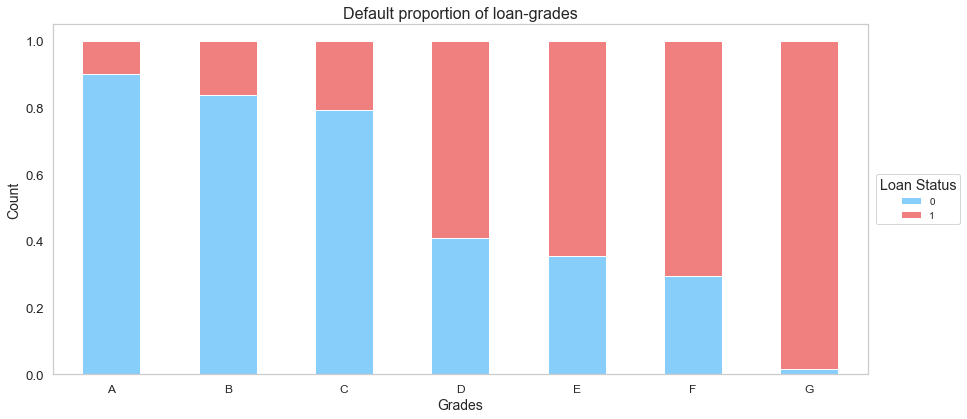

In [136]:
# @hidden
x_ticks = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
fig = plt.figure(figsize=(13,6))

ax1 = fig.add_subplot(111)

grades = df.loc[(df['grade'] == 'A') | 
                (df['grade'] == 'B') | 
                (df['grade'] == 'C') | 
                (df['grade'] == 'D') | 
                (df['grade'] == 'E') | 
                (df['grade'] == 'F') | 
                (df['grade'] == 'G') ]

grade_target = grades.groupby(['grade'])['status'].value_counts(normalize=True)
grade_target.unstack().plot(kind='bar', 
                            stacked=True, 
                            colormap='Spectral', 
                            figsize=(13,6), 
                            grid=False,
                            color = colors,
                            ax=ax1)
ax1.set_xlabel("Grades", size = 14)
ax1.set_ylabel("Count", size = 14)
ax1.set_title("Default proportion of loan-grades", size = 16)
ax1.legend(loc="center right", prop={'size': 10}, bbox_to_anchor=(1.12, 0.50), title='Loan Status')
ax1.set_xticklabels(x_ticks, fontsize=12, rotation=0)
plt.show()

#### Heatmap

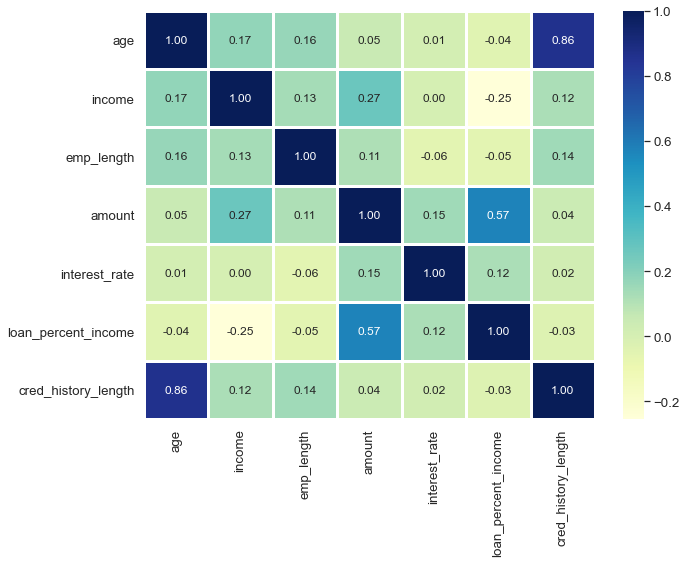

In [161]:
# @hidden
# compute correlation of dataset
df_corr = df.drop('status', 1).corr()

# figure size
plt.figure(figsize=(9,7))

# heatmap
sns.heatmap(df_corr, cmap="YlGnBu", annot=True, linewidths=1.01, fmt = ".2f", annot_kws={"size": 12})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

#### Pairplot

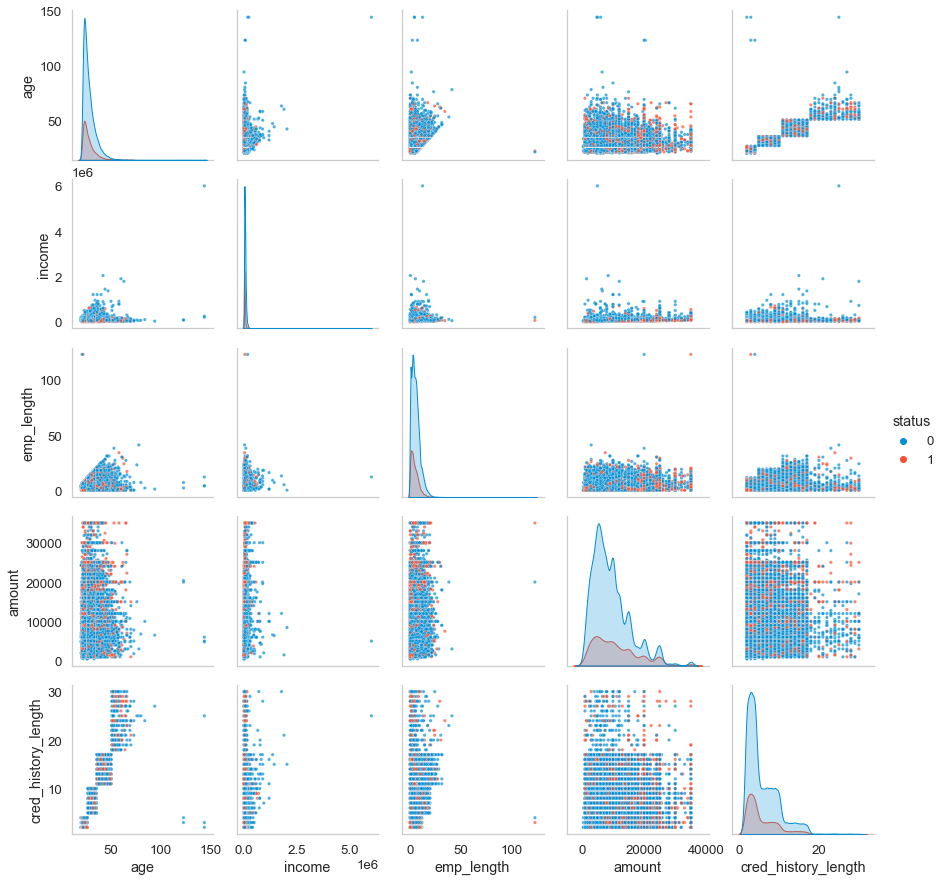

In [167]:
# @hidden
df_numeric = ["age","income","emp_length","amount","cred_history_length"]
sns.pairplot(df, hue = 'status', vars=df_numeric, plot_kws={"s": 11, 'alpha': 0.7})

#### Skweness of variables

In [168]:
# @hidden
num_cols = pd.DataFrame(df[df.select_dtypes(include=['float64', 'int64']).columns])
num_cols_hist = num_cols.drop(['status'], axis=1)
num_cols_hist = num_cols_hist.dropna()

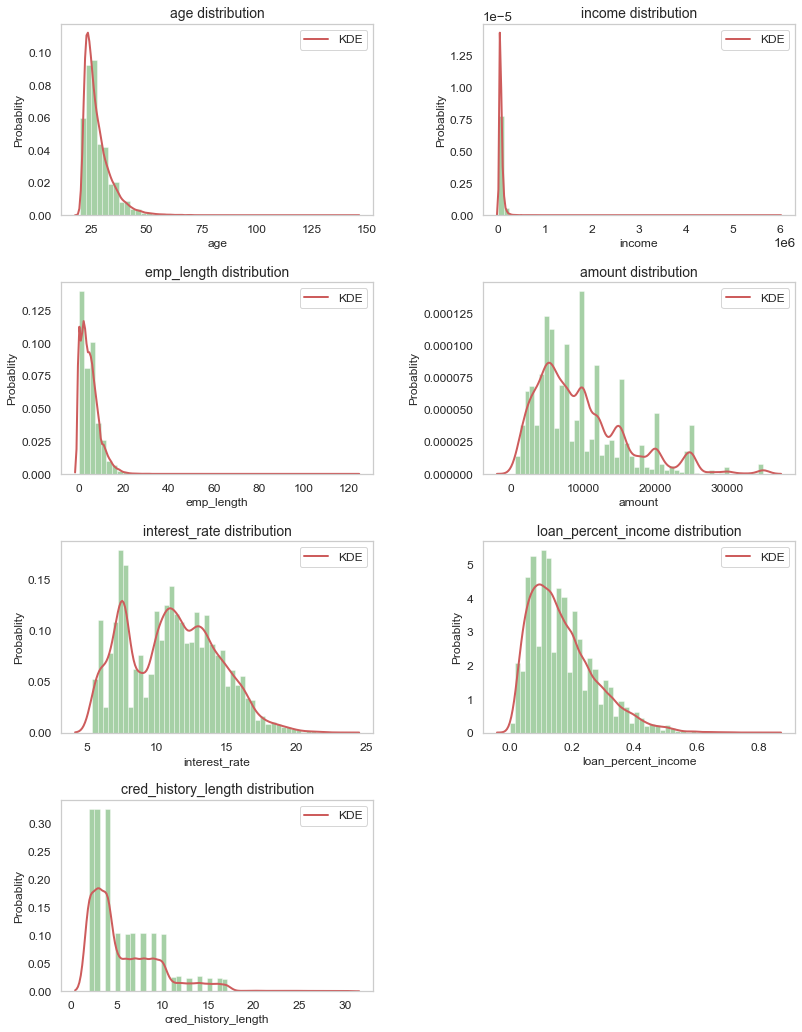

In [169]:
# @hidden
plt.figure(figsize=(12,16))

for i, col in enumerate(num_cols_hist.columns):
    idx = int('42'+ str(i+1))
    plt.subplot(idx)
    sns.distplot(num_cols_hist[col], color='forestgreen', kde_kws={'color': 'indianred', 'lw': 2, 'label': 'KDE'})
    plt.title(col+' distribution', fontsize=14)
    plt.ylabel('Probablity', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['KDE'], prop={"size":12})

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)
plt.show()

Observation: All of the distributions are positive skewed.<br>
- person_age: Most people are 20 to 60 years old. In the following analysis, to be more general, people age > 100 will be droped.<br>
- person_emp_length: Most people have less than 40 years of employment. People with employment > 60 years will be droped.<br>
- person_income: It seems that there are outliers which has to be removed (> 4 million).<br>
- For all other variables, the distribution is more uniform across the whole range, thus they will be kept.

####  HOME OWNERSHIP of applicants

This graph shows the absolute frequencies of the type of home ownership with respect to people that has defaulted. It is possible to notice that tipically who pays a rent is more likely to default considering all the orher classes.

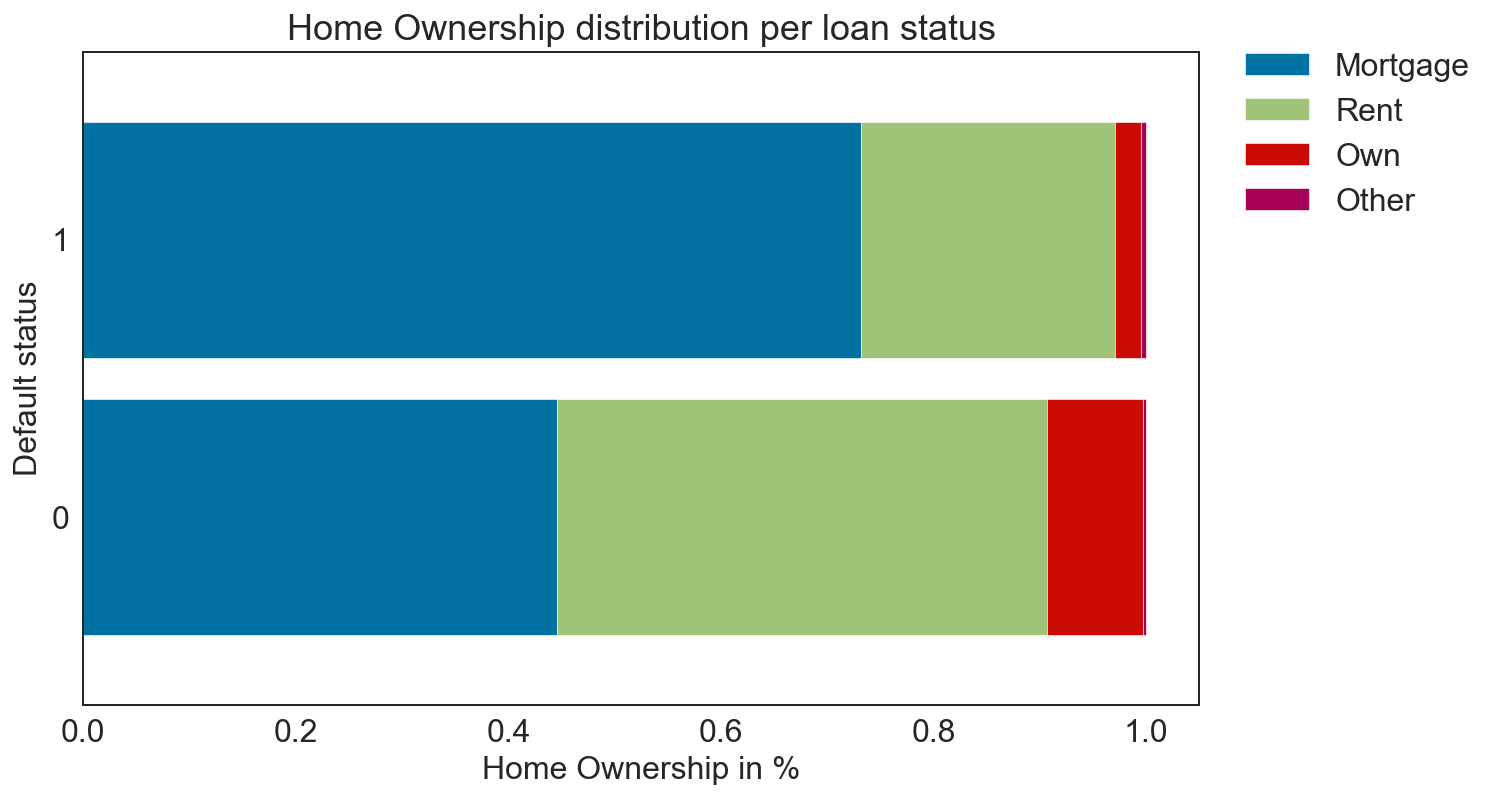

In [221]:
# @hidden
df_no_defaults = df[df['status'] == 0]
df_with_defaults = df[df['status'] == 1]

df_home_no = df_no_defaults.home_ownership.value_counts().reset_index()

def tm_sorter(column):
    """Sort function"""
    teams = ['RENT', 'MORTGAGE', 'OWN', 'OTHER']
    correspondence = {team: order for order, team in enumerate(teams)}
    return column.map(correspondence)

df_home_no = df_home_no.sort_values(by='index', key=tm_sorter)

df_home_no_sum = df_home_no['home_ownership'].sum()
df_home_no_sum_list = df_home_no['home_ownership'].to_list()
df_home_no_sum_list = [number / df_home_no_sum for number in df_home_no_sum_list]

df_home_with = df_with_defaults.home_ownership.value_counts().reset_index()
df_home_with_sum = df_home_with['home_ownership'].sum()
df_home_with_sum_list = df_home_with['home_ownership'].to_list()
df_home_with_sum_list = [number / df_home_with_sum for number in df_home_with_sum_list]

df_stack_chart = pd.DataFrame(list(zip(df_home_no_sum_list, df_home_with_sum_list)), columns = ['0', '1']).T
df_stack_chart.columns = ['Mortgage', 'Rent', 'Own', 'Other']
df_stack_chart['col'] = ['0', '1']

plt.rcParams["figure.figsize"] = (10,6)
df_stack_chart.plot(x='col', kind='barh', stacked=True, title='Home Ownership distribution per loan status', width=0.85)
plt.legend(bbox_to_anchor=(1.05, 0.985), loc='upper left', borderaxespad=-0.7)
plt.ylabel('Default status')
plt.xlabel('Home Ownership in %')
plt.show()

#### LOAN INTENT of applicants

Here we compare people that has and has not defaulted, to the purpose of the requested loan. As we have noted before, the loan intent variable is well distributed, however when the loan is dedicated to debts consolidation and for medical purposes, it seems more likely to lead to a default of the debt.

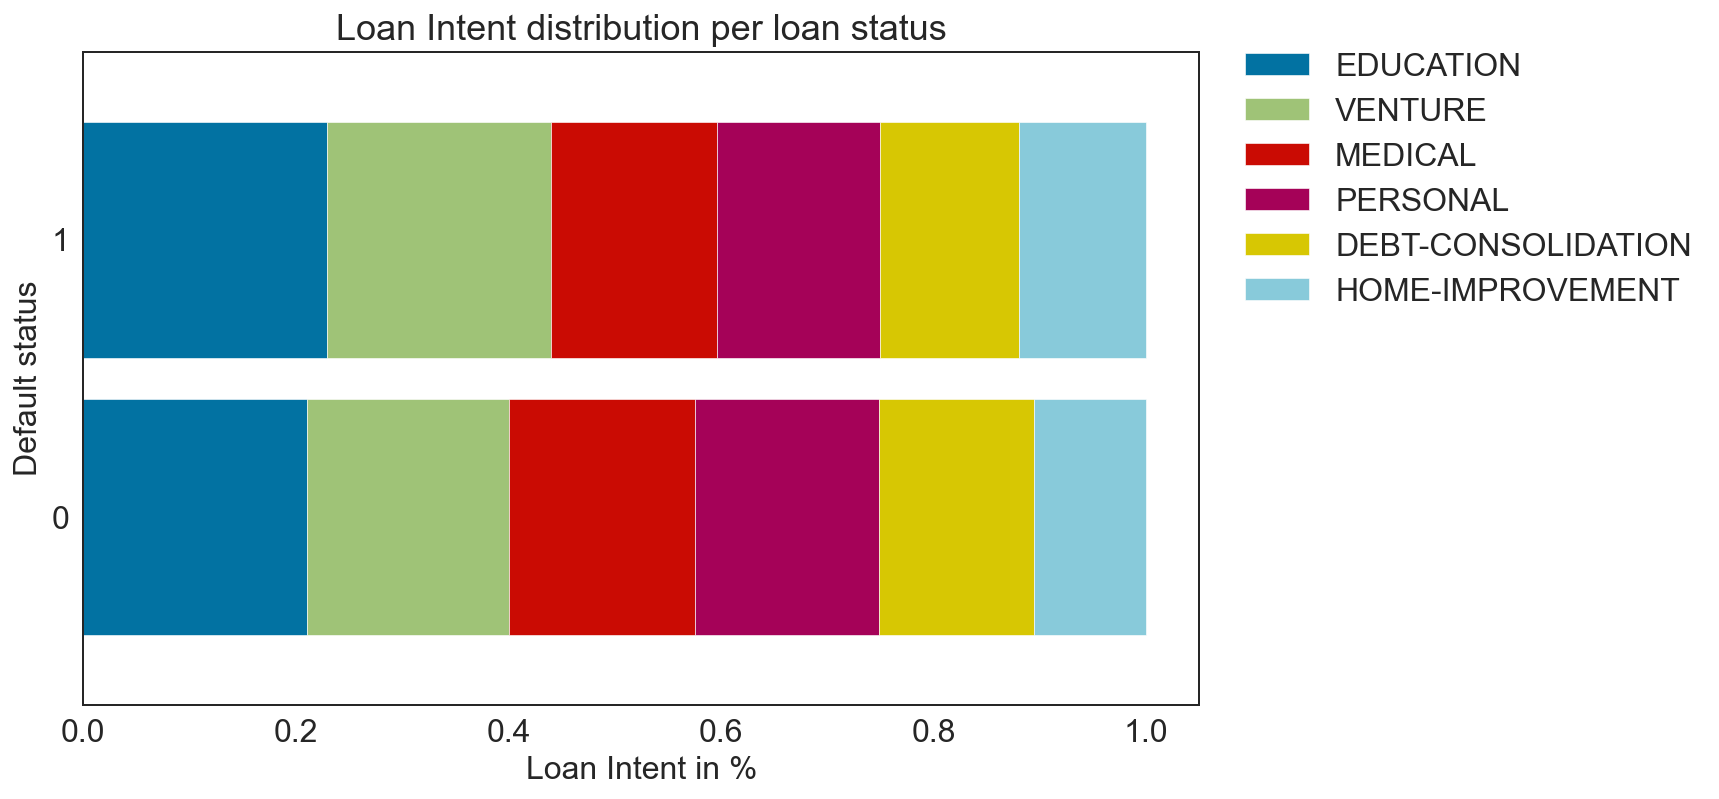

In [227]:
# @hidden
df_no_defaults = df[df['status'] == 0]
df_with_defaults = df[df['status'] == 1]

df_intent_no = df_no_defaults.loan_intent.value_counts().reset_index()

def tm_sorter(column):
    """Sort function"""
    teams = ['EDUCATION', 'VENTURE', 'MEDICAL', 'PERSONAL', 'DEBTCONSOLIDATION', 'HOMEIMPROVEMENT']
    correspondence = {team: order for order, team in enumerate(teams)}
    return column.map(correspondence)

df_intent_no = df_intent_no.sort_values(by='index', key=tm_sorter)

df_intent_no_sum = df_intent_no['loan_intent'].sum()
df_intent_no_sum_list = df_intent_no['loan_intent'].to_list()
df_intent_no_sum_list = [number / df_intent_no_sum for number in df_intent_no_sum_list]

df_intent_with = df_with_defaults.loan_intent.value_counts().reset_index()
df_intent_with_sum = df_intent_with['loan_intent'].sum()
df_intent_with_sum_list = df_intent_with['loan_intent'].to_list()
df_intent_with_sum_list = [number / df_intent_with_sum for number in df_intent_with_sum_list]

df_stack_chart = pd.DataFrame(list(zip(df_intent_no_sum_list, df_intent_with_sum_list)), columns = ['0', '1']).T
df_stack_chart.columns = ['EDUCATION', 'VENTURE', 'MEDICAL', 'PERSONAL', 'DEBT-CONSOLIDATION', 'HOME-IMPROVEMENT']
df_stack_chart['col'] = ['0', '1']

plt.rcParams["figure.figsize"] = (10,6)
df_stack_chart.plot(x='col', kind='barh', stacked=True, title='Loan Intent distribution per loan status', width=0.85)
plt.legend(bbox_to_anchor=(1.05, 0.985), loc='upper left', borderaxespad=-0.7)
plt.ylabel('Default status')
plt.xlabel('Loan Intent in %')
plt.show()

#### Historical default vs. age vs. loan-status

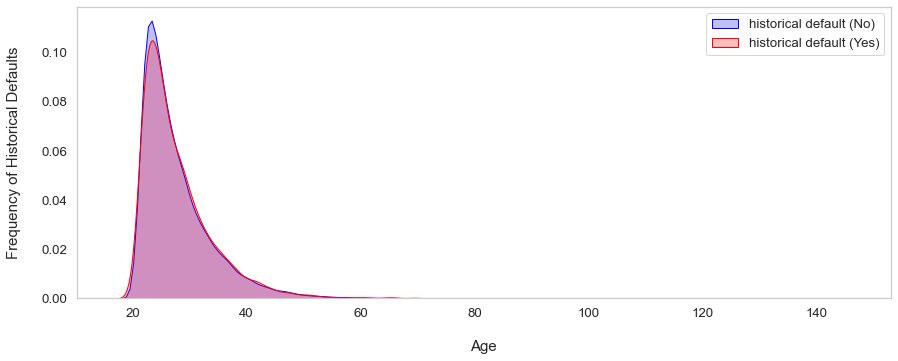

In [196]:
# @hidden
# Kernel Density Plot
fig = plt.figure(figsize=(13,5))
ax=sns.kdeplot(df.loc[(df.historical_default == "N"),'age'] , color='blue',shade=True, label='historical default (No)')
ax=sns.kdeplot(df.loc[(df.historical_default == "Y"),'age'] , color='red',shade=True, label='historical default (Yes)')
#plt.title('Age Distribution Historical Default vs No Historical Default', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Historical Defaults", fontsize = 15, labelpad = 20)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.legend()
plt.show()

#### Age Distribution

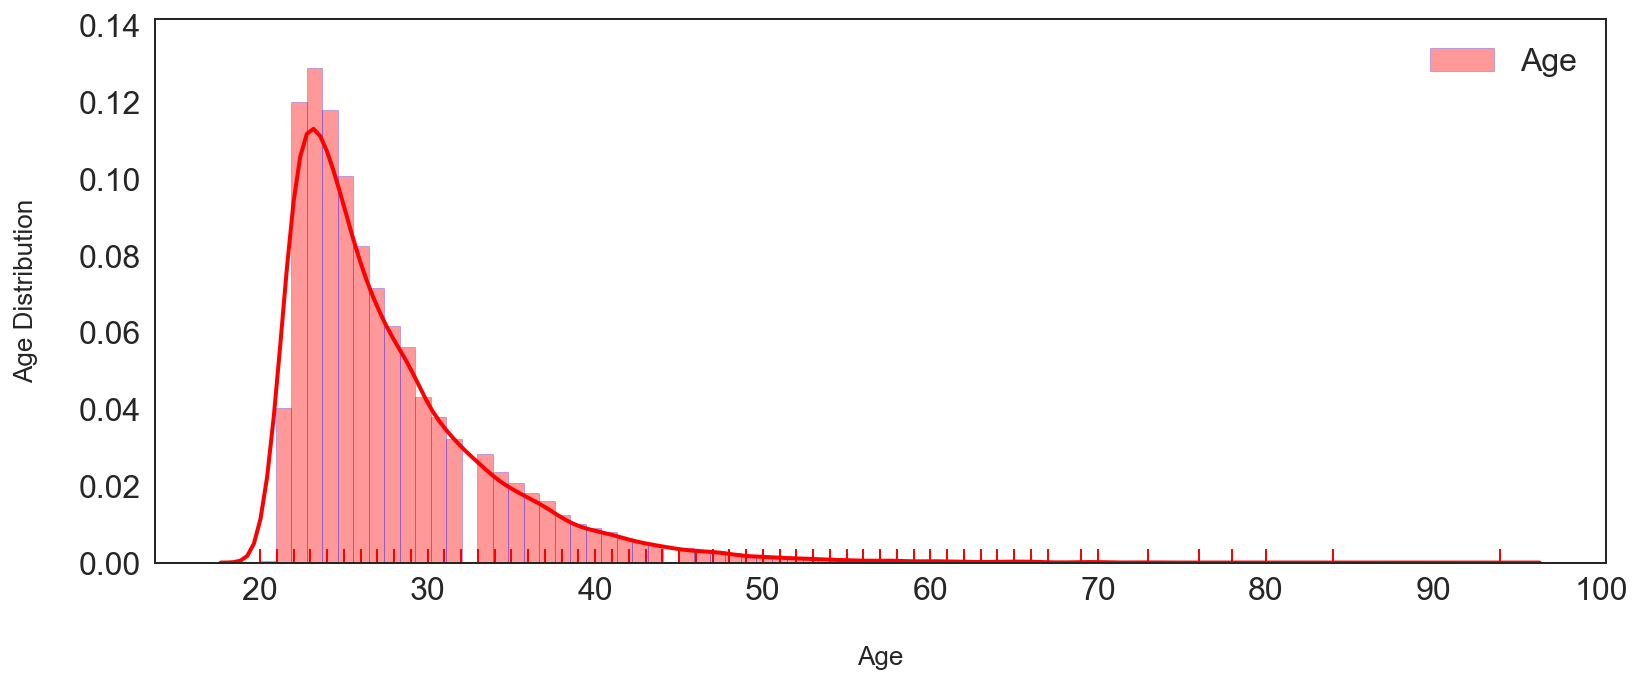

In [167]:
# @hidden
# https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
plt.figure(figsize=(13,5))
sns.distplot(df['age'], hist=True, kde=True, rug = True,
             bins=int(80), color = 'red', 
             hist_kws={'edgecolor':'blue'},
             kde_kws={'linewidth': 2},
             label = 'Age')
plt.ylabel("Age Distribution", fontsize = 13, labelpad = 20)
plt.xlabel("Age", fontsize = 13, labelpad = 20)
plt.legend()
plt.show()

#### Employment Length Distribution

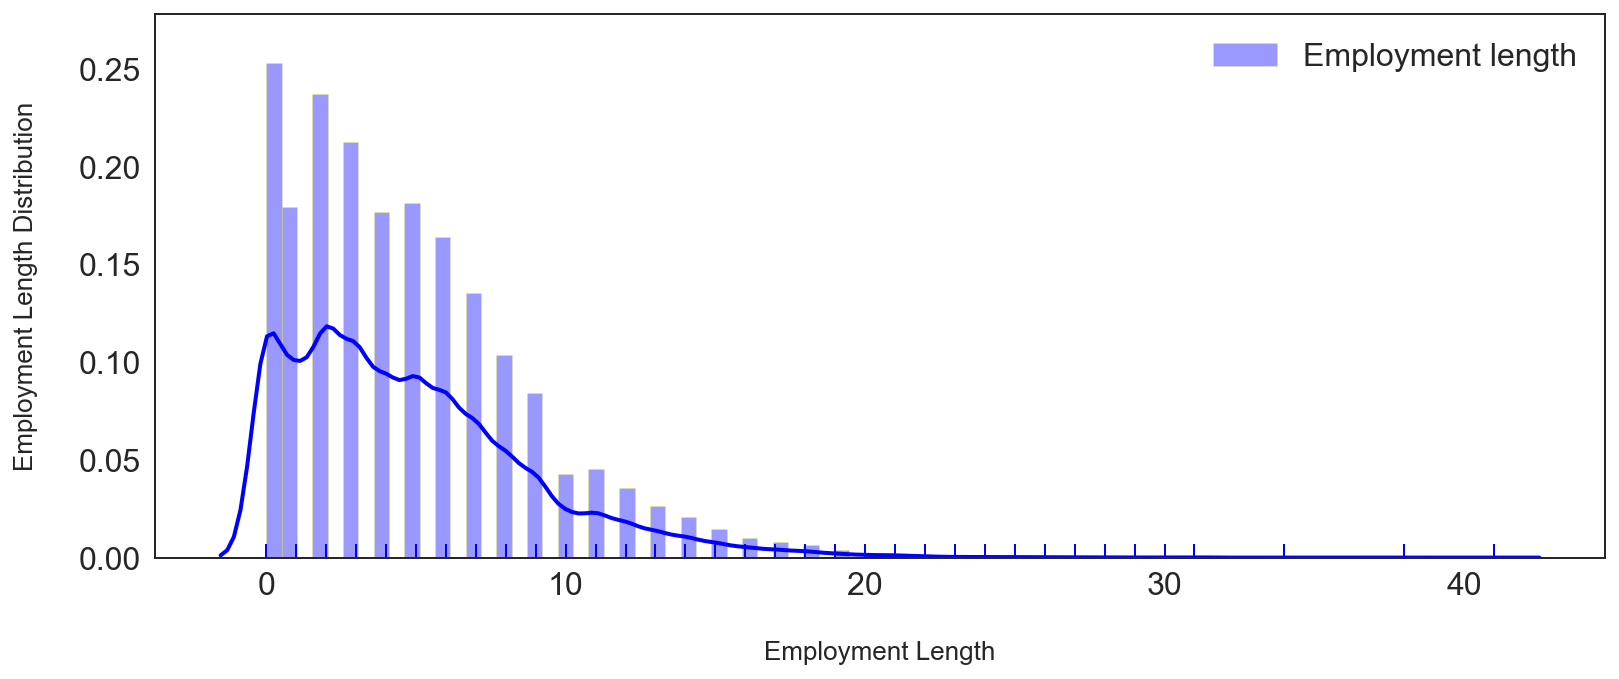

In [169]:
# @hidden
plt.figure(figsize=(13,5))
sns.distplot(df['emp_length'], hist=True, kde=True, rug = True,
             bins=int(80), color = 'blue', 
             hist_kws={'edgecolor':'yellow'},
             kde_kws={'linewidth': 2},
             label = 'Employment length')
plt.ylabel("Employment Length Distribution", fontsize = 13, labelpad = 20)
plt.xlabel("Employment Length", fontsize = 13, labelpad = 20)
plt.legend()
plt.show()

#### Income Distribution

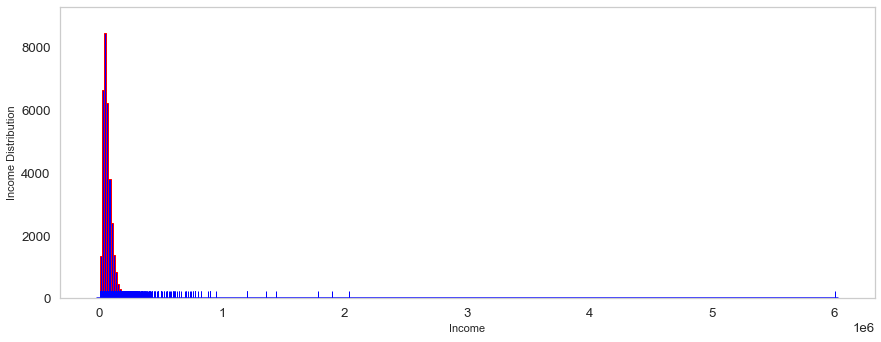

In [204]:
# @hidden
plt.figure(figsize=(13,5))
plt.hist(df['income'], color = 'blue', edgecolor = 'red', bins = int(350))

sns.distplot(df['income'], hist=True, kde=True, rug = True,
             bins=int(350), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.xlabel('Income', fontsize = 11)
plt.ylabel('Income Distribution', fontsize = 11)
plt.show()

### 2. Data Processing
Data processing is a crucial step in building machine learning algorithms, on which data scientists spent on average as much as 80% of their time. The purpose is to transform the original dataset and ensure compatibility with the chosen machine learning algorithms. On a further note, this will improve also their performance resulting in more accurate modelling.

The focus will be on finding and handling missing values, dealing with multicollinearity, and analyzing the cardinality of non-numeric features in the dataset.

#### 2.1. Missing Values
When having missing values in a feature, we face a tradeoff between the risk of losing a meaningful feature for our model that has a lot of missing data and inaccurate representation of the feature by imputing a large percentage of the feature's values. Usually, features that have more than 20-30% of missing data should be discarded, however, you should think about the relevance of each feature that is being dropped beforehand.

In [7]:
# @hidden
# function to find missing values in datafame
def missing_values_table(df):
    # sum of missing values
    mis_val = df.isnull().sum()
        
    # % of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
        
    # concat table
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% Missing Values'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0
                                                             ].sort_values('% Missing Values', ascending=False).round(1)
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [8]:
# @hidden
df_missing = missing_values_table(df)
df_missing

,Missing Values,% Missing Values
interest_rate,3116,9.6
emp_length,895,2.7


#### 2.2. Outlier removal

In [3]:
# @hidden
# https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
df_before = df.copy()
df = df[df["age"] <= 100]
df = df[df["emp_length"] <= 100]
df = df[df["income"] <= 2500000]
print ('Data before removal of outliers: ', df_before.shape[0])
print ('Data after removal of outliers: ', df.shape[0])

Data before removal of outliers:  32581
Data after removal of outliers:  31679


#### 2.3. Cardinality of the non-numeric features

Cardinality refers to the set of unique values that a categorical feature can take on.

In [194]:
# @hidden
# selecting all columns that have categorical data and computing their unique set of values
def get_cardinality (df):
    object_columns = (df.select_dtypes(include="object").columns)
    for column in object_columns:
        print("{}: {} unique values".format(column, df[column].nunique()))
get_cardinality(df.drop('id', 1))

home_ownership: 4 unique values
loan_intent: 6 unique values
grade: 7 unique values
historical_default: 2 unique values


Out of our 12 features, 4 features are categorical and are checked on the number of distinct values.

It is possible to infer that a feature has a

- high cardinality if it has more than 7 distinct values: **grade**
- moderate cardinality if it has more than 4 rows: like **home_ownership** and **loan_intent**
- low cardinality if it has less than 2 rows: **historical_default**

We want to avoid having high cardinality features in our dataset as this may cause problems in training our models. The more distinct values a categorical variable can take on, the more features will be created when transforming them for example with one-hot encoding. Thus, high cardinality may lead to an explosion of features, which could slow down the computation time tremendously. Also, high cardinality may bring the curse of dimensionality, which means that data becomes more sparse as there is a higher chance that an instance is unique.

However, in our case, we can assume that we do not face problems through high cardinality as only one out of 12 features has high cardinality, which we are willing to accept in terms of computation time. All other non-numerical features show an appropriate number of distinct values. This will keep down the number of features created in the transformation step.

### 3. Feature Engineering
In this step, the focus will be on selecting only the features that are important to our problem at hand, while discarding irrelevant ones, called feature selection and pre-processing the data via a pipeline. Also, the dataset used will be split into a training and test set such that it is possible to use it in the pipeline to transform the features. This involves imputing missing data for categorical and numerical features as well as scaling them.

#### 3.1. Split data into a training and holdout set

In [4]:
# @hidden
id_generator = []

def get_random_string(length):
    # choose from all lowercase letter
    letters = string.ascii_lowercase
    result_str = ''.join(random.choice(letters) for i in range(length))
    return result_str
    
while True:
    get_id = get_random_string(8)
    id_generator.append(get_id)
    
    if len(id_generator) == len(df):
        break
    else:
        continue

In [5]:
# @hidden
contains_duplicates = any(id_generator.count(element) > 1 for element in id_generator)
print (contains_duplicates)

False


In [6]:
# @hidden
df['id'] = id_generator

In [7]:
# @hidden
# train/test-set
# make a equally-weighted sample from the original dataframe (85% of original)
sample_df = df.groupby('status').apply(lambda x: x.sample(frac=0.85)).reset_index(1).drop(['status'], 1).reset_index()

# compute distributions of defaults & non-defaults of sampled dataframe
non_defaults_sample = sample_df.status.value_counts()[0]
defaults_sample = sample_df.status.value_counts()[1]
combined_sample = sample_df.shape[0]
print ('Non-Defaults in sampled dataset: {}'.format(non_defaults_sample/combined_sample))
print ('Defaults in sampled dataset: {}'.format(defaults_sample/combined_sample))
print ('Shape of sampled dataframe: {}'.format(sample_df.shape))

Non-Defaults in sampled dataset: 0.7845656775726966
Defaults in sampled dataset: 0.21543432242730345
Shape of sampled dataframe: (26927, 14)


Additionally, in order to have a proper holdout set for the ML-modeling part in the end, the rest of the data (15%) (difference between the whole dataset and the sampled dataset) as test or holdout set. Also, a check was performed if this dataset has the same distribution of defaults and non-defaults as the other two datasets.

In [8]:
# @hidden
# test/holdout-set
a_index = df.set_index(['id']).index
b_index = sample_df.set_index(['id']).index
mask = ~a_index.isin(b_index)
holdout_set = df.loc[mask]

# compute distributions of defaults & non-defaults of sampled dataframe
non_defaults_validation = holdout_set.status.value_counts()[0]
defaults_validation = holdout_set.status.value_counts()[1]
combined_validation = holdout_set.shape[0]

print ('Non-Defaults in the validation dataset: {}'.format(non_defaults_validation/combined_validation))
print ('Defaults in the validation dataset: {}'.format(defaults_validation/combined_validation))
print ('Shape of the holdout dataset: {}'.format(holdout_set.shape))

Non-Defaults in the validation dataset: 0.7845117845117845
Defaults in the validation dataset: 0.21548821548821548
Shape of the holdout dataset: (4752, 13)


#### 3.2. Train-Test split

Before building the pipeline, the data was split into a train and test set so that it is possible to validate the performance of the model using cross-validation. Throughout the entire notebook, the hyperparameter **`random_state=2021`** will be used to ensure consistent random results. Also, 25% of the rows will be used as a validation set. Additionaly, it is important to mention that the features "status" and the two id-variables in the X-features were dropped.

In [9]:
# @hidden
X = sample_df.drop(['status', 'level_1', 'id'], axis=1)
y = sample_df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021, stratify=y)
print(X_train.shape)
print(X_test.shape)

(20195, 11)
(6732, 11)


#### 3.3. Preprocessing Pipeline: Transformers

Before we start training our data and evaluating its performance, we need to preprocess it. This means scaling/encoding variables and imputing missing values for the columns that were not dropped in the step before. In order to simplify this process we will use a pipeline.

First, we use the SimpleImputer to fill in missing values, the median was chosen for numerical features and "missing" will be indicated for categorical ones. 

Next, we define each transformer type, which is different for numerical and categorical variables. For numerical variables we will use the StandardScaler, while for categorical variables we will use one-hot-encoding to transform them into integers.

Third, a column transformer helps us to apply the right pipeline to the right column in our dataframe.

Finally, we will balance our dataset using synthetic minority oversampling (SMOTE), increasing the number of instances in the minority group (default). If we do not balance our dataset, our model will highly favor the instances in the majority group during training. This will lead to bad performance results of the model. We specifically use SMOTE as random oversampling tends to overfit.

In [12]:
# @hidden
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))])

numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(exclude=['number']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

preprocessor.fit(X_train)

# Get final feature names
cat_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names(categorical_features)
columns_pipeline = np.append(cat_columns, numeric_features)

smt = SMOTE(random_state = 2021)
rfe = RFE(estimator=RandomForestClassifier(n_estimators = 100, random_state = 2021), n_features_to_select=26)

#### 3.4. Principal Component Analysis (PCA)

Principal Component Analysis or PCA is a statistical procedure that allows us to summarize / extract the only important data that explains the whole dataset. By using PCA in practice one has the ability to estimate how many components are needed to describe the data. As a result, the principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components. Below, a bar chart is showing the size of each of the principal components. It helps us to visualize the percentage of variation captured by each of the principal components.

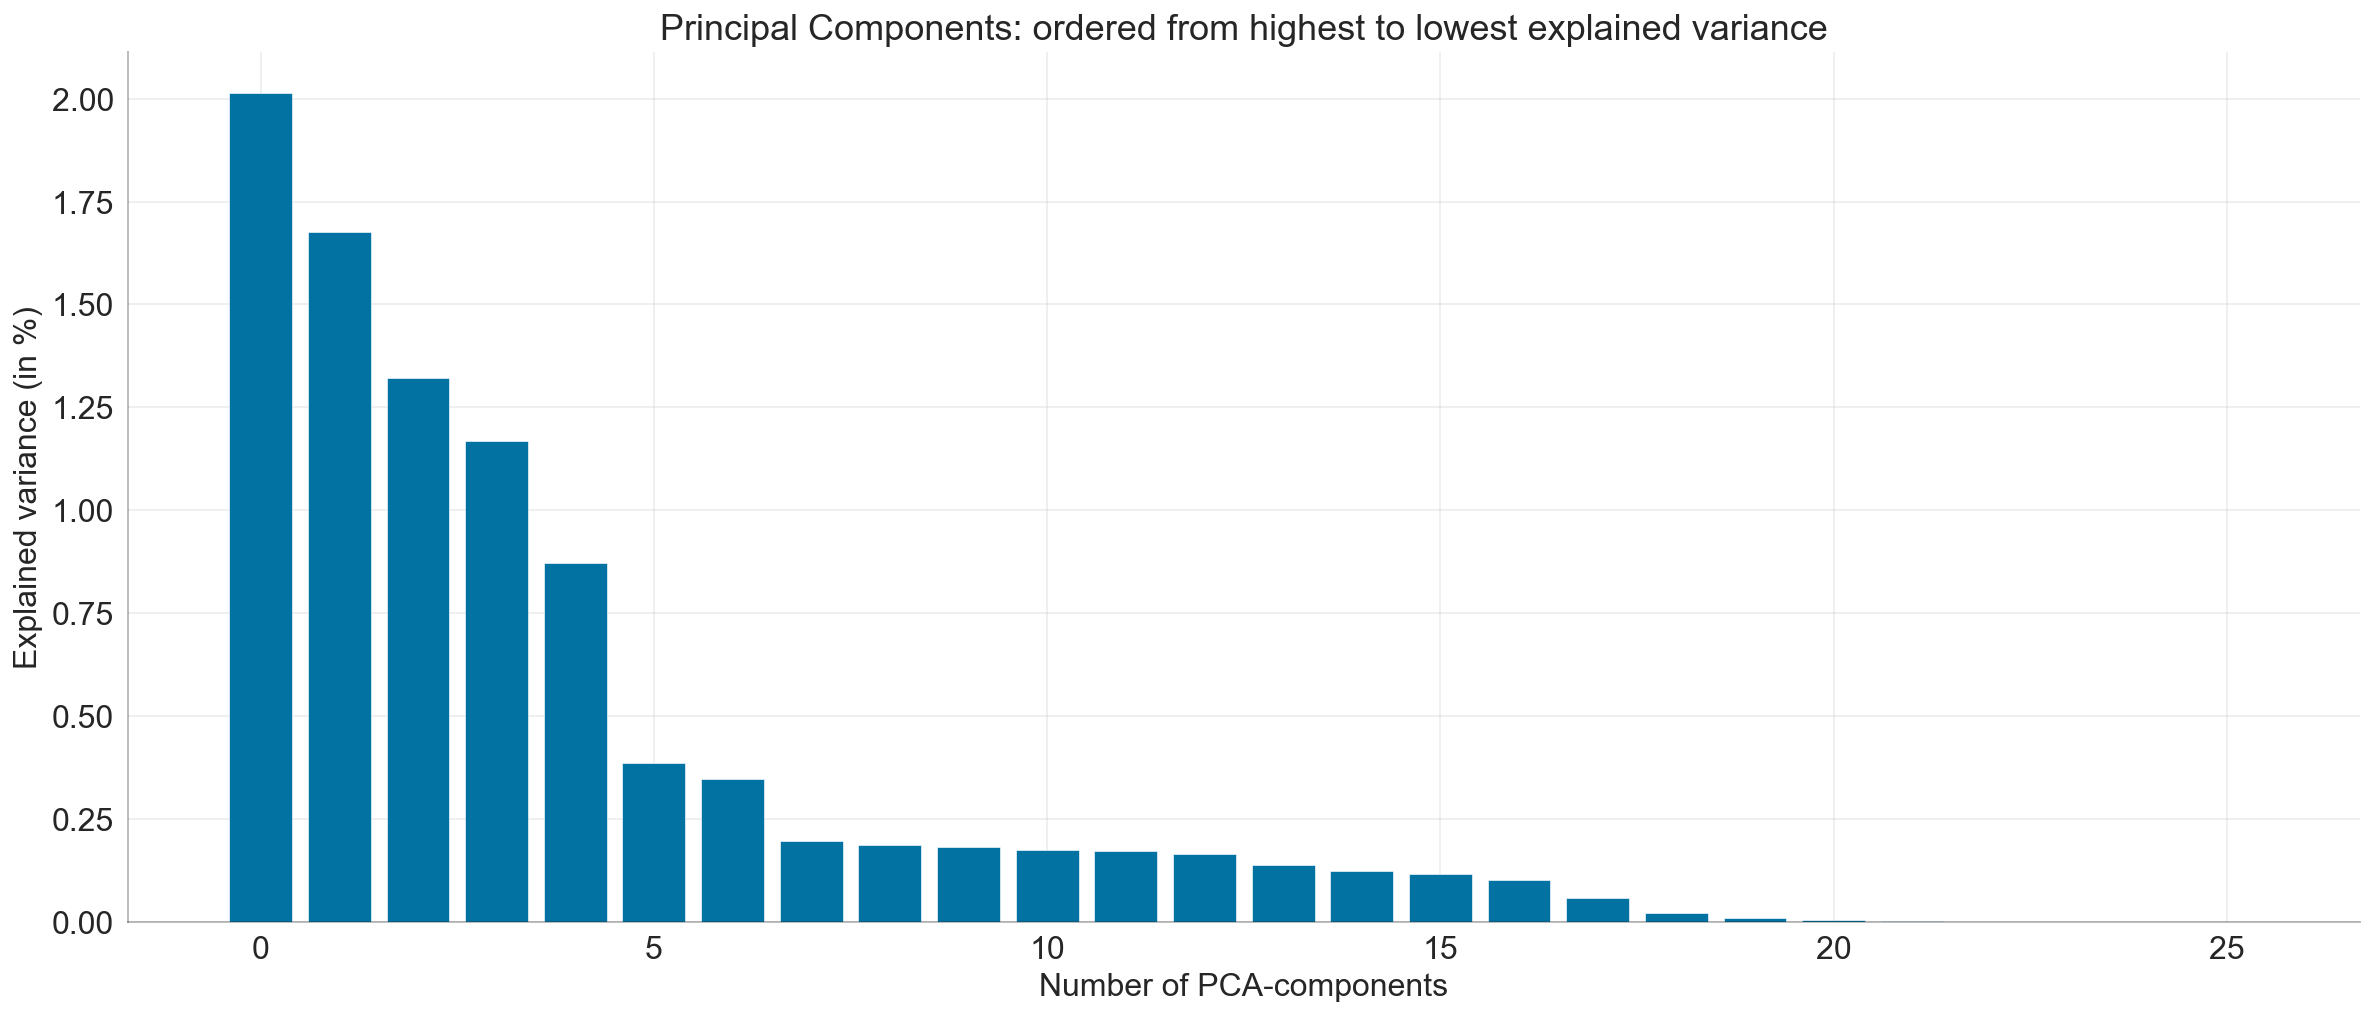

In [185]:
# @hidden
pca = PCA(random_state=2021)
X_train_pca = pca.fit_transform(preprocessor.fit_transform(X_train))
X_test_pca = pca.transform(preprocessor.transform(X_test))
pca.n_components = X_train_pca.shape[1]
components_amount = X_train_pca.shape[1]
pca_data = pca.fit_transform(X_train_pca)
plt.rcParams["figure.figsize"] = (20,8)
plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('Number of PCA-components')
plt.ylabel('Explained variance (in %)')
plt.title('Principal Components: ordered from highest to lowest explained variance', fontsize=18)
plt.grid(axis='both', alpha=.3)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)
plt.show()

By looking at the plot above, one can see that for instance the first two principal components explain ca. 2.00% of the variation in the data. Here, the group chose the amount of components in such a way so that in total we have an explained variance of ca. 90% (note that the threshold is set somehow arbitrary; 70 to 90% are the usual sort of values, but it depends on the context of the data set and can be higher or lower [see Lovric 2011]).This can be determined by looking at the cumulative explained variance ratio as a function of the number of components. A general rule of thumb is to take number of principal of principal components that contribute to significant variance and ignore those with diminishing variance returns, which can be shown in the following graph:

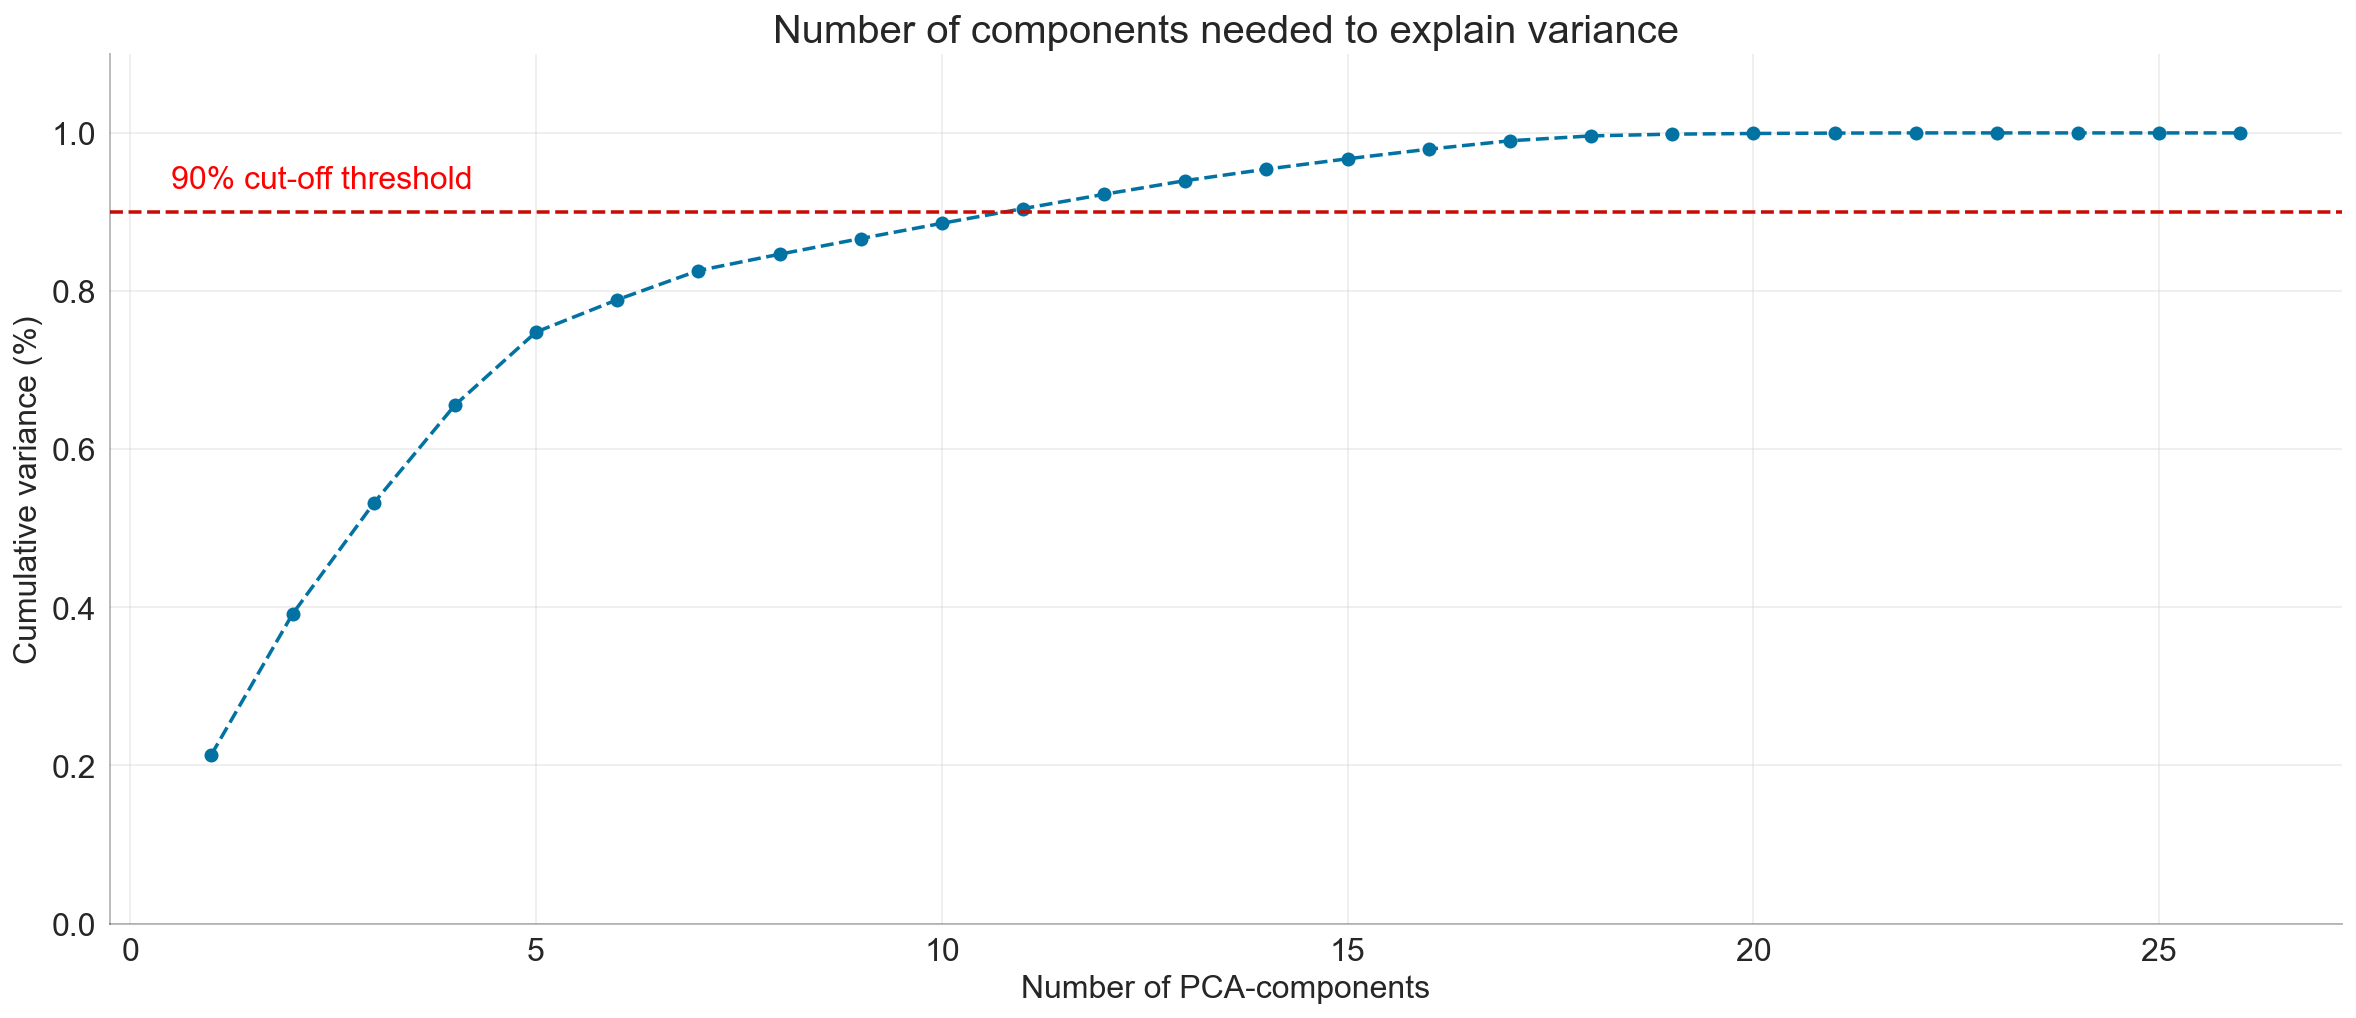

In [188]:
# @hidden
plt.rcParams["figure.figsize"] = (20,8)
fig, ax = plt.subplots()
xi = np.arange(1, components_amount+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle = '--', color='b')
plt.xlabel('Number of PCA-components')
plt.xticks(np.arange(0, components_amount, step=5))
plt.ylabel('Cumulative variance (%)')
plt.title('Number of components needed to explain variance', fontsize=20)
plt.axhline(y=0.90, color='r', linestyle='--')
plt.text(0.5, 0.93, '90% cut-off threshold', color = 'red', fontsize=16)
plt.grid(axis='both', alpha=.3)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)
plt.show()

Thus, it can be seen that 90% of the variance in the data can be achieved with approx. n = 11 principal components.

#### 3.5. Recursive feature elimination with cross validation (RFECV)

Next I will proceed to eliminate the features which are not important and may be adding to noise and deteriorating the model performance. In order to determine the optimum number of features and also the important features we will use Recusrsive feature elimination with cross validation (RFECV). In this technique model is built starting with all features and the weakest features are recursively removed in each step. RFECV uses cross validation to measure model performance on each feature subset.

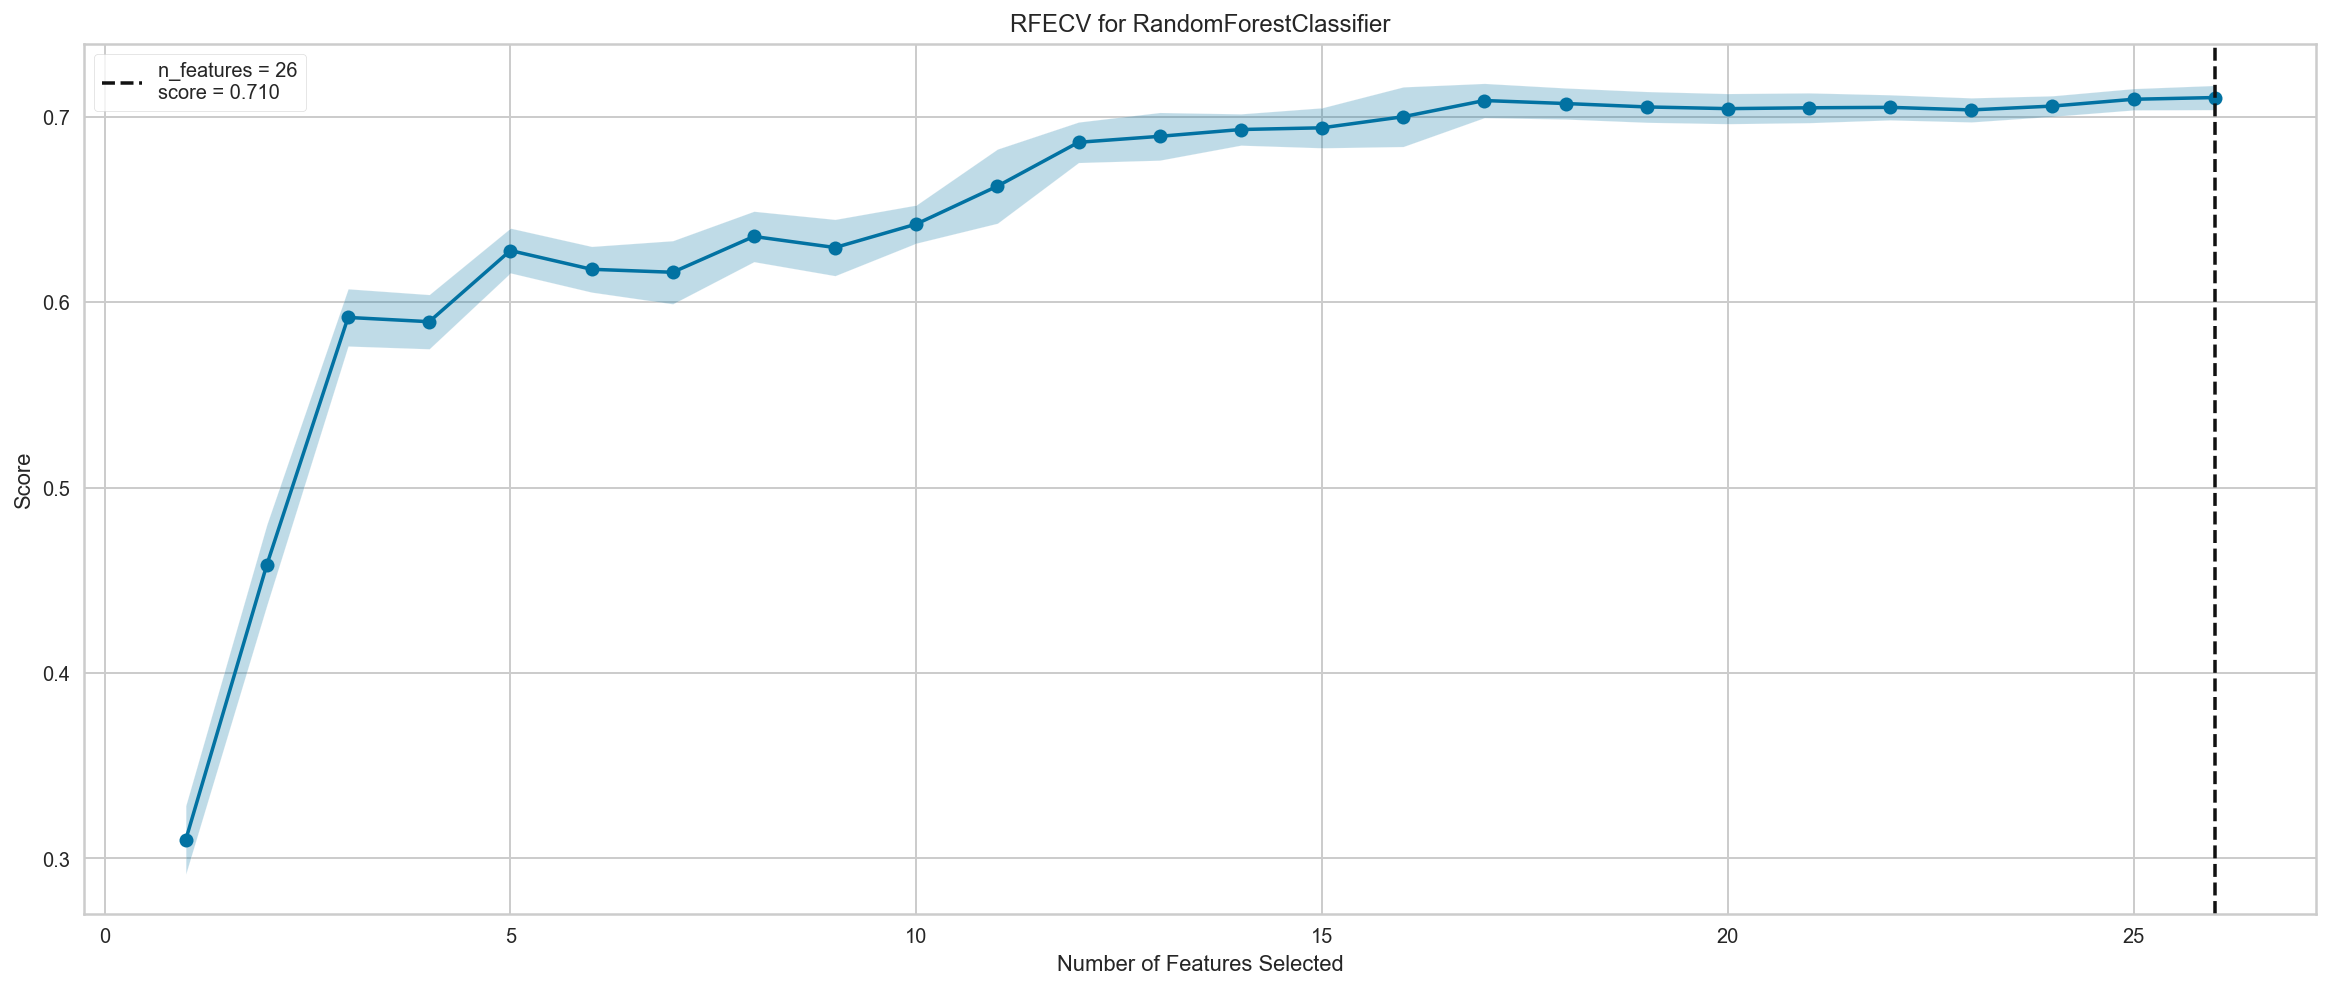

<AxesSubplot:title={'center':'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [25]:
# @hidden
# https://www.scikit-yb.org/en/latest/api/model_selection/rfecv.html
visualizer = RFECV(RandomForestClassifier(), cv=5, scoring='recall')
visualizer.fit(preprocessor.fit_transform(X_train), y_train)
visualizer.show()

In this example we can see that all 26 features were selected, though there doesn’t appear to be much improvement in the recall-score of the model after around 15 features. Selection of the features to eliminate plays a large role in determining the outcome of each recursion; modifying the step parameter to eliminate more than one feature at each step may help to eliminate the worst features early, strengthening the remaining features (and can also be used to speed up feature elimination for datasets with a large number of features).

### 4. Machine Learning Modeling

In this part of the project, a total of seven classificiation models are trained and validated which in the end might help to predict potential future loan defaults. A focus was not only put on the actual implementation of the models, but also on model evaluation, threshold tuning and graphical validation of the best model.

#### 4.1. Choosing a metric & optimization approach

It is important that we choose the right metric when we're optimizing the model. Given that our goal is to predict potential future loan-defaults, following trade-off must be considered:

- **True positive:**  the model said they would default, and they did
- **False positive:**  the model said they would default, and they didn't
- **True negative:**  the model says they would not default, and they wouldn't
- **False negative:**  the model says they would not default, and they would

Clearly, we want to maximize **True Positives**.  When we consider our two errors, which is more costly?  Arugably, it is the **False Negative**.

Therefore, it makes sense to use a performance metric, that when the model has many **True Positives** will be high, but that will be penalized for having too many **False Negatives**. The group also checked this on Stackoverflow, and came to the same conclusion: if the cost of having False negative is high, we want to increase the model's sensitivity and recall [7].

For instance, in fraud detection or sick patient detection, we don't want to label/predict a fraudulent transaction (True Positive) as non-fraudulent (False Negative). Also, we don't want to label/predict a contagious sick patient (True Positive) as not sick (False Negative). This is because the consequences will be worse than a False Positive (incorrectly labeling a a harmless transaction as fraudulent or a non-contagious patient as contagious).

As a result, we can choose to look to the performance metric recall (also called sensitivity or hit rate), for which the formula is: **TP / (TP + FN)**.

Applying ML-models is only one side of the medal, the other, by far the most important one is to tune the models. Thus, in the following, the group summarized the most important steps in this process:
1. Define a model.<br>
2. Define the range of possible values for all hyperparameters.<br>
3. Define evaluative criteria to judge the model.<br>
4. Define a cross-validation method.

The overall aim of hyperparameter tuning is to optimize the performance of the model based on a certain metric. For example, Root Mean Squared Error (RMSE) for regression problems and recall score for our classification problem. There are several approaches to hyperparameter tuning. In this course-project, we will only apply and focus on the **RandomizedSearch** technique.

As the name implies, this method searches the hyperparameter space randomly for the best performance. This makes it fast and less computationally expensive. Instead of providing a set of values, we provide a statistical distribution for each hyperparameter. First implemented by Bergstra and Bengio, random search has been proven to outperform grid search [2].

**Note:** When dealing with RandomizedSearch, it is crucial to mention that, when starting a new session each time, the data will be randomly partitioned into different sub-samples and will have different results. Thus, if one runs the same code again, one might get different hyperparameters each time! [9]

#### 4.2. Defining helper-functions

In [35]:
# @hidden
###### define functions for evaluation later ######

# confusion-matrix function
def confusion_matrix_normalized (y_test, y_pred, color):
    plt.rcParams["figure.figsize"] = (10,7)
    cf_matrix = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    categories = ['0','1']
    return sns.heatmap(cf_matrix, annot=labels, fmt='', cmap=color, xticklabels=categories,yticklabels=categories)

# for finding the best threshold (1)
def makePredThresh(fittedCls, thr = 0.5, X_test=X_test):
    prob = fittedCls.predict_proba(X_test)[: ,1]
    final = []
    for p in prob:
        if p >= thr:
            final.append(1)
        else:
            final.append(0)
    
    return final

# for finding the best threshold (2)
def threshold_optimizer (y_test, model_proba):
    
    # Create the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, model_proba)

    # Plot the ROC curve
    df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})

    # Calculate the G-mean
    gmean = np.sqrt(tpr * (1 - fpr))

    # Find the optimal threshold
    index = np.argmax(gmean)
    thresholdOpt = round(thresholds[index], ndigits = 4)
    gmeanOpt = round(gmean[index], ndigits = 4)
    fprOpt = round(fpr[index], ndigits = 4)
    tprOpt = round(tpr[index], ndigits = 4)
    print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
    print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))
    return thresholdOpt

#### 4.3. ML-modeling with PCA

##### Logistic Regression

In [62]:
# @hidden
logreg_pca = LogisticRegression(max_iter=5000, random_state=2021)
clf_logreg_pca = Pipeline([('preprocessor', preprocessor), ('pca', PCA(n_components=11)), ('smt', smt), ('logreg', logreg_pca)])

params_logreg_pca = {'logreg__C':[0.01, 0.1, 1, 5, 10, 20, 30, 40, 50], 
                     'logreg__penalty':['l2','l1'],
                     'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                    }

clf_logreg_pca = RandomizedSearchCV(estimator=clf_logreg_pca, 
                                    param_distributions = params_logreg_pca, 
                                    cv=5, 
                                    scoring= 'recall', 
                                    n_jobs = -1, 
                                    return_train_score=True, 
                                    random_state=2021)

clf_logreg_pca.fit(X_train, y_train);

print('Final score on training-set is: ', clf_logreg_pca.score(X_train, y_train))
print('Final score on test-set is: ', clf_logreg_pca.score(X_test, y_test))
print (' ')
print('\nBest params:\n', clf_logreg_pca.best_params_)

Final score on training-set is:  0.7678694552976327
Final score on test-set is:  0.7737931034482759
 

Best params:
 {'logreg__solver': 'liblinear', 'logreg__penalty': 'l2', 'logreg__C': 0.01}


In [63]:
# @hidden
final_model_logreg_pca = LogisticRegression(random_state=2021, 
                                            solver = "liblinear", 
                                            penalty = 'l2',
                                            C = 0.01)

clf_logreg_pca = Pipeline([('preprocessor', preprocessor), ('pca', PCA(n_components=11)), ('smt', smt), ('logreg', final_model_logreg_pca)])
clf_logreg_pca.fit(X_train, y_train)

print("Report:")
logreg_pred_pca = clf_logreg_pca.predict(X_test)

logreg_pred_pca = clf_logreg_pca.predict(X_test)
logreg_accuracy_pca = round(metrics.accuracy_score(y_test, logreg_pred_pca),4)
print ('The Accuracy of the LR-model is: {}'.format(logreg_accuracy_pca))
print (' ')
print(classification_report(y_test, logreg_pred_pca))

Report:
The Accuracy of the LR-model is: 0.7764
 
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      5282
           1       0.49      0.77      0.60      1450

    accuracy                           0.78      6732
   macro avg       0.71      0.78      0.72      6732
weighted avg       0.83      0.78      0.79      6732



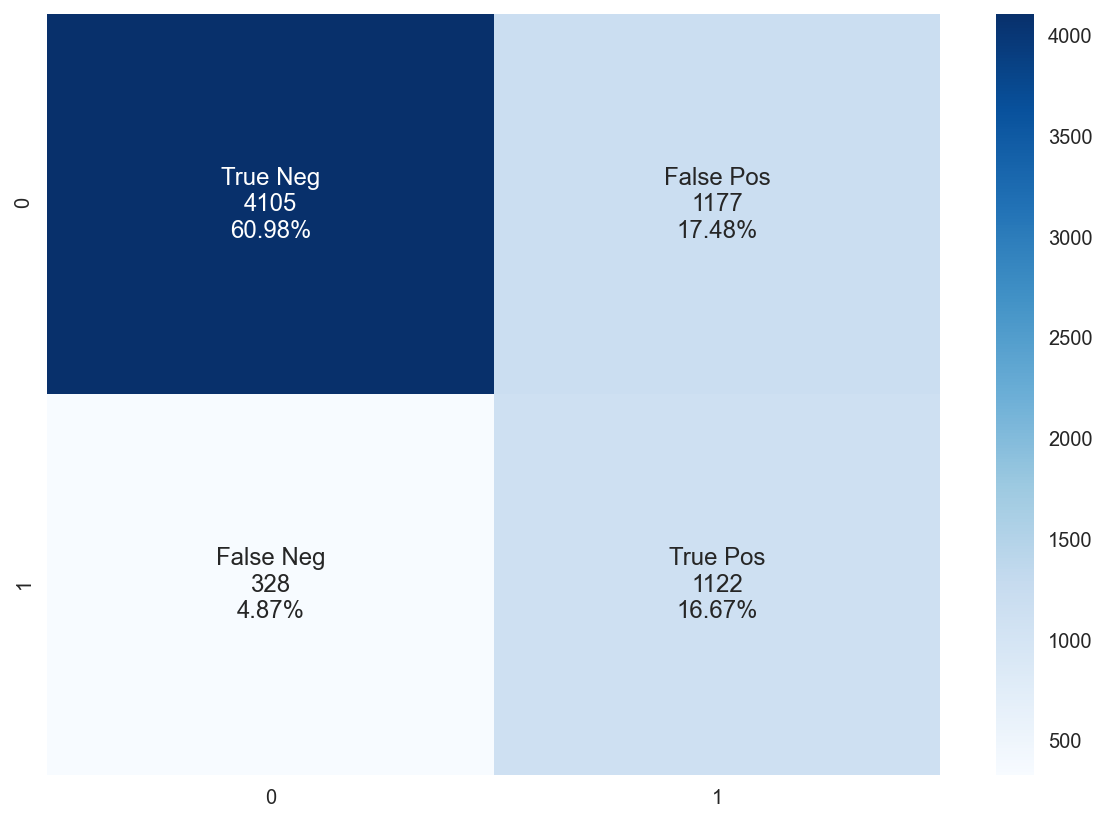

In [64]:
# rocket, Pastel1, cubehelix_r, Blues
confusion_matrix_normalized(y_test, logreg_pred_pca, color = 'Blues');

##### AdaBoost

In [65]:
# @hidden
ada_boost_pca = AdaBoostClassifier(random_state = 2021)
clf_ada_pca = Pipeline([('preprocessor', preprocessor), ('pca', PCA(n_components=11)), ('smt', smt), ('clf', ada_boost_pca)])

params_ada_pca = {'clf__n_estimators': [10, 20, 50, 70, 100, 150, 200],
                  'clf__learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.40]
                 }

clf_ada_pca = RandomizedSearchCV(estimator=clf_ada_pca, 
                                 param_distributions = params_ada_pca,
                                 cv=5, 
                                 scoring= 'recall', 
                                 n_jobs = -1, 
                                 return_train_score=True, 
                                 random_state=2021)

clf_ada_pca.fit(X_train, y_train);

print('Final score on training-set is: ', clf_ada_pca.score(X_train, y_train))
print('Final score on test-set is: ', clf_ada_pca.score(X_test, y_test))
print (' ')
print('\nBest params:\n', clf_ada_pca.best_params_)

Final score on training-set is:  0.7736152608595726
Final score on test-set is:  0.7717241379310344
 

Best params:
 {'clf__n_estimators': 150, 'clf__learning_rate': 0.3}


In [66]:
# @hidden
final_model_ada_pca = AdaBoostClassifier(random_state=2021,
                                         n_estimators = 150, 
                                         learning_rate = 0.30)

clf_ada_pca = Pipeline([('preprocessor', preprocessor), ('pca', PCA(n_components=11)), ('smt', smt), ('catb', final_model_ada_pca)])
clf_ada_pca.fit(X_train, y_train)

print("Report:")
ada_pred_pca = clf_ada_pca.predict(X_test)
ada_accuracy_pca = round(metrics.accuracy_score(y_test, ada_pred_pca), 4)
print ('The Accuracy of the AdaBoost-model is: {}'.format(ada_accuracy_pca))
print (' ')
print(classification_report(y_test, ada_pred_pca))

Report:
The Accuracy of the AdaBoost-model is: 0.7938
 
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      5282
           1       0.51      0.77      0.62      1450

    accuracy                           0.79      6732
   macro avg       0.72      0.79      0.74      6732
weighted avg       0.84      0.79      0.81      6732



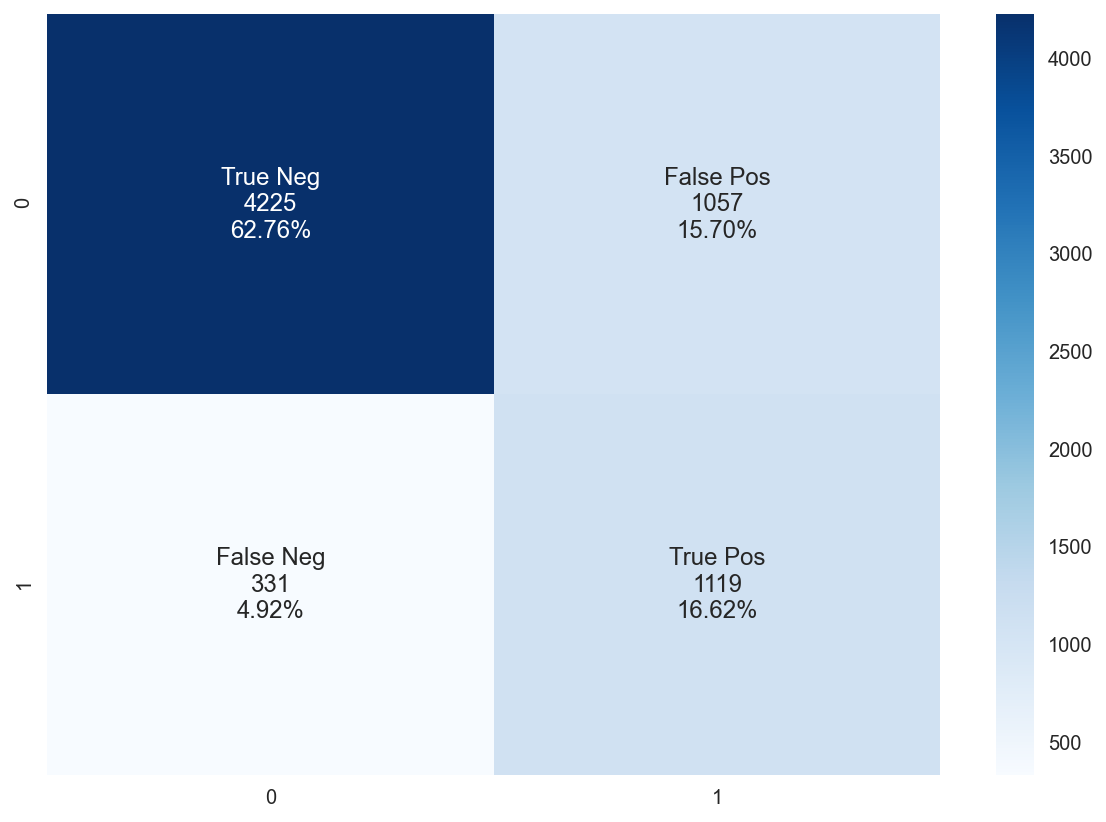

In [67]:
confusion_matrix_normalized(y_test, ada_pred_pca, color = 'Blues');

##### CatBoost

In [69]:
# @hidden
catb_pca = CatBoostClassifier(verbose=False, iterations=100, random_state = 2021)
clf_catb_pca = Pipeline([('preprocessor', preprocessor), ('pca', PCA(n_components=11)), ('smt', smt), ('catb', catb_pca)])

params_catb_pca = {'catb__learning_rate': sp_randFloat(),
               'catb__subsample'    : sp_randFloat(),
               'catb__max_depth'    : sp_randInt(2, 15),
               'catb__iterations'    : sp_randInt(10, 200),
              }

clf_catb_pca = RandomizedSearchCV(estimator=clf_catb_pca, 
                                  param_distributions=params_catb_pca, 
                                  cv=5, 
                                  scoring= 'recall', 
                                  n_jobs = -1, 
                                  return_train_score=True, 
                                  random_state=2021)

clf_catb_pca.fit(X_train, y_train);

print('Final score on training-set is: ', clf_catb_pca.score(X_train, y_train))
print('Final score on test-set is: ', clf_catb_pca.score(X_test, y_test))
print (' ')
print('\nBest params:\n', clf_catb_pca.best_params_)

Final score on training-set is:  0.771087106412319
Final score on test-set is:  0.7510344827586207
 

Best params:
 {'catb__iterations': 126, 'catb__learning_rate': 0.7988804186386567, 'catb__max_depth': 2, 'catb__subsample': 0.13894715672839875}


In [70]:
# @hidden
final_model_cat_pca = CatBoostClassifier(random_state=2021, 
                                         iterations = 126, 
                                         learning_rate = 0.7988804186386567,
                                         max_depth = 2,
                                         subsample = 0.13894715672839875,
                                         verbose = False
                                         )

clf_cat_pca = Pipeline([('preprocessor', preprocessor), ('pca', PCA(n_components=11)), ('smt', smt), ('catb', final_model_cat_pca)])

clf_cat_pca.fit(X_train, y_train)

print("Report:")
cat_pred_pca = clf_cat_pca.predict(X_test)
cat_accuracy_pca = round(metrics.accuracy_score(y_test, cat_pred_pca), 4)
print ('The Accuracy of the CatBoost-model is: {}'.format(cat_accuracy_pca))
print (' ')
print(classification_report(y_test, cat_pred_pca))

Report:
The Accuracy of the CatBoost-model is: 0.8214
 
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      5282
           1       0.56      0.75      0.64      1450

    accuracy                           0.82      6732
   macro avg       0.74      0.80      0.76      6732
weighted avg       0.85      0.82      0.83      6732



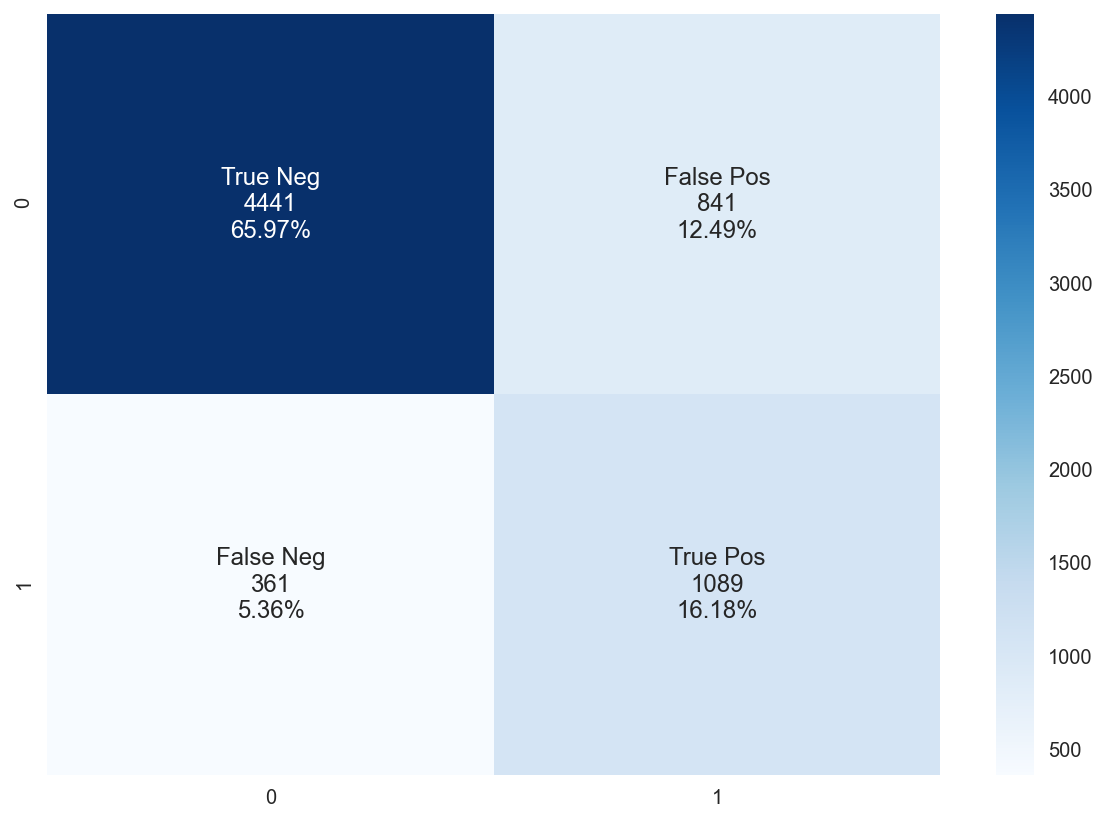

In [71]:
confusion_matrix_normalized(y_test, cat_pred_pca, color = 'Blues');

##### LGBMClassifier

In [74]:
# @hidden
lgbm_pca = LGBMClassifier(iterations=100, random_state = 2021)
clf_lgbm_pca = Pipeline([('preprocessor', preprocessor), ('pca', PCA(n_components=11)), ('smt', smt), ('lgbm', lgbm_pca)])


params_lgbm_pca = {'lgbm__num_leaves': sp_randint(6, 200), 
                   'lgbm__min_child_samples': sp_randint(100, 500), 
                   'lgbm__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
                   'lgbm__subsample': sp_uniform(loc=0.2, scale=0.8), 
                   'lgbm__colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
                   'lgbm__reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100, 150, 200],
                   'lgbm__reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100, 150, 200]
                  }

clf_lgbm_pca = RandomizedSearchCV(estimator=clf_lgbm_pca, 
                                  param_distributions=params_lgbm_pca, 
                                  cv=5, 
                                  scoring= 'recall', 
                                  n_jobs = -1, 
                                  return_train_score=True, 
                                  random_state=2021)

clf_lgbm_pca.fit(X_train, y_train);

print('Final score on training-set is: ', clf_lgbm_pca.score(X_train, y_train))
print('Final score on test-set is: ', clf_lgbm_pca.score(X_test, y_test))

print (' ')
print('\nBest params:\n', clf_lgbm_pca.best_params_)

[LightGBM] [Warning] Unknown parameter: iterations
Final score on training-set is:  0.7568375086187084
Final score on test-set is:  0.7551724137931034
 

Best params:
 {'lgbm__colsample_bytree': 0.7052985403287366, 'lgbm__min_child_samples': 125, 'lgbm__min_child_weight': 1000.0, 'lgbm__num_leaves': 90, 'lgbm__reg_alpha': 2, 'lgbm__reg_lambda': 1, 'lgbm__subsample': 0.6768984278572139}


In [75]:
# @hidden
final_model_lgbm_pca = LGBMClassifier(reg_alpha=2, 
                                      reg_lambda = 1,
                                      min_child_weight = 1000,
                                      colsample_bytree = 0.7052985403287366,
                                      min_child_samples = 494,
                                      num_leaves = 90,
                                      subsample = 0.6768984278572139,
                                      random_state=2021)

clf_lgbm_pca = Pipeline([('preprocessor', preprocessor), ('pca', PCA(n_components=11)), ('smt', smt), ('lgbm', final_model_lgbm_pca)])
clf_lgbm_pca.fit(X_train, y_train)

print("Report:")
lgbm_pred_pca = clf_lgbm_pca.predict(X_test)
lgbm_accuracy_pca = round(metrics.accuracy_score(y_test, lgbm_pred_pca), 4)
print ('The Accuracy of the LGBM-model is: {}'.format(lgbm_accuracy_pca))
print (' ')
print(classification_report(y_test, lgbm_pred_pca))

Report:
The Accuracy of the LGBM-model is: 0.8011
 
              precision    recall  f1-score   support

           0       0.92      0.81      0.87      5282
           1       0.53      0.76      0.62      1450

    accuracy                           0.80      6732
   macro avg       0.73      0.78      0.74      6732
weighted avg       0.84      0.80      0.81      6732



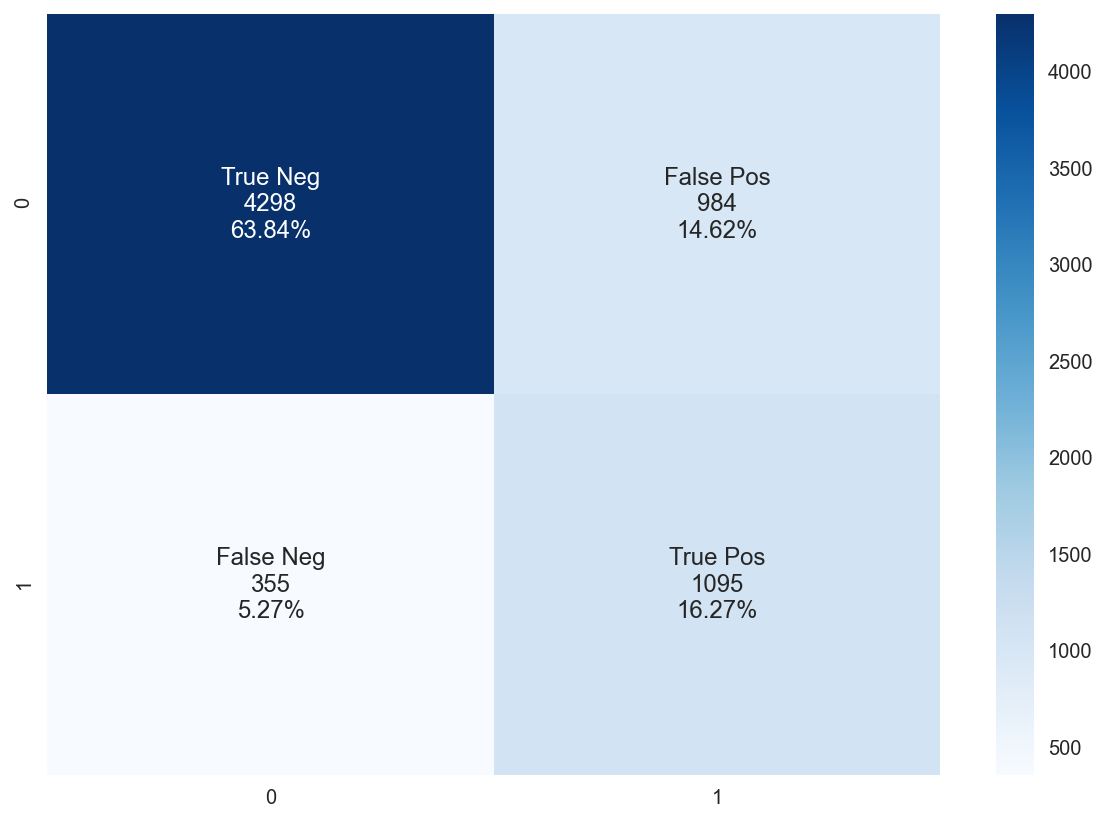

In [76]:
confusion_matrix_normalized(y_test, lgbm_pred_pca, color = 'Blues');

##### XGBoost

In [131]:
# @hidden
xgb_pca = xgb.XGBClassifier(random_state = 2021, verbosity = 0)
clf_xgb_pca = Pipeline([('preprocessor', preprocessor), ('pca', PCA(n_components=11)), ('smt', smt), ('xgb', xgb_pca)])


params_xgb_pca = {"xgb__learning_rate":     [0.001, 0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.50, 0.70] ,
                  "xgb__max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15, 20, 50, 100, 150, 200],
                  "xgb__min_child_weight" : [ 1, 3, 5, 7, 9, 13, 15],
                  "xgb__gamma"            : [ 0.001,  0.01, 0.1, 0.2 , 0.3, 0.4, 0.50, 0.70],
                  "xgb__colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
                 }

clf_xgb_pca = RandomizedSearchCV(estimator=clf_xgb_pca, 
                                 param_distributions=params_xgb_pca, 
                                 cv=5, 
                                 scoring= 'recall', 
                                 n_jobs = -1, 
                                 return_train_score=True,
                                 random_state=2021)

clf_xgb_pca.fit(X_train, y_train);

print('Final score on training-set is: ', clf_xgb_pca.score(X_train, y_train))
print('Final score on test-set is: ', clf_xgb_pca.score(X_test, y_test))

print (' ')
print('\nBest params:\n', clf_xgb_pca.best_params_)

Final score on training-set is:  0.8639393242932659
Final score on test-set is:  0.7289655172413793
 

Best params:
 {'xgb__min_child_weight': 7, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.7, 'xgb__gamma': 0.2, 'xgb__colsample_bytree': 0.7}


In [252]:
# @hidden
final_model_xgb_pca = xgb.XGBClassifier(max_depth = 5,
                                        gamma = 0.2,
                                        min_child_weight = 7,
                                        colsample_bytree = 0.70,
                                        learning_rate = 0.7,
                                        verbosity = 0,
                                        random_state=2021)

clf_xgb_pca = Pipeline([('preprocessor', preprocessor), ('pca', PCA(n_components=11)), ('smt', smt), ('xgb', final_model_xgb_pca)])
clf_xgb_pca.fit(X_train, y_train)

print("Report:")
xgb_pred_pca = clf_xgb_pca.predict(X_test)
xgb_accuracy_pca = round(metrics.accuracy_score(y_test, xgb_pred_pca), 4)
print ('The Accuracy of the XGB-model is: {}'.format(xgb_accuracy_pca))
print (' ')
print(classification_report(y_test, xgb_pred_pca))

Report:
The Accuracy of the XGB-model is: 0.8477
 
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      5282
           1       0.62      0.74      0.68      1450

    accuracy                           0.85      6732
   macro avg       0.77      0.81      0.79      6732
weighted avg       0.86      0.85      0.85      6732



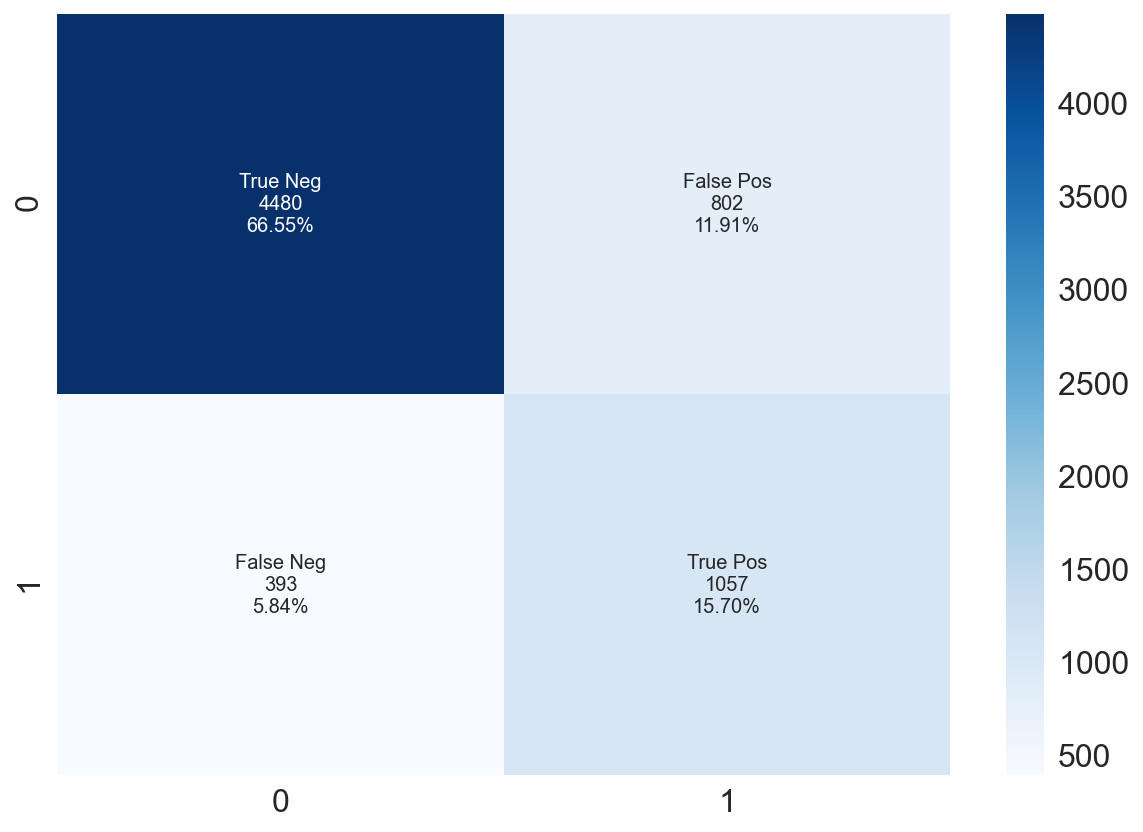

In [133]:
confusion_matrix_normalized(y_test, xgb_pred_pca, color = 'Blues');

##### KNN

In [81]:
# @hidden
knn_pca = KNeighborsClassifier()
clf_knn_pca = Pipeline([('preprocessor', preprocessor), ('pca', PCA(n_components=11)), ('smt', smt), ('knn', knn_pca)])


params_knn_pca = {"knn__leaf_size": list(range(1,50)),
                  "knn__n_neighbors": list(range(1, 30)),
                  "knn__p": [1, 2, 3, 4, 5, 8, 12, 15],
                  'knn__weights': ['uniform','distance']
                 }

clf_knn_pca = RandomizedSearchCV(estimator=clf_knn_pca, 
                                 param_distributions=params_knn_pca, 
                                 cv=5,
                                 scoring= 'recall', 
                                 n_jobs = -1, 
                                 return_train_score=True, 
                                 random_state=2021)

clf_knn_pca.fit(X_train, y_train);

print('Final score on training-set is: ', clf_knn_pca.score(X_train, y_train))
print('Final score on test-set is: ', clf_knn_pca.score(X_test, y_test))

print (' ')
print('\nBest params:\n', clf_knn_pca.best_params_)

Final score on training-set is:  0.8365892898184325
Final score on test-set is:  0.7731034482758621
 

Best params:
 {'knn__weights': 'uniform', 'knn__p': 15, 'knn__n_neighbors': 23, 'knn__leaf_size': 44}


In [82]:
# @hidden
final_model_knn_pca = KNeighborsClassifier(p = 15,
                                           n_neighbors = 23,
                                           leaf_size = 44,
                                           weights = 'uniform'
                                          )

clf_knn_pca = Pipeline([('preprocessor', preprocessor), ('pca', PCA(n_components=11)), ('smt', smt), ('knn', final_model_knn_pca)])
clf_knn_pca.fit(X_train, y_train)

print("Report:")
knn_pred_pca = clf_knn_pca.predict(X_test)
knn_accuracy_pca = round(metrics.accuracy_score(y_test, knn_pred_pca), 4)
print ('The Accuracy of the KNN-model is: {}'.format(knn_accuracy_pca))
print (' ')
print(classification_report(y_test, knn_pred_pca))

Report:
The Accuracy of the KNN-model is: 0.7803
 
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      5282
           1       0.49      0.77      0.60      1450

    accuracy                           0.78      6732
   macro avg       0.71      0.78      0.73      6732
weighted avg       0.83      0.78      0.80      6732



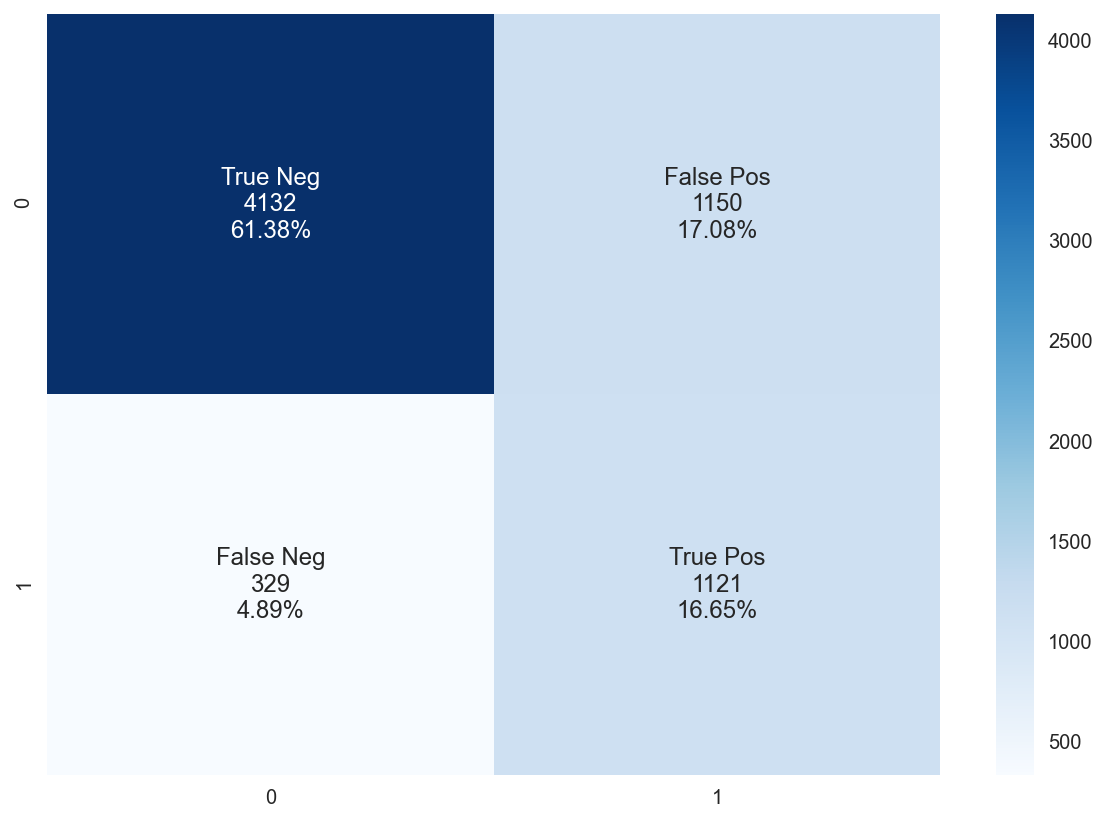

In [83]:
confusion_matrix_normalized(y_test, knn_pred_pca, color = 'Blues');

##### Random Forest

In [84]:
# @hidden
rf_pca = RandomForestClassifier(n_jobs=-1,random_state=2021)
clf_rf_pca = Pipeline([('preprocessor', preprocessor), ('pca', PCA(n_components=11)), ('smt', smt), ('rf', rf_pca)])


params_rf_pca = {'rf__criterion':['gini','entropy'],
                 'rf__n_estimators':[10,15,20,25,30, 35, 40],
                 'rf__min_samples_leaf':[1,2,3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50, 100],
                 'rf__min_samples_split':[3,4,5,6,7, 8, 9, 10, 15, 20], 
                 'rf__random_state': [2021],
                 'rf__n_jobs':[-1]
                }

clf_rf_pca = RandomizedSearchCV(estimator=clf_rf_pca, 
                                param_distributions=params_rf_pca, 
                                cv=5, 
                                scoring= 'recall', 
                                n_jobs = -1, 
                                return_train_score=True, 
                                random_state=2021)

clf_rf_pca.fit(X_train, y_train);

print('Final score on training-set is: ', clf_rf_pca.score(X_train, y_train))
print('Final score on test-set is: ', clf_rf_pca.score(X_test, y_test))

print (' ')
print('\nBest params:\n', clf_rf_pca.best_params_)

Final score on training-set is:  0.7809698919788555
Final score on test-set is:  0.7510344827586207
 

Best params:
 {'rf__random_state': 2021, 'rf__n_jobs': -1, 'rf__n_estimators': 25, 'rf__min_samples_split': 20, 'rf__min_samples_leaf': 50, 'rf__criterion': 'entropy'}


In [85]:
# @hidden
final_model_rf_pca = RandomForestClassifier(n_jobs = -1,
                                            n_estimators = 25,
                                            min_samples_split = 20,
                                            min_samples_leaf = 50,
                                            criterion = 'entropy',
                                            random_state=2021)

clf_rf_pca = Pipeline([('preprocessor', preprocessor), ('pca', PCA(n_components=11)), ('smt', smt), ('rf', final_model_rf_pca)])
clf_rf_pca.fit(X_train, y_train)

print("Report:")
rf_pred_pca = clf_rf_pca.predict(X_test)
rf_accuracy_pca = round(metrics.accuracy_score(y_test, rf_pred_pca), 4)
print ('The Accuracy of the RF-model is: {}'.format(rf_accuracy_pca))
print (' ')
print(classification_report(y_test, rf_pred_pca))

Report:
The Accuracy of the RF-model is: 0.8405
 
              precision    recall  f1-score   support

           0       0.93      0.87      0.89      5282
           1       0.60      0.75      0.67      1450

    accuracy                           0.84      6732
   macro avg       0.77      0.81      0.78      6732
weighted avg       0.86      0.84      0.85      6732



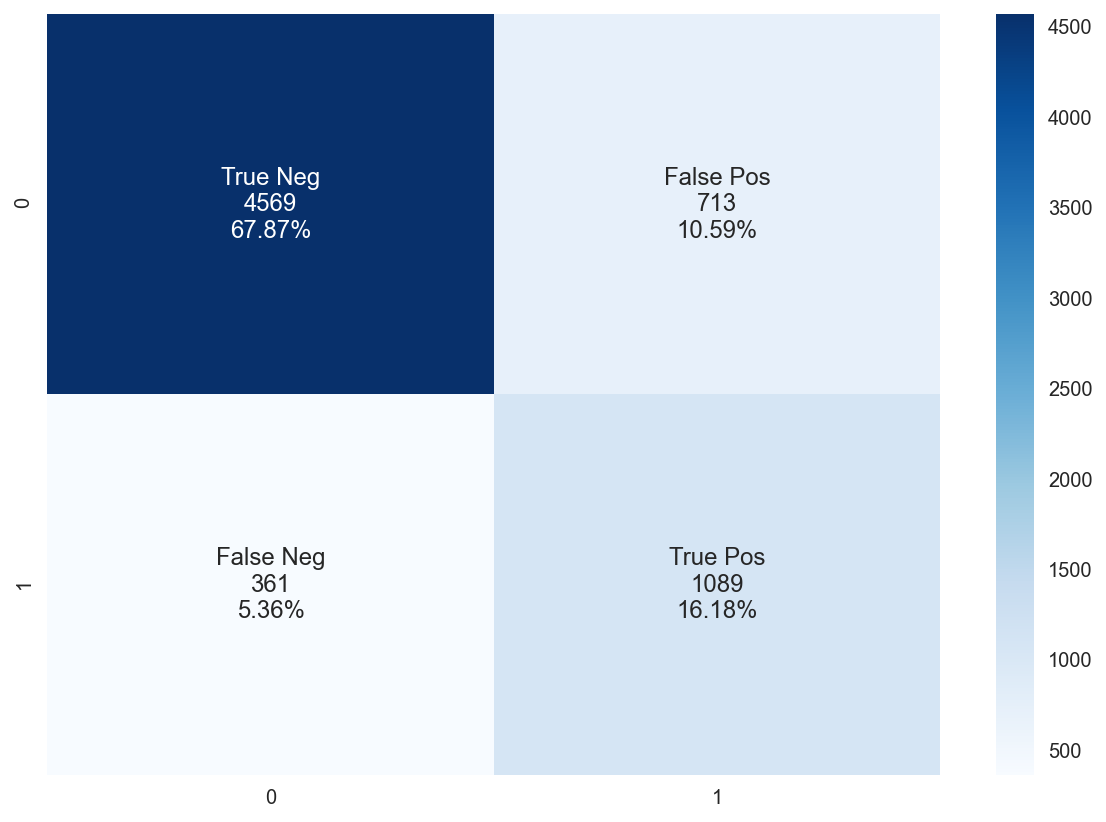

In [86]:
confusion_matrix_normalized(y_test, rf_pred_pca, color = 'Blues');

#### 4.4. ML-modeling with RFE

##### Logistic Regression

In [37]:
# @hidden
logreg_rfe = LogisticRegression(max_iter=5000, random_state=2021)
clf_logreg_rfe = Pipeline([('preprocessor', preprocessor), ('rfe', rfe), ('smt', smt), ('logreg', logreg_rfe)])

params_logreg_rfe = {'logreg__C':[0.01, 0.1, 1, 5, 10, 20, 30, 40, 50], 
                     'logreg__penalty':['l2','l1'],
                     'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                    }

clf_logreg_rfe = RandomizedSearchCV(estimator=clf_logreg_rfe, 
                                    param_distributions = params_logreg_rfe, 
                                    cv=5, 
                                    scoring= 'recall', 
                                    n_jobs = -1, 
                                    return_train_score=True, 
                                    random_state=2021)

clf_logreg_rfe.fit(X_train, y_train);

print('Final score on training-set is: ', clf_logreg_rfe.score(X_train, y_train))
print('Final score on test-set is: ', clf_logreg_rfe.score(X_test, y_test))
print (' ')
print('\nBest params:\n', clf_logreg_rfe.best_params_)

Final score on training-set is:  0.7738450930820501
Final score on test-set is:  0.7772413793103449
 

Best params:
 {'logreg__solver': 'liblinear', 'logreg__penalty': 'l2', 'logreg__C': 0.01}


In [91]:
# @hidden
final_model_logreg_rfe = LogisticRegression(random_state=2021, 
                                            solver = "liblinear", 
                                            penalty = 'l2',
                                            C = 0.01)

clf_logreg_rfe = Pipeline([('preprocessor', preprocessor), ('rfe', rfe), ('smt', smt), ('logreg', final_model_logreg_rfe)])
clf_logreg_rfe.fit(X_train, y_train)

print("Report:")
logreg_pred_rfe = clf_logreg_rfe.predict(X_test)

logreg_pred_rfe = clf_logreg_rfe.predict(X_test)
logreg_accuracy_rfe = round(metrics.accuracy_score(y_test, logreg_pred_rfe),4)
print ('The Accuracy of the LR-model is: {}'.format(logreg_accuracy_rfe))
print (' ')
print(classification_report(y_test, logreg_pred_rfe))

Report:
The Accuracy of the LR-model is: 0.805
 
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      5282
           1       0.53      0.78      0.63      1450

    accuracy                           0.80      6732
   macro avg       0.73      0.79      0.75      6732
weighted avg       0.84      0.80      0.82      6732



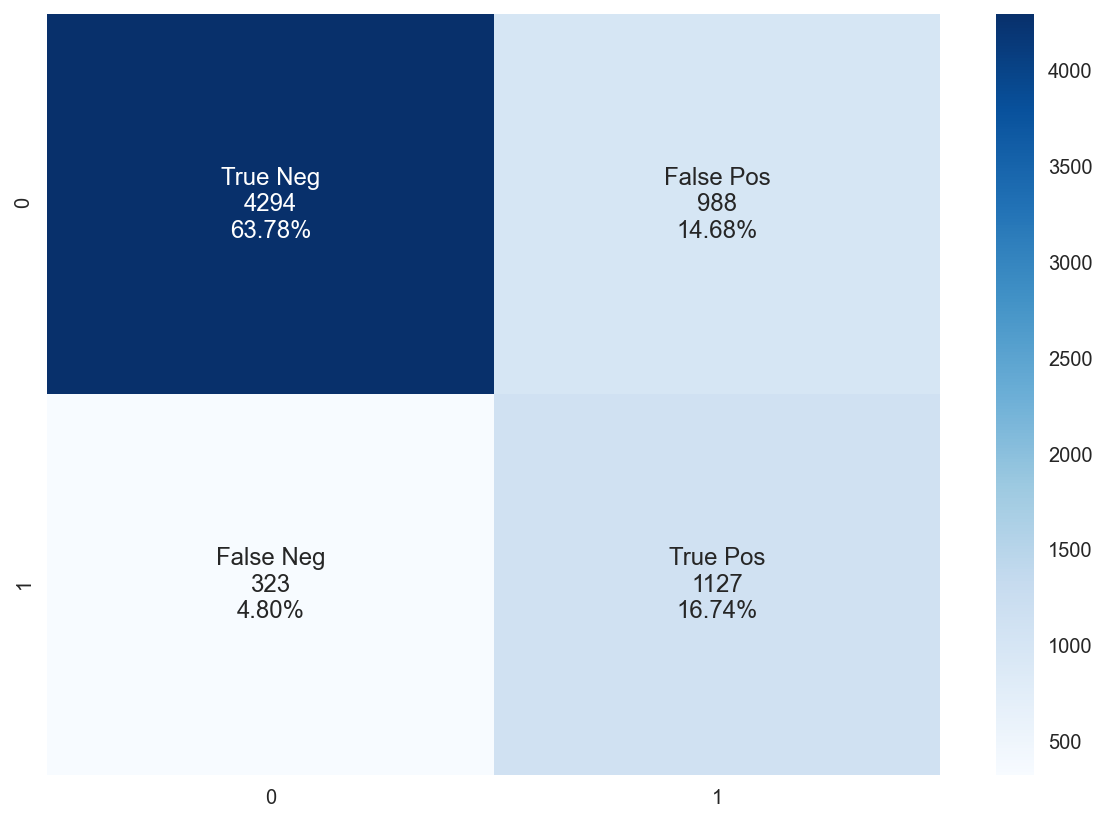

In [39]:
confusion_matrix_normalized(y_test, logreg_pred_rfe, color = 'Blues');

##### AdaBoost

In [42]:
# @hidden
ada_boost_rfe = AdaBoostClassifier(random_state = 2021)
clf_ada_rfe = Pipeline([('preprocessor', preprocessor), ('rfe', rfe), ('smt', smt), ('ada', ada_boost_rfe)])

params_ada_rfe = {'ada__n_estimators': [10, 20, 50, 70, 100, 150, 200],
                  'ada__learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.40],
                  'ada__algorithm': ['SAMME', 'SAMME.R']
                 }

clf_ada_rfe = RandomizedSearchCV(estimator=clf_ada_rfe, 
                                param_distributions = params_ada_rfe, 
                                cv=5, 
                                scoring= 'recall', 
                                n_jobs = -1, 
                                return_train_score=True, 
                                random_state=2021)

clf_ada_rfe.fit(X_train, y_train);

print('Final score on training-set is: ', clf_ada_rfe.score(X_train, y_train))
print('Final score on test-set is: ', clf_ada_rfe.score(X_test, y_test))
print (' ')
print('\nBest params:\n', clf_ada_rfe.best_params_)

Final score on training-set is:  0.7621236497356929
Final score on test-set is:  0.7648275862068965
 

Best params:
 {'ada__n_estimators': 200, 'ada__learning_rate': 0.1, 'ada__algorithm': 'SAMME.R'}


In [93]:
# @hidden
final_model_ada_rfe = AdaBoostClassifier(random_state=2021, 
                                         n_estimators = 200, 
                                         learning_rate = 0.10,
                                         algorithm = 'SAMME.R'
                                        )

clf_ada_rfe = Pipeline([('preprocessor', preprocessor), ('rfe', rfe), ('smt', smt), ('ada', final_model_ada_rfe)])
clf_ada_rfe.fit(X_train, y_train)

print("Report:")
ada_pred_rfe = clf_ada_rfe.predict(X_test)
ada_accuracy_rfe = round(metrics.accuracy_score(y_test, ada_pred_rfe), 4)
print ('The Accuracy of the AdaBoost-model is: {}'.format(ada_accuracy_rfe))
print (' ')
print(classification_report(y_test, ada_pred_rfe))

Report:
The Accuracy of the AdaBoost-model is: 0.8532
 
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      5282
           1       0.63      0.76      0.69      1450

    accuracy                           0.85      6732
   macro avg       0.78      0.82      0.80      6732
weighted avg       0.87      0.85      0.86      6732



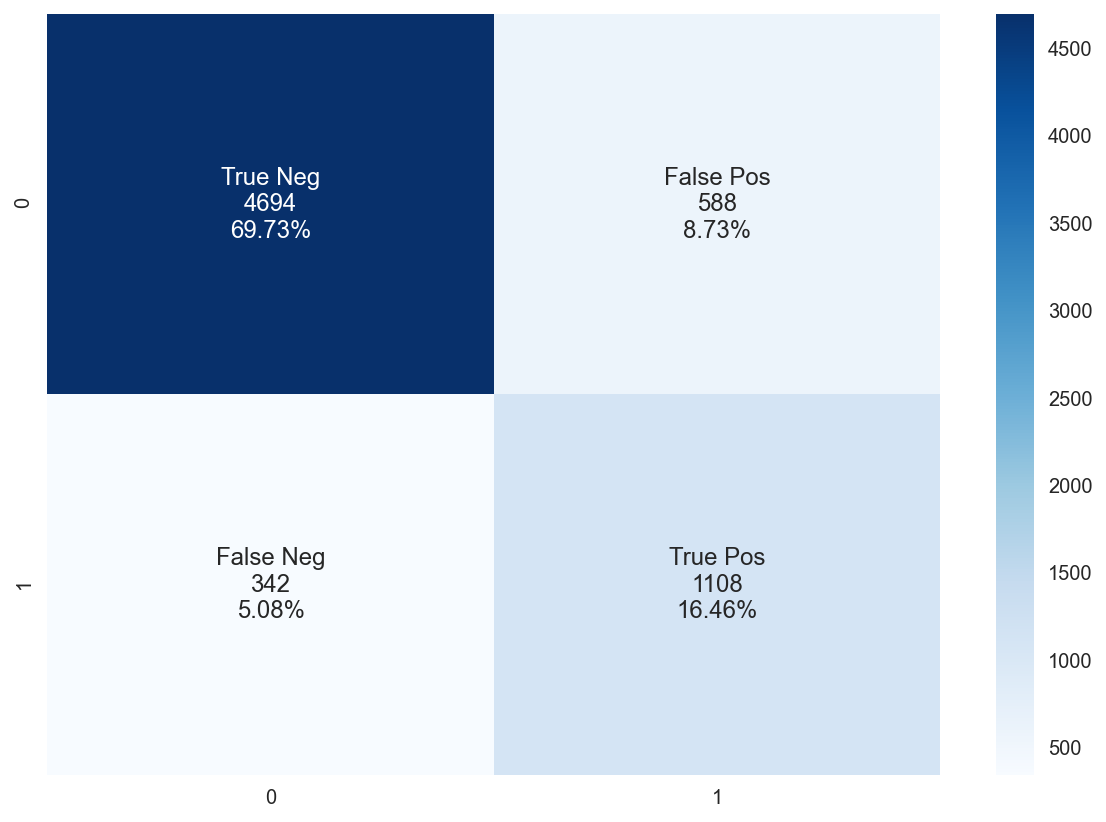

In [44]:
confusion_matrix_normalized(y_test, ada_pred_rfe, color = 'Blues');

##### CatBoost

In [45]:
# @hidden
catb_rfe = CatBoostClassifier(verbose=False, iterations=100, random_state = 2021)
clf_catb_rfe = Pipeline([('preprocessor', preprocessor), ('rfe', rfe), ('smt', smt), ('catb', catb_rfe)])

params_catb_rfe = {'catb__learning_rate': sp_randFloat(),
                   'catb__subsample'    : sp_randFloat(),
                   'catb__max_depth'    : sp_randInt(2, 15),
                   'catb__iterations'   : sp_randInt(10, 200)
                  }

clf_catb_rfe = RandomizedSearchCV(estimator=clf_catb_rfe, 
                                  param_distributions=params_catb_rfe, 
                                  cv=5, 
                                  scoring= 'recall', 
                                  n_jobs = -1, 
                                  return_train_score=True, 
                                  random_state=2021)

clf_catb_rfe.fit(X_train, y_train);

print('Final score on training-set is: ', clf_catb_rfe.score(X_train, y_train))
print('Final score on test-set is: ', clf_catb_rfe.score(X_test, y_test))
print (' ')
print('\nBest params:\n', clf_catb_rfe.best_params_)

Final score on training-set is:  0.9372558032636176
Final score on test-set is:  0.74
 

Best params:
 {'catb__iterations': 190, 'catb__learning_rate': 0.7622904364179465, 'catb__max_depth': 7, 'catb__subsample': 0.20185024783461958}


In [94]:
# @hidden
final_model_cat_rfe = CatBoostClassifier(random_state=2021, 
                                         iterations = 190, 
                                         learning_rate = 0.7622904364179465,
                                         max_depth = 7,
                                         subsample = 0.20185024783461958,
                                         verbose = False
                                        )

clf_cat_rfe = Pipeline([('preprocessor', preprocessor), ('rfe', rfe), ('smt', smt), ('catb', final_model_cat_rfe)])

clf_cat_rfe.fit(X_train, y_train)

print("Report:")
cat_pred_rfe = clf_cat_rfe.predict(X_test)
cat_accuracy_rfe = round(metrics.accuracy_score(y_test, cat_pred_rfe), 4)
print ('The Accuracy of the CatBoost-model is: {}'.format(cat_accuracy_rfe))
print (' ')
print(classification_report(y_test, cat_pred_rfe))

Report:
The Accuracy of the CatBoost-model is: 0.9222
 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5282
           1       0.88      0.74      0.80      1450

    accuracy                           0.92      6732
   macro avg       0.90      0.86      0.88      6732
weighted avg       0.92      0.92      0.92      6732



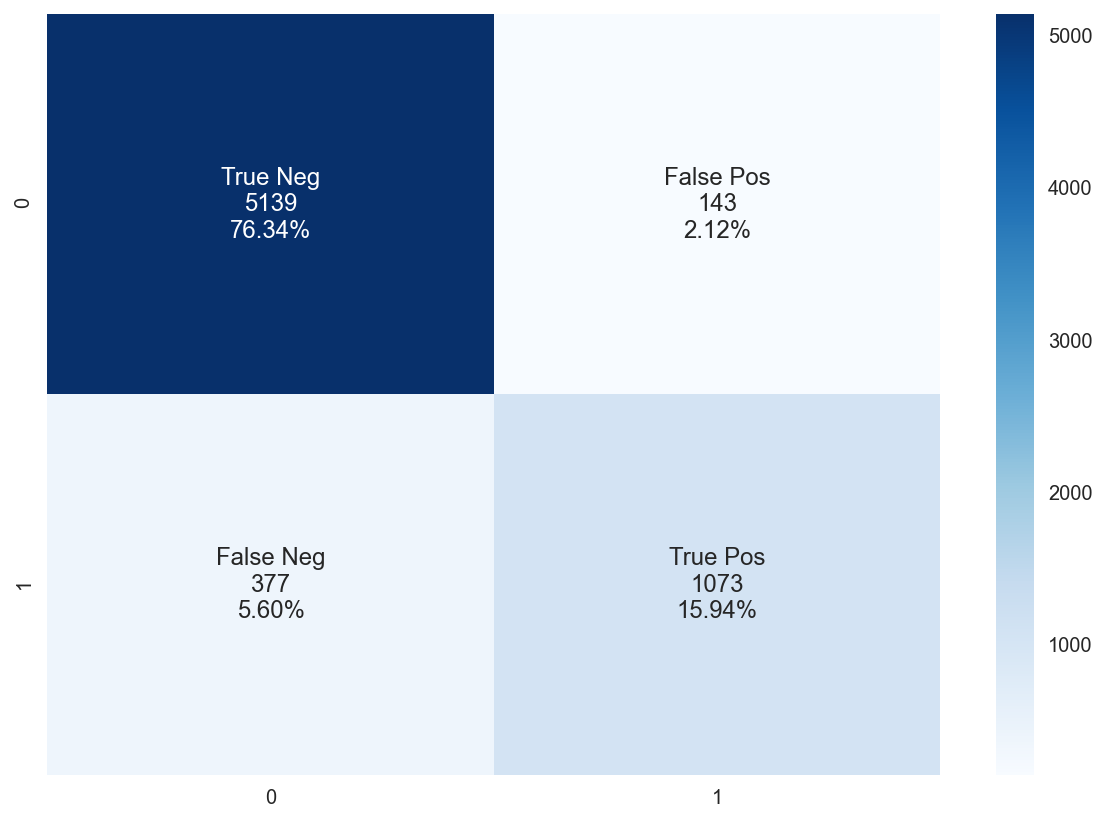

In [47]:
confusion_matrix_normalized(y_test, cat_pred_rfe, color = 'Blues');

##### LGBMClassifier

In [48]:
# @hidden
lgbm_rfe = LGBMClassifier(iterations=100, random_state = 2021)
clf_lgbm_rfe = Pipeline([('preprocessor', preprocessor), ('rfe', rfe), ('smt', smt), ('lgbm', lgbm_rfe)])

params_lgbm_rfe = {'lgbm__num_leaves': sp_randint(6, 200), 
                   'lgbm__min_child_samples': sp_randint(100, 500), 
                   'lgbm__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
                   'lgbm__subsample': sp_uniform(loc=0.2, scale=0.8), 
                   'lgbm__colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
                   'lgbm__reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100, 150, 200],
                   'lgbm__reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100, 150, 200]
                  }

clf_lgbm_rfe = RandomizedSearchCV(estimator=clf_lgbm_rfe, 
                                  param_distributions=params_lgbm_rfe, 
                                  cv=5, 
                                  scoring= 'recall', 
                                  n_jobs = -1, 
                                  return_train_score=True, 
                                  random_state=2021)

clf_lgbm_rfe.fit(X_train, y_train);

print('Final score on training-set is: ', clf_lgbm_rfe.score(X_train, y_train))
print('Final score on test-set is: ', clf_lgbm_rfe.score(X_test, y_test))

print (' ')
print('\nBest params:\n', clf_lgbm_rfe.best_params_)

[LightGBM] [Warning] Unknown parameter: iterations
Final score on training-set is:  0.7699379452999311
Final score on test-set is:  0.7703448275862069
 

Best params:
 {'lgbm__colsample_bytree': 0.7052985403287366, 'lgbm__min_child_samples': 125, 'lgbm__min_child_weight': 1000.0, 'lgbm__num_leaves': 90, 'lgbm__reg_alpha': 2, 'lgbm__reg_lambda': 1, 'lgbm__subsample': 0.6768984278572139}


In [95]:
# @hidden
final_model_lgbm_rfe = LGBMClassifier(reg_alpha=2, 
                                      reg_lambda = 1,
                                      min_child_weight = 1000,
                                      colsample_bytree = 0.7052985403287366,
                                      min_child_samples = 125,
                                      num_leaves = 90,
                                      subsample = 0.6768984278572139,
                                      random_state=2021)

clf_lgbm_rfe = Pipeline([('preprocessor', preprocessor), ('rfe', rfe), ('smt', smt), ('lgbm', final_model_lgbm_rfe)])
clf_lgbm_rfe.fit(X_train, y_train)

print("Report:")
lgbm_pred_rfe = clf_lgbm_rfe.predict(X_test)
lgbm_accuracy_rfe = round(metrics.accuracy_score(y_test, lgbm_pred_rfe), 4)
print ('The Accuracy of the LGBM-model is: {}'.format(lgbm_accuracy_rfe))
print (' ')
print(classification_report(y_test, lgbm_pred_rfe))

Report:
The Accuracy of the LGBM-model is: 0.8213
 
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      5282
           1       0.56      0.76      0.65      1450

    accuracy                           0.82      6732
   macro avg       0.74      0.80      0.76      6732
weighted avg       0.85      0.82      0.83      6732



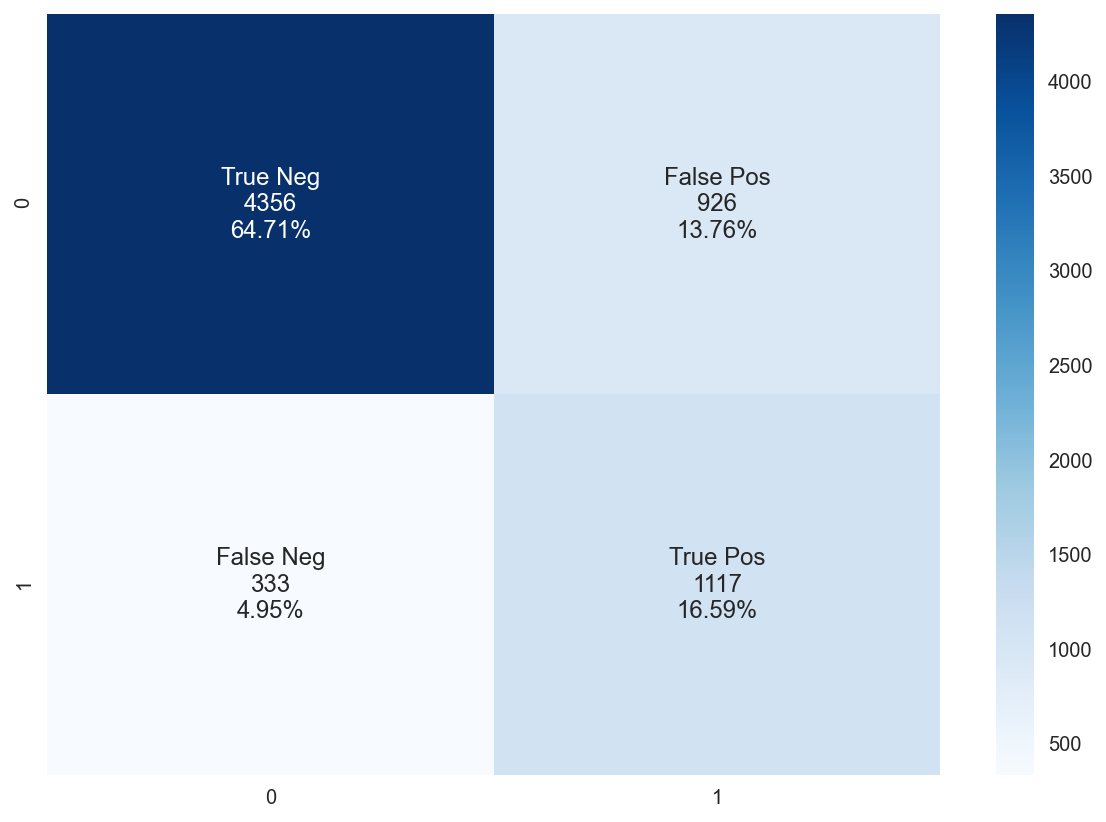

In [50]:
confusion_matrix_normalized(y_test, lgbm_pred_rfe, color = 'Blues');

##### XGBoost

In [134]:
# @hidden
xgb_rfe = xgb.XGBClassifier(random_state = 2021, verbosity = 0)
clf_xgb_rfe = Pipeline([('preprocessor', preprocessor), ('rfe', rfe), ('smt', smt), ('xgb', xgb_rfe)])


params_xgb_rfe = {"xgb__learning_rate":     [0.001, 0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.50, 0.70] ,
                  "xgb__max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15, 20, 50, 100, 150, 200],
                  "xgb__min_child_weight" : [ 1, 3, 5, 7, 9, 13, 15],
                  "xgb__gamma"            : [ 0.001,  0.01, 0.1, 0.2 , 0.3, 0.4, 0.50, 0.70],
                  "xgb__colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
                 }

clf_xgb_rfe = RandomizedSearchCV(estimator=clf_xgb_rfe, 
                                 param_distributions=params_xgb_rfe, 
                                 cv=5, 
                                 scoring= 'recall', 
                                 n_jobs = -1, 
                                 return_train_score=True, 
                                 random_state=2021)

clf_xgb_rfe.fit(X_train, y_train);

print('Final score on training-set is: ', clf_xgb_rfe.score(X_train, y_train))
print('Final score on test-set is: ', clf_xgb_rfe.score(X_test, y_test))

print (' ')
print('\nBest params:\n', clf_xgb_rfe.best_params_)

Final score on training-set is:  1.0
Final score on test-set is:  0.7496551724137931
 

Best params:
 {'xgb__min_child_weight': 5, 'xgb__max_depth': 20, 'xgb__learning_rate': 0.7, 'xgb__gamma': 0.01, 'xgb__colsample_bytree': 0.5}


In [96]:
# @hidden
final_model_xgb_rfe = xgb.XGBClassifier(max_depth = 20,
                                        gamma = 0.01,
                                        min_child_weight = 5,
                                        colsample_bytree = 0.50,
                                        learning_rate = 0.7,
                                        verbosity = 0,
                                        random_state=2021)

clf_xgb_rfe = Pipeline([('preprocessor', preprocessor), ('rfe', rfe), ('smt', smt), ('xgb', final_model_xgb_rfe)])
clf_xgb_rfe.fit(X_train, y_train)

print("Report:")
xgb_pred_rfe = clf_xgb_rfe.predict(X_test)
xgb_accuracy_rfe = round(metrics.accuracy_score(y_test, xgb_pred_rfe), 4)
print ('The Accuracy of the XGB-model is: {}'.format(xgb_accuracy_rfe))
print (' ')
print(classification_report(y_test, xgb_pred_rfe))

Report:
The Accuracy of the XGB-model is: 0.922
 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      5282
           1       0.86      0.76      0.81      1450

    accuracy                           0.92      6732
   macro avg       0.90      0.86      0.88      6732
weighted avg       0.92      0.92      0.92      6732



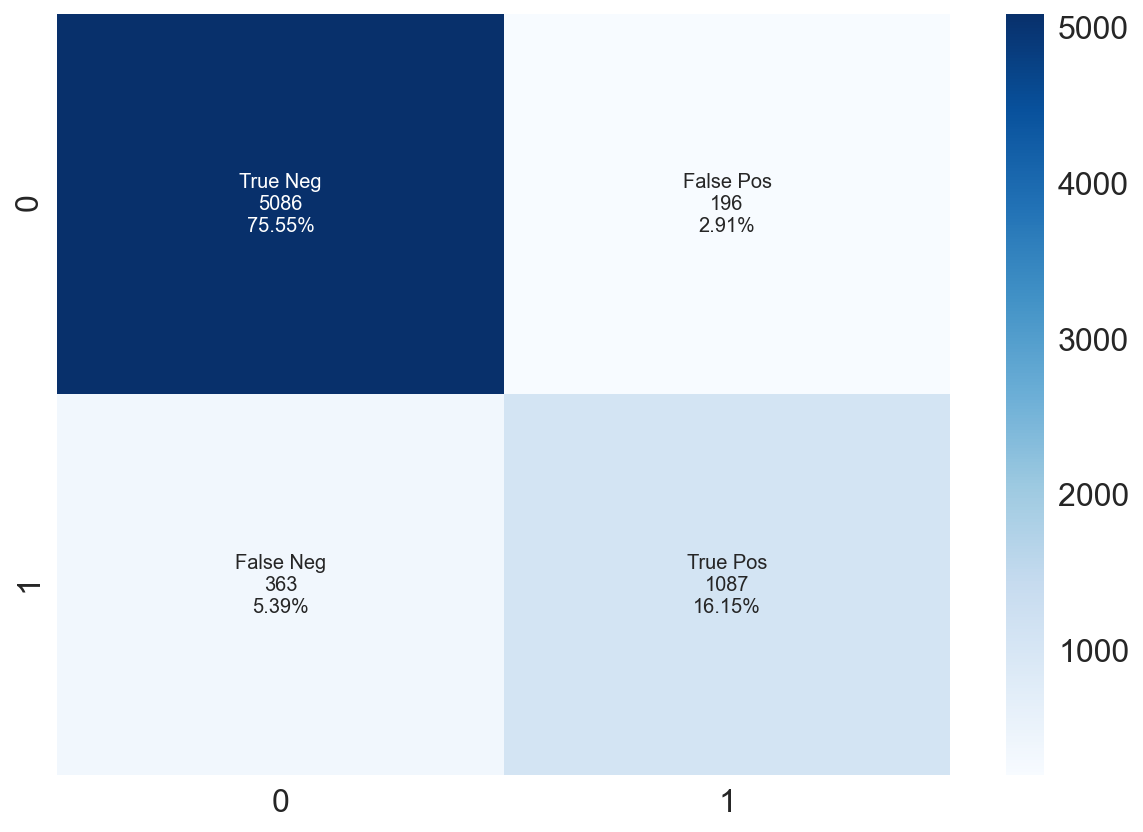

In [137]:
confusion_matrix_normalized(y_test, xgb_pred_rfe, color = 'Blues');

##### KNN

In [55]:
# @hidden
knn_rfe = KNeighborsClassifier()
clf_knn_rfe = Pipeline([('preprocessor', preprocessor), ('rfe', rfe), ('smt', smt), ('knn', knn_rfe)])


params_knn_rfe = {"knn__leaf_size": list(range(1,50)),
                  "knn__n_neighbors": list(range(1, 30)),
                  "knn__p": [1, 2, 3, 4, 5, 8, 12, 15],
                  'knn__weights': ['uniform','distance']
                 }

clf_knn_rfe = RandomizedSearchCV(estimator=clf_knn_rfe, 
                                 param_distributions=params_knn_rfe, 
                                 cv=5, 
                                 scoring= 'recall', 
                                 n_jobs = -1, 
                                 return_train_score=True, 
                                 random_state=2021)

clf_knn_rfe.fit(X_train, y_train);

print('Final score on training-set is: ', clf_knn_rfe.score(X_train, y_train))
print('Final score on test-set is: ', clf_knn_rfe.score(X_test, y_test))

print (' ')
print('\nBest params:\n', clf_knn_rfe.best_params_)

Final score on training-set is:  1.0
Final score on test-set is:  0.7931034482758621
 

Best params:
 {'knn__weights': 'distance', 'knn__p': 12, 'knn__n_neighbors': 17, 'knn__leaf_size': 46}


In [97]:
# @hidden
final_model_knn_rfe = KNeighborsClassifier(p = 12,
                                           n_neighbors = 17,
                                           leaf_size = 46,
                                           weights = 'distance'
                                          )

clf_knn_rfe = Pipeline([('preprocessor', preprocessor), ('rfe', rfe), ('smt', smt), ('knn', final_model_knn_rfe)])
clf_knn_rfe.fit(X_train, y_train)

print("Report:")
knn_pred_rfe = clf_knn_rfe.predict(X_test)
knn_accuracy_rfe = round(metrics.accuracy_score(y_test, knn_pred_rfe), 4)
print ('The Accuracy of the KNN-model is: {}'.format(knn_accuracy_rfe))
print (' ')
print(classification_report(y_test, knn_pred_rfe))

Report:
The Accuracy of the KNN-model is: 0.7914
 
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      5282
           1       0.51      0.79      0.62      1450

    accuracy                           0.79      6732
   macro avg       0.72      0.79      0.74      6732
weighted avg       0.84      0.79      0.81      6732



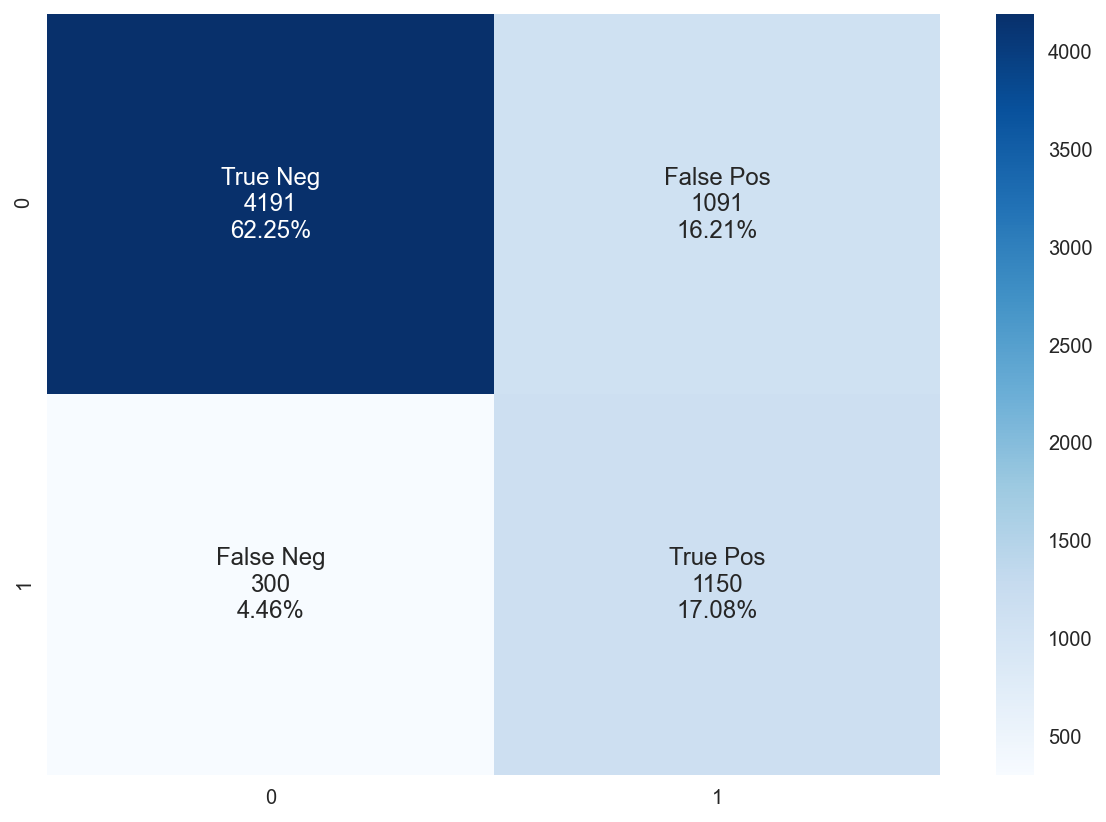

In [58]:
confusion_matrix_normalized(y_test, knn_pred_rfe, color = 'Blues');

##### Random Forest

In [31]:
# @hidden
rf_rfe = RandomForestClassifier(n_jobs=-1,random_state=2021)
clf_rf_rfe = Pipeline([('preprocessor', preprocessor), ('rfe', rfe), ('smt', smt), ('rf', rf_rfe)])


params_rf_rfe = {'rf__criterion':['gini','entropy'],
                 'rf__n_estimators':[10,15,20,25,30, 35, 40],
                 'rf__min_samples_leaf':[1,2,3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50, 100],
                 'rf__min_samples_split':[3,4,5,6,7, 8, 9, 10, 15, 20], 
                 'rf__random_state': [2021],
                 'rf__n_jobs':[-1]}

clf_rf_rfe = RandomizedSearchCV(estimator=clf_rf_rfe, 
                                param_distributions=params_rf_rfe, 
                                cv=5, 
                                scoring= 'recall', 
                                n_jobs = -1, 
                                return_train_score=True, 
                                random_state=2021)

clf_rf_rfe.fit(X_train, y_train);

print('Final score on training-set is: ', clf_rf_rfe.score(X_train, y_train))
print('Final score on test-set is: ', clf_rf_rfe.score(X_test, y_test))

print (' ')
print('\nBest params:\n', clf_rf_rfe.best_params_)

Final score on training-set is:  0.7736152608595726
Final score on test-set is:  0.7448275862068966
 

Best params:
 {'rf__random_state': 2021, 'rf__n_jobs': -1, 'rf__n_estimators': 30, 'rf__min_samples_split': 15, 'rf__min_samples_leaf': 20, 'rf__criterion': 'gini'}


In [99]:
# @hidden
final_model_rf_rfe = RandomForestClassifier(n_jobs = -1,
                                            n_estimators = 30,
                                            min_samples_split = 15,
                                            min_samples_leaf = 20,
                                            criterion = 'gini',
                                            random_state=2021)

clf_rf_rfe = Pipeline([('preprocessor', preprocessor), ('rfe', rfe), ('smt', smt), ('rf', final_model_rf_rfe)])
clf_rf_rfe.fit(X_train, y_train)

print("Report:")
rf_pred_rfe = clf_rf_rfe.predict(X_test)
rf_accuracy_rfe = round(metrics.accuracy_score(y_test, rf_pred_rfe), 4)
print ('The Accuracy of the RF-model is: {}'.format(rf_accuracy_rfe))
print (' ')
print(classification_report(y_test, rf_pred_rfe))

Report:
The Accuracy of the RF-model is: 0.9119
 
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5282
           1       0.83      0.75      0.79      1450

    accuracy                           0.91      6732
   macro avg       0.88      0.85      0.86      6732
weighted avg       0.91      0.91      0.91      6732



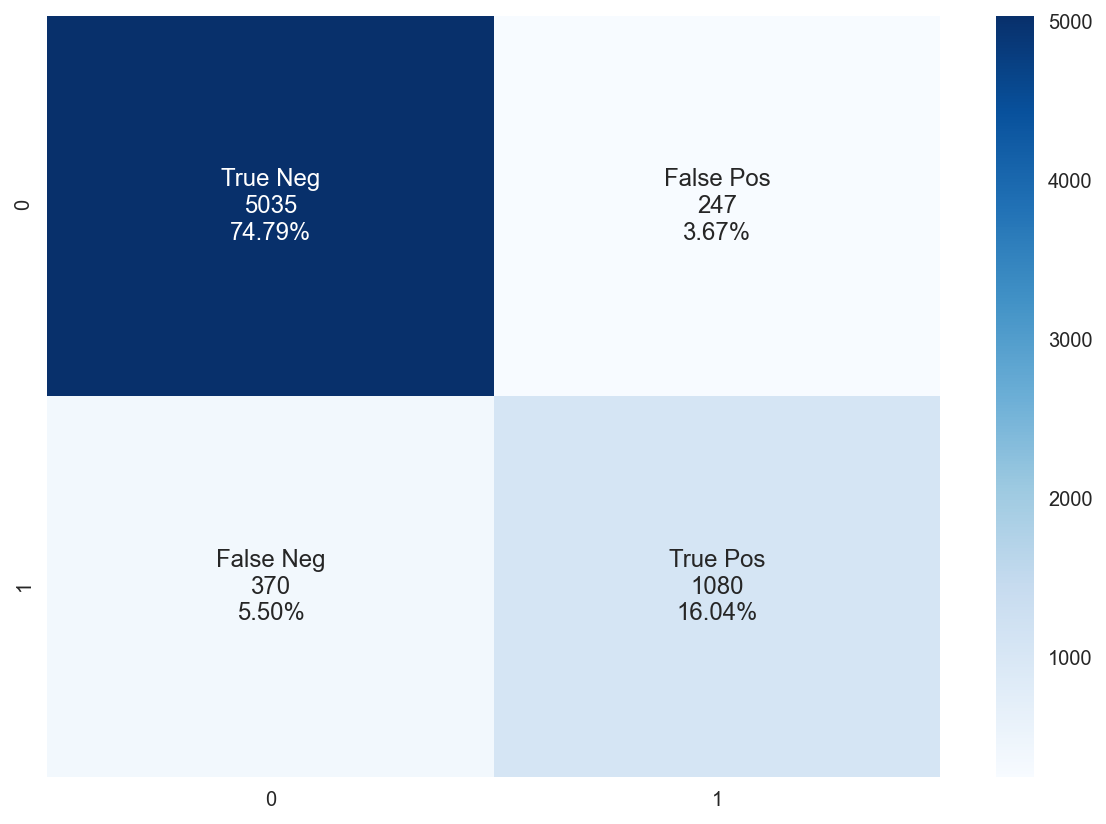

In [57]:
confusion_matrix_normalized(y_test, rf_pred_rfe, color = 'Blues');

#### 4.5. Model Comparisons

##### AUC-ROC plots

AUC-ROC curve is a performance metric for binary classification problem at different thresholds. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much model is capable of distinguishing between classes. The ideal ROC curve would be at the top left-hand corner of the image at a TPR of 1.0 and FPR of 0.0. Or in other words, ROC tells us to what extent the model is capable of distinguishing between classes. The higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. By looking at the plot below, all of our models are quite above average as they are above the basic threshold which is the black dashed line.

The ROC curve is plotted with TPR (True Positive Rate, which is True Positive / [True Positive + False Negative]) against the FPR (False Positive Rate, which is [False Positive / False Positive + True Negative]) where TPR is on the y-axis and FPR is on the x-axis. ROC, other than accuracy, is widely used in imbalanced data. This is the case for credit default risk prediction because it is a combination of precision and recall.

Plotting multiple ROC-Curves in a single figure makes it easier to analyze model performances and find out the best performing model.

###### PCA models

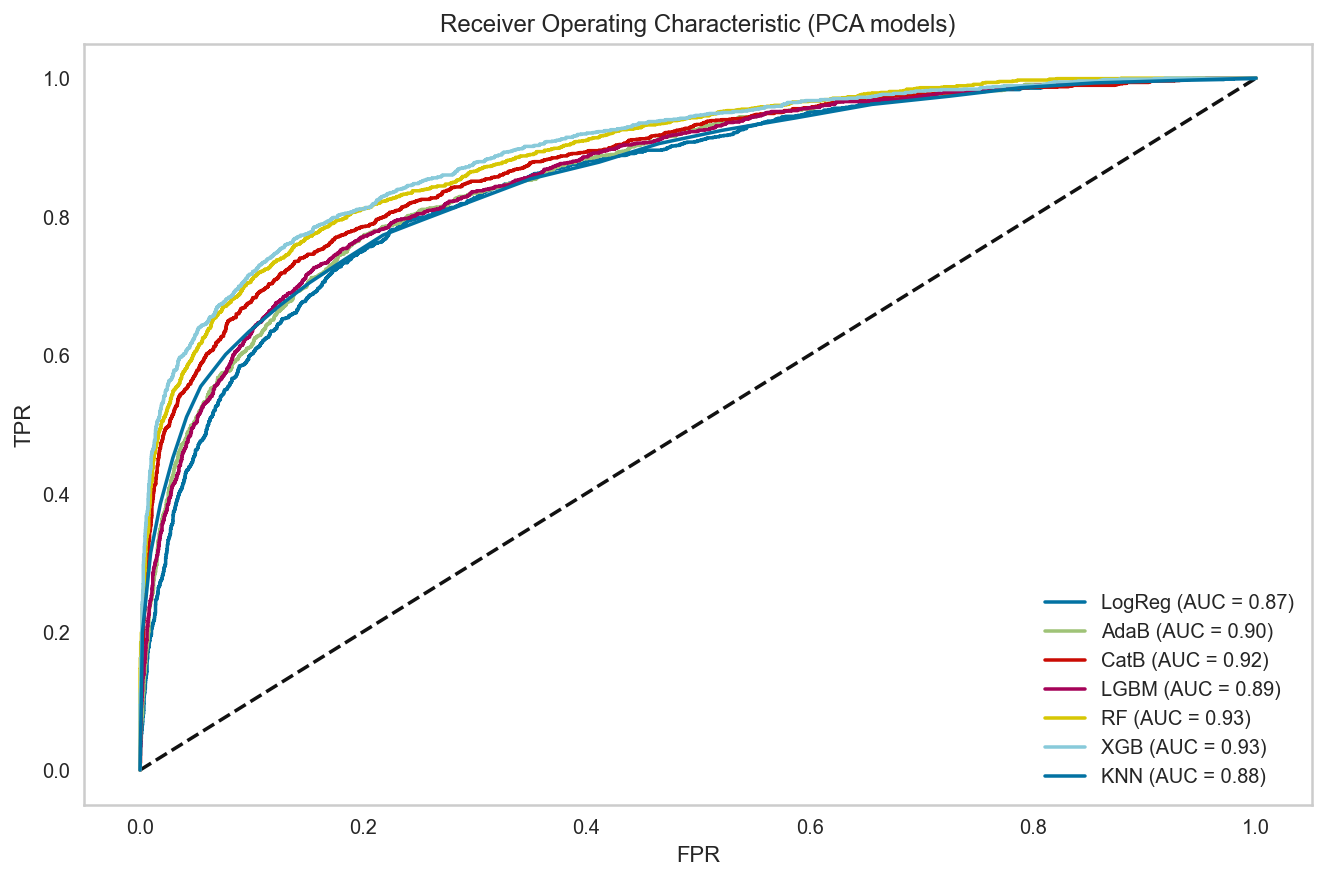

In [87]:
# @hidden
plt.rcParams["figure.figsize"] = (14,8)
logreg_pred_proba_pca = clf_logreg_pca.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, logreg_pred_proba_pca)
auc_roc_logreg_pca = metrics.roc_auc_score(y_test, logreg_pred_proba_pca)

ada_pred_proba_pca = clf_ada_pca.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, ada_pred_proba_pca)
auc_roc_ada_pca = metrics.roc_auc_score(y_test, ada_pred_proba_pca)

cat_pred_proba_pca = clf_cat_pca.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, cat_pred_proba_pca)
auc_roc_cat_pca = metrics.roc_auc_score(y_test, cat_pred_proba_pca)

lgbm_pred_proba_pca = clf_lgbm_pca.predict_proba(X_test)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test, lgbm_pred_proba_pca)
auc_roc_lgbm_pca = metrics.roc_auc_score(y_test, lgbm_pred_proba_pca)

rf_pred_proba_pca = clf_rf_pca.predict_proba(X_test)[:,1]
fpr5 , tpr5, thresholds5 = roc_curve(y_test, rf_pred_proba_pca)
auc_roc_rf_pca = metrics.roc_auc_score(y_test, rf_pred_proba_pca)

xgb_pred_proba_pca = clf_xgb_pca.predict_proba(X_test)[:,1]
fpr6 , tpr6, thresholds6 = roc_curve(y_test, xgb_pred_proba_pca)
auc_roc_xgb_pca = metrics.roc_auc_score(y_test, xgb_pred_proba_pca)

knn_pred_proba_pca = clf_knn_pca.predict_proba(X_test)[:,1]
fpr7 , tpr7, thresholds7 = roc_curve(y_test, knn_pred_proba_pca)
auc_roc_knn_pca = metrics.roc_auc_score(y_test, knn_pred_proba_pca)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label = 'LogReg (AUC = %0.2f)' % auc_roc_logreg, color = 'pink')
plt.plot(fpr2, tpr2, label = 'AdaB (AUC = %0.2f)' % auc_roc_ada)
plt.plot(fpr3, tpr3, label = 'CatB (AUC = %0.2f)' % auc_roc_cat)
plt.plot(fpr4, tpr4, label = 'LGBM (AUC = %0.2f)' % auc_roc_lgbm)
plt.plot(fpr5, tpr5, label = 'RF (AUC = %0.2f)' % auc_roc_rf)
plt.plot(fpr6, tpr6, label = 'XGB (AUC = %0.2f)' % auc_roc_xgb)
plt.plot(fpr7, tpr7, label = 'KNN (AUC = %0.2f)' % auc_roc_knn)
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic (PCA models)')
plt.grid(False)
plt.show()

###### RFE models

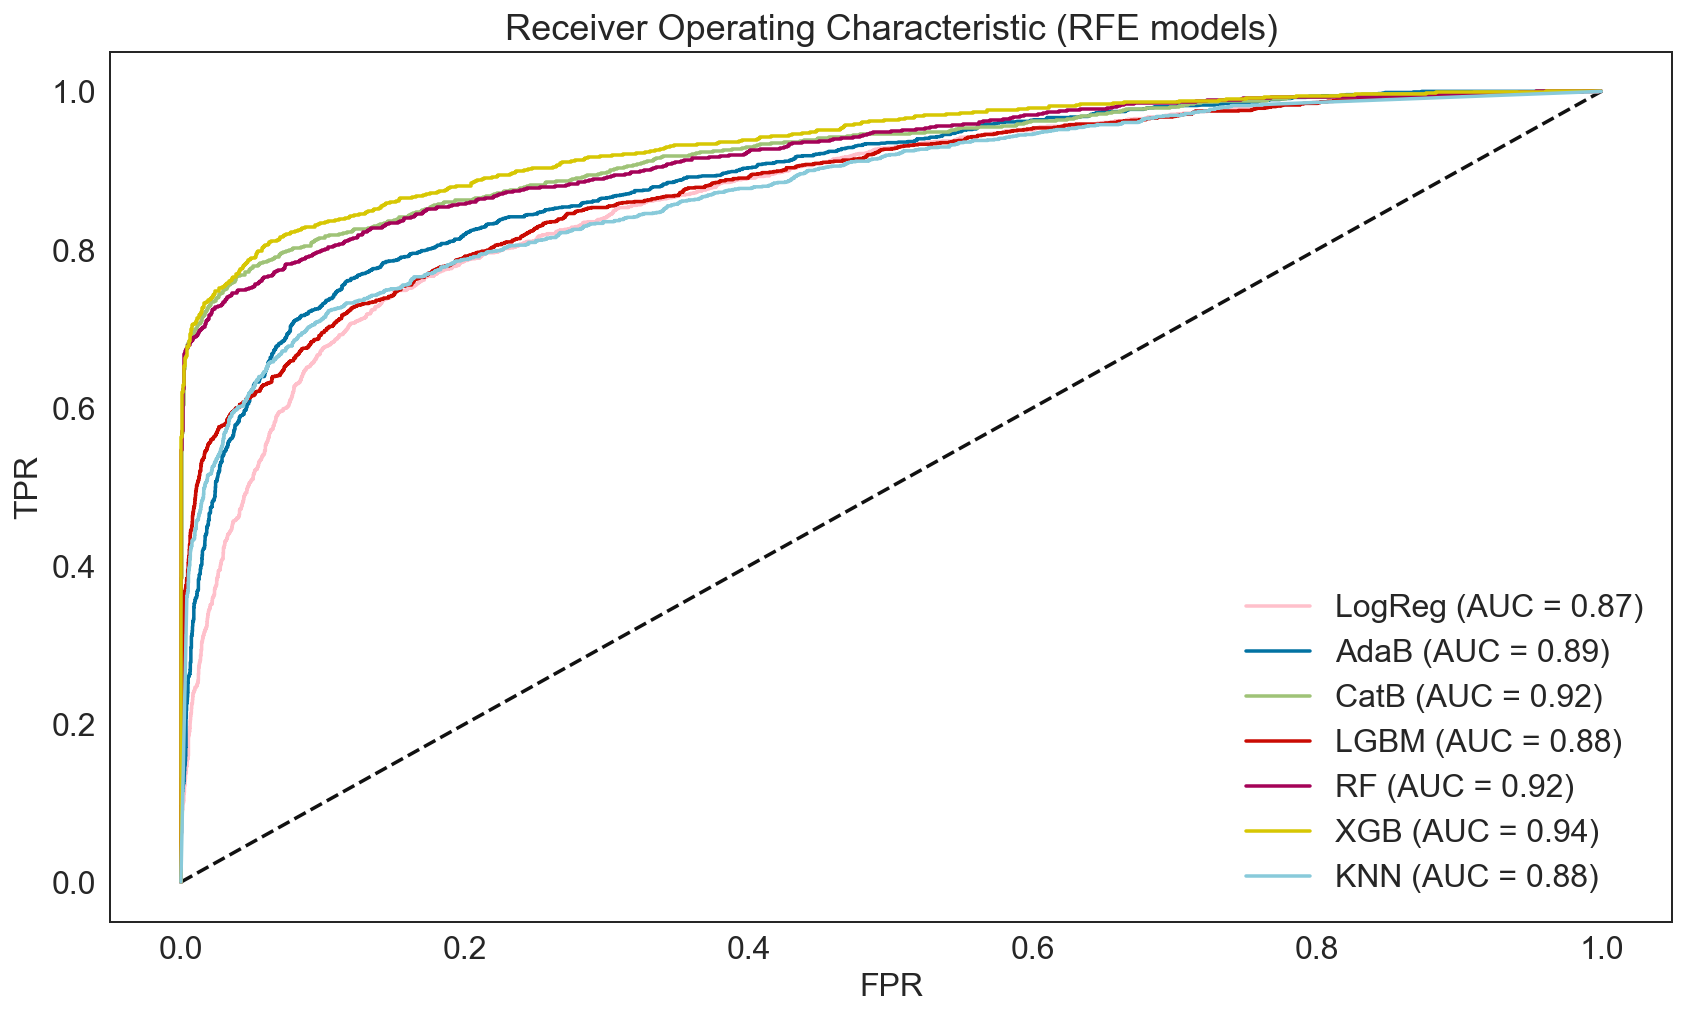

In [247]:
# @hidden
plt.rcParams["figure.figsize"] = (14,8)
logreg_pred_proba_rfe = clf_logreg_rfe.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, logreg_pred_proba_rfe)
auc_roc_logreg_rfe = metrics.roc_auc_score(y_test, logreg_pred_proba_rfe)

ada_pred_proba_rfe = clf_ada_rfe.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, ada_pred_proba_rfe)
auc_roc_ada_rfe = metrics.roc_auc_score(y_test, ada_pred_proba_rfe)

cat_pred_proba_rfe = clf_cat_rfe.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, cat_pred_proba_rfe)
auc_roc_cat_rfe = metrics.roc_auc_score(y_test, cat_pred_proba_rfe)

lgbm_pred_proba_rfe = clf_lgbm_rfe.predict_proba(X_test)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test, lgbm_pred_proba_rfe)
auc_roc_lgbm_rfe = metrics.roc_auc_score(y_test, lgbm_pred_proba_rfe)

rf_pred_proba_rfe = clf_rf_rfe.predict_proba(X_test)[:,1]
fpr5 , tpr5, thresholds5 = roc_curve(y_test, rf_pred_proba_rfe)
auc_roc_rf_rfe = metrics.roc_auc_score(y_test, rf_pred_proba_rfe)

xgb_pred_proba_rfe = clf_xgb_rfe.predict_proba(X_test)[:,1]
fpr6 , tpr6, thresholds6 = roc_curve(y_test, xgb_pred_proba_rfe)
auc_roc_xgb_rfe = metrics.roc_auc_score(y_test, xgb_pred_proba_rfe)

knn_pred_proba_rfe = clf_knn_rfe.predict_proba(X_test)[:,1]
fpr7 , tpr7, thresholds7 = roc_curve(y_test, knn_pred_proba_rfe)
auc_roc_knn_rfe = metrics.roc_auc_score(y_test, knn_pred_proba_rfe)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label = 'LogReg (AUC = %0.2f)' % auc_roc_logreg_rfe, color = 'pink')
plt.plot(fpr2, tpr2, label = 'AdaB (AUC = %0.2f)' % auc_roc_ada_rfe)
plt.plot(fpr3, tpr3, label = 'CatB (AUC = %0.2f)' % auc_roc_cat_rfe)
plt.plot(fpr4, tpr4, label = 'LGBM (AUC = %0.2f)' % auc_roc_lgbm_rfe)
plt.plot(fpr5, tpr5, label = 'RF (AUC = %0.2f)' % auc_roc_rf_rfe)
plt.plot(fpr6, tpr6, label = 'XGB (AUC = %0.2f)' % auc_roc_xgb_rfe)
plt.plot(fpr7, tpr7, label = 'KNN (AUC = %0.2f)' % auc_roc_knn_rfe)
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic (RFE models)')
plt.grid(False)
plt.show()

##### Brier Score

The Brier score is a cost function (or loss function) that measures the accuracy of probabilistic predictions. Because it is a cost function, a lower Brier score indicates more accurate predictions while a higher Brier score indicates less accurate predictions. In its most common formulation, the best and worst possible Brier scores are 0 and 1 respectively.

###### PCA models

In [ ]:
#Reliability plot and Brier Score
fig = plt.figure(figsize=(14,8))
plt.plot([0, 1], [0, 1], color="black")

#KNN
knn_y, knn_x = calibration_curve(y_test, knn_pred_proba_pca, n_bins=10, normalize=True)
loss_knn = brier_score_loss(y_test, knn_pred_proba_pca)
plt.plot(knn_x, knn_y, marker='o', label=f'KNN, Brier score = {str(round(loss_knn,3))}')

#Logistic Regression
lg_y, lg_x = calibration_curve(y_test, logreg_pred_proba_pca, n_bins=10, normalize=True)
loss_lg = brier_score_loss(y_test, logreg_pred_proba_pca)
plt.plot(lg_x, lg_y, marker='o',label=f'Logistic Regression, Brier score = {str(round(loss_lg,3))}')

#XGBoost
xgb_y, xgb_x = calibration_curve(y_test, xgb_pred_proba_pca, n_bins=10, normalize=True)
loss_xgb = brier_score_loss(y_test, xgb_pred_proba_pca)
plt.plot(xgb_x, xgb_y, marker='o', label=f'XGBoost, Brier score = {str(round(loss_xgb,3))}')

#AdaBoost
ada_y, ada_x = calibration_curve(y_test, ada_pred_proba_pca, n_bins=10, normalize=True)
loss_ada = brier_score_loss(y_test, ada_pred_proba_pca)
plt.plot(ada_x, ada_y, marker='o', label=f'AdaBoost, Brier score = {str(round(loss_ada,3))}')

#CatBoost
cat_y, cat_x = calibration_curve(y_test, cat_pred_proba_pca, n_bins=10, normalize=True)
loss_cat = brier_score_loss(y_test, cat_pred_proba_pca)
plt.plot(cat_x, cat_y, marker='o', label=f'CatBoost, Brier score = {str(round(loss_cat,3))}')

#LGBM
lgbm_y, lgbm_x = calibration_curve(y_test, lgbm_pred_proba_pca, n_bins=10, normalize=True)
loss_lgbm = brier_score_loss(y_test, lgbm_pred_proba_pca)
plt.plot(lgbm_x, lgbm_y, marker='o', label=f'LGBM, Brier score = {str(round(loss_lgbm,3))}')

#RF
rf_y, rf_x = calibration_curve(y_test, rf_pred_proba_pca, n_bins=10, normalize=True)
loss_rf = brier_score_loss(y_test, rf_pred_proba_pca)
plt.plot(rf_x, rf_y, marker='o', label=f'Random Forest, Brier score = {str(round(loss_rf,3))}')

plt.ylabel("Actual probabilty")
plt.xlabel("Predicted probability")
plt.title("Reliability plot (with PCA models)")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()

###### RFE models

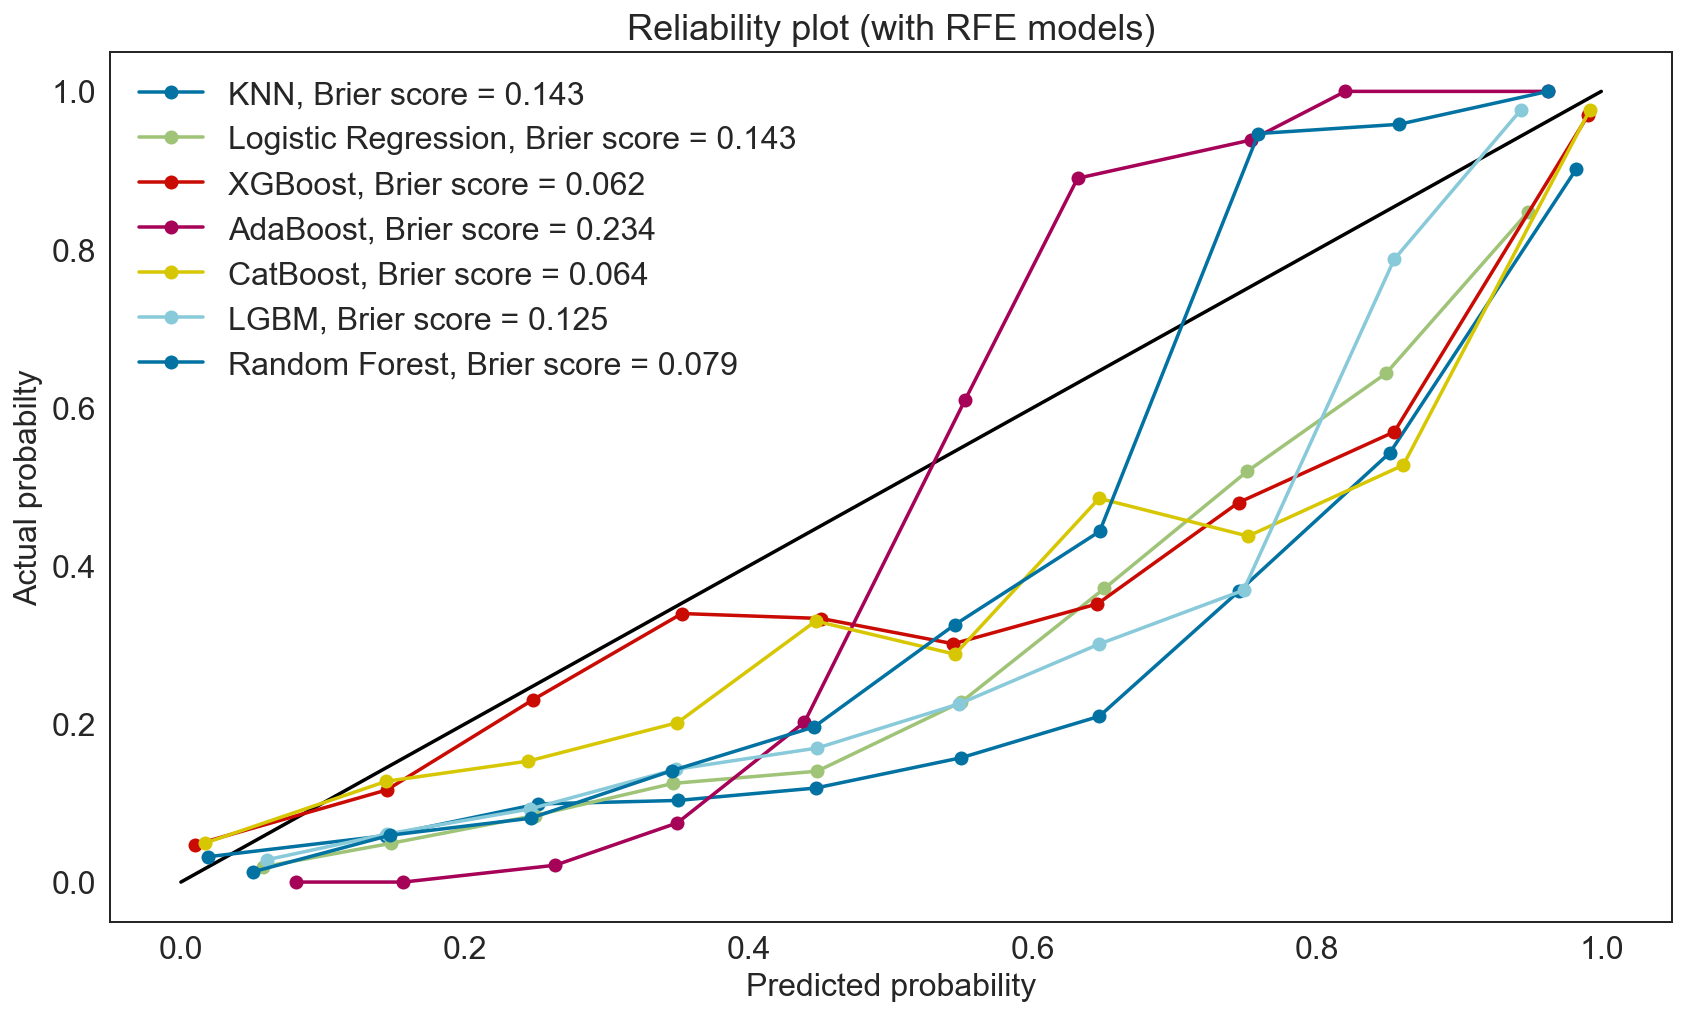

In [112]:
#Reliability plot and Brier Score
fig = plt.figure(figsize=(14,8))
plt.plot([0, 1], [0, 1], color="black")

#KNN
knn_y, knn_x = calibration_curve(y_test, knn_pred_proba_rfe, n_bins=10, normalize=True)
loss_knn = brier_score_loss(y_test, knn_pred_proba_rfe)
plt.plot(knn_x, knn_y, marker='o', label=f'KNN, Brier score = {str(round(loss_knn,3))}')

#Logistic Regression
lg_y, lg_x = calibration_curve(y_test, logreg_pred_proba_rfe, n_bins=10, normalize=True)
loss_lg = brier_score_loss(y_test, logreg_pred_proba_rfe)
plt.plot(lg_x, lg_y, marker='o',label=f'Logistic Regression, Brier score = {str(round(loss_lg,3))}')

#XGBoost
xgb_y, xgb_x = calibration_curve(y_test, xgb_pred_proba_rfe, n_bins=10, normalize=True)
loss_xgb = brier_score_loss(y_test, xgb_pred_proba_rfe)
plt.plot(xgb_x, xgb_y, marker='o', label=f'XGBoost, Brier score = {str(round(loss_xgb,3))}')

#AdaBoost
ada_y, ada_x = calibration_curve(y_test, ada_pred_proba_rfe, n_bins=10, normalize=True)
loss_ada = brier_score_loss(y_test, ada_pred_proba_rfe)
plt.plot(ada_x, ada_y, marker='o', label=f'AdaBoost, Brier score = {str(round(loss_ada,3))}')

#CatBoost
cat_y, cat_x = calibration_curve(y_test, cat_pred_proba_rfe, n_bins=10, normalize=True)
loss_cat = brier_score_loss(y_test, cat_pred_proba_rfe)
plt.plot(cat_x, cat_y, marker='o', label=f'CatBoost, Brier score = {str(round(loss_cat,3))}')

#LGBM
lgbm_y, lgbm_x = calibration_curve(y_test, lgbm_pred_proba_rfe, n_bins=10, normalize=True)
loss_lgbm = brier_score_loss(y_test, lgbm_pred_proba_rfe)
plt.plot(lgbm_x, lgbm_y, marker='o', label=f'LGBM, Brier score = {str(round(loss_lgbm,3))}')

#RF
rf_y, rf_x = calibration_curve(y_test, rf_pred_proba_rfe, n_bins=10, normalize=True)
loss_rf = brier_score_loss(y_test, rf_pred_proba_rfe)
plt.plot(rf_x, rf_y, marker='o', label=f'Random Forest, Brier score = {str(round(loss_rf,3))}')

plt.ylabel("Actual probabilty")
plt.xlabel("Predicted probability")
plt.title("Reliability plot (with RFE models)")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()

##### Precision-Recall Curve

###### PCA models

###### RFE models

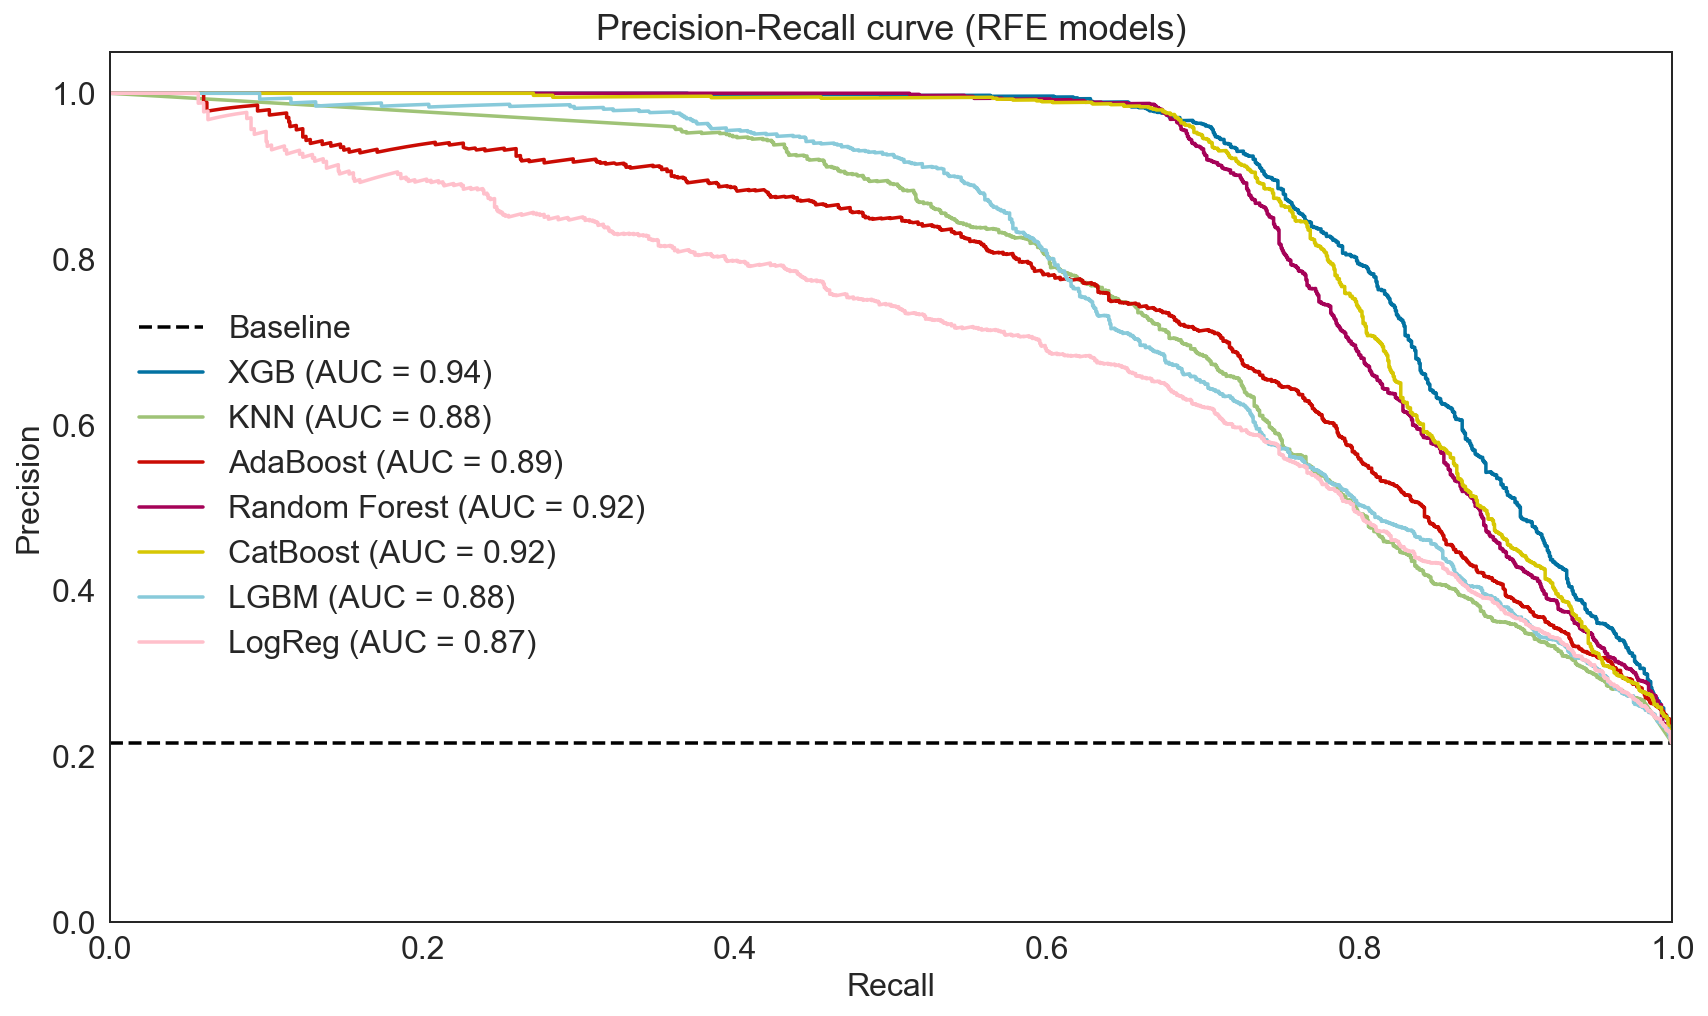

In [251]:
# Compute Precision-Recall and plot curve
plt.rcParams["figure.figsize"] = (14,8)

# XGB
precision1, recall1, thresholds1 = precision_recall_curve(y_test, xgb_pred_proba_rfe)
area_xgb = metrics.roc_auc_score(y_test, xgb_pred_proba_rfe)

# KNN
precision2, recall2, thresholds2 = precision_recall_curve(y_test, knn_pred_proba_rfe)
area_knn = metrics.roc_auc_score(y_test, knn_pred_proba_rfe)

# AdaBoost
precision3, recall3, thresholds3 = precision_recall_curve(y_test, ada_pred_proba_rfe)
area_ada = metrics.roc_auc_score(y_test, ada_pred_proba_rfe)

# RandomForest
precision4, recall4, thresholds4 = precision_recall_curve(y_test, rf_pred_proba_rfe)
area_rf = metrics.roc_auc_score(y_test, rf_pred_proba_rfe)

# CatBoost
precision5, recall5, thresholds5 = precision_recall_curve(y_test, cat_pred_proba_rfe)
area_cat = metrics.roc_auc_score(y_test, cat_pred_proba_rfe)

# LGBM
precision6, recall6, thresholds6 = precision_recall_curve(y_test, lgbm_pred_proba_rfe)
area_lgbm = metrics.roc_auc_score(y_test, lgbm_pred_proba_rfe)

# LogReg
precision7, recall7, thresholds7 = precision_recall_curve(y_test, logreg_pred_proba_rfe)
area_logreg = metrics.roc_auc_score(y_test, logreg_pred_proba_rfe)

# Baseline
baseline = len(y_test[y_test==1]) / len(y_test)

pl.clf()
pl.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline', color = 'black')
pl.plot(recall1, precision1, label = 'XGB (AUC = %0.2f)' % area_xgb)
pl.plot(recall2, precision2, label = 'KNN (AUC = %0.2f)' % area_knn)
pl.plot(recall3, precision3, label = 'AdaBoost (AUC = %0.2f)' % area_ada)
pl.plot(recall4, precision4, label = 'Random Forest (AUC = %0.2f)' % area_rf)
pl.plot(recall5, precision5, label = 'CatBoost (AUC = %0.2f)' % area_cat)
pl.plot(recall6, precision6, label = 'LGBM (AUC = %0.2f)' % area_lgbm)
pl.plot(recall7, precision7, label = 'LogReg (AUC = %0.2f)' % area_logreg, color = 'pink')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.05])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall curve (RFE models)')
pl.legend(loc="best")
pl.show()

#### 4.6. Threshold Fitting (of best model)

The decision for converting a predicted probability or scoring into a class label is governed by a parameter referred to as the “decision threshold,” “discrimination threshold,” or simply the “threshold.” The default value for the threshold is 0.5 for normalized predicted probabilities or scores in the range between 0 or 1.

For instance, for our kind problem, credit default prediction, we have to decide that all customers whose score is above a certain threshold should not be granted a loan or should be investigated more thoroughly, which will review each case indepently. 

In general, for a binary classification problem with class labels 0 and 1, normalized predicted probabilities and a threshold of 0.5, then values less than the threshold of 0.5 are assigned to class 0 and values greater than or equal to 0.5 are assigned to class 1.
- Prediction < 0.5 = Class 0
- Prediction >= 0.5 = Class 1

The problem is that the default threshold may not represent an optimal interpretation of the predicted probabilities. Thus, in order to overcome this issue, we are using the **G-mean** to find the optimal threshold value for our classification model, which, if optimized correctly, will seek a balance between the sensitivity and the specificity. The G-Mean is defined as follows [4]:
- G-Mean = sqrt(Sensitivity * Specificity)

##### Best PCA-model

Best Threshold: 0.44859999418258667 with G-Mean: 0.814
FPR: 0.1558, TPR: 0.7848


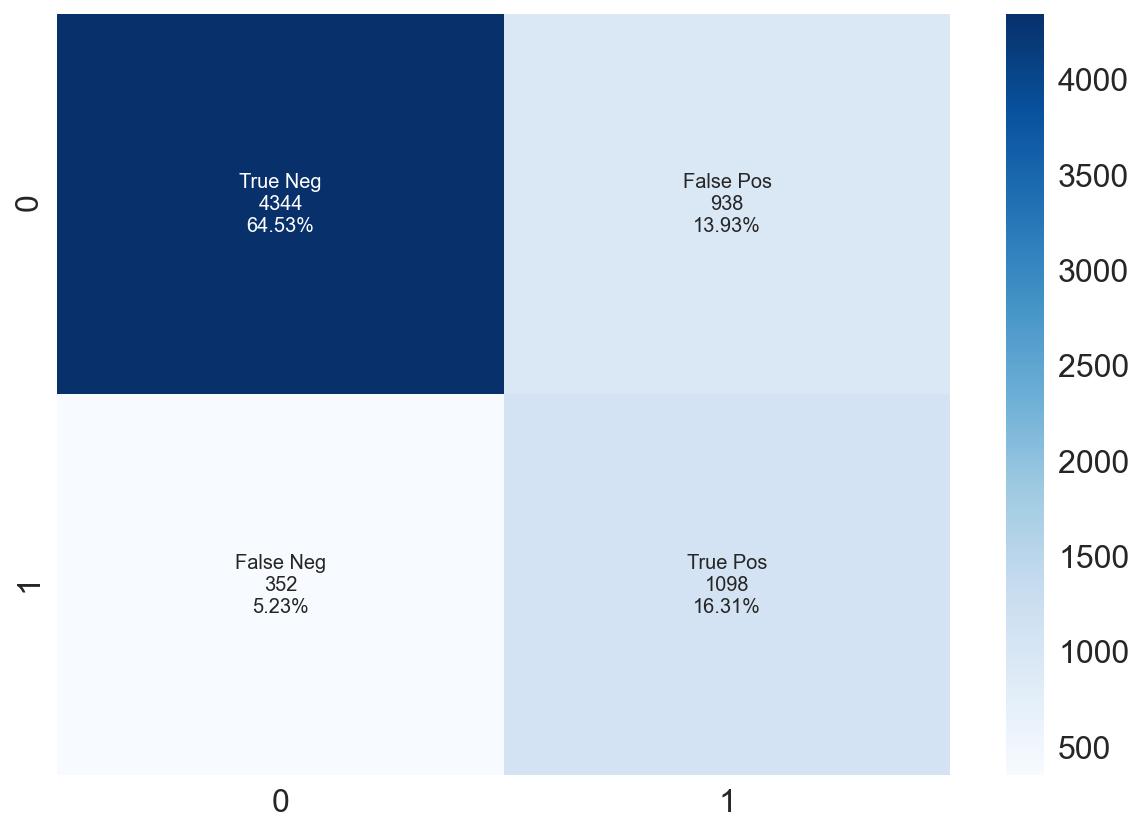

In [138]:
# @hidden
# get threshold for XGB
xgb_threshold_pca = threshold_optimizer(y_test, xgb_pred_proba_pca);

# Plot confusion matrix for XGB with optimized threshold
pred_threshold_pca = makePredThresh(clf_xgb_pca, thr=xgb_threshold_pca, X_test = X_test)
confusion_matrix_normalized(y_test, pred_threshold_pca, color = 'Blues');

##### Best RFE-model

Best Threshold: 0.26080000400543213 with G-Mean: 0.8535
FPR: 0.0661, TPR: 0.78


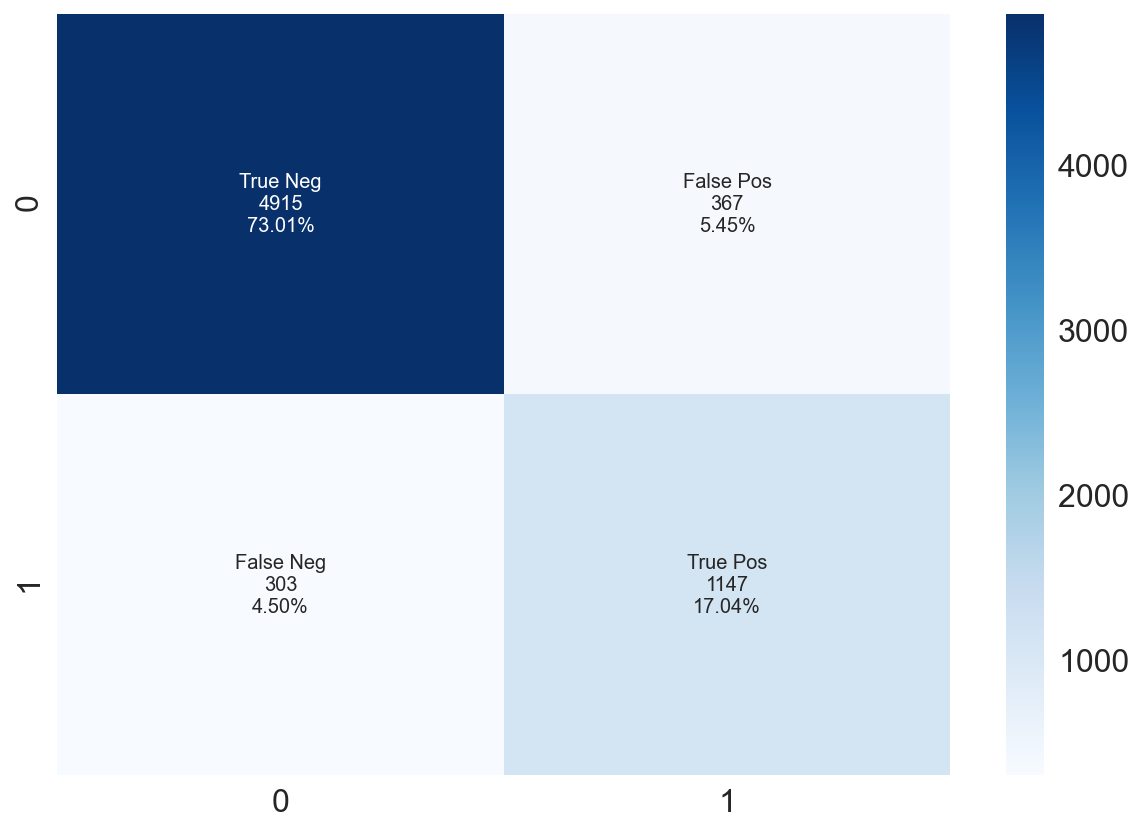

In [139]:
# @hidden
# get threshold for XGB
xgb_threshold_rfe = threshold_optimizer(y_test, xgb_pred_proba_rfe);

# Plot confusion matrix for XGB with optimized threshold
pred_threshold_rfe = makePredThresh(clf_xgb_rfe, thr=xgb_threshold_rfe, X_test = X_test)
confusion_matrix_normalized(y_test, pred_threshold_rfe, color = 'Blues');

#### 4.7. Evaluate final (tuned) model on test set

In [95]:
# @hidden
# remove ID and status from holdout_set
holdout_set_prediction = holdout_set.drop(['id', 'status'], 1)

# create y_validation (TARGET-class)
y_holdout_set = holdout_set['status'].values

##### PCA model

In [140]:
# @hidden
# apply fitted XGB-model 
pred_threshold_holdout_pca = makePredThresh(clf_xgb_pca, thr=xgb_threshold_pca, X_test = holdout_set_prediction)
xgb_accuracy_holdout_pca = round(metrics.accuracy_score(y_holdout_set, pred_threshold_holdout_pca), 4)
print ('The Accuracy of the XGB-model is: {}'.format(xgb_accuracy_holdout_pca))
print (' ')
print(classification_report(y_holdout_set, pred_threshold_holdout_pca))

The Accuracy of the XGB-model is: 0.8277
 
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      3728
           1       0.57      0.78      0.66      1024

    accuracy                           0.83      4752
   macro avg       0.75      0.81      0.77      4752
weighted avg       0.86      0.83      0.84      4752



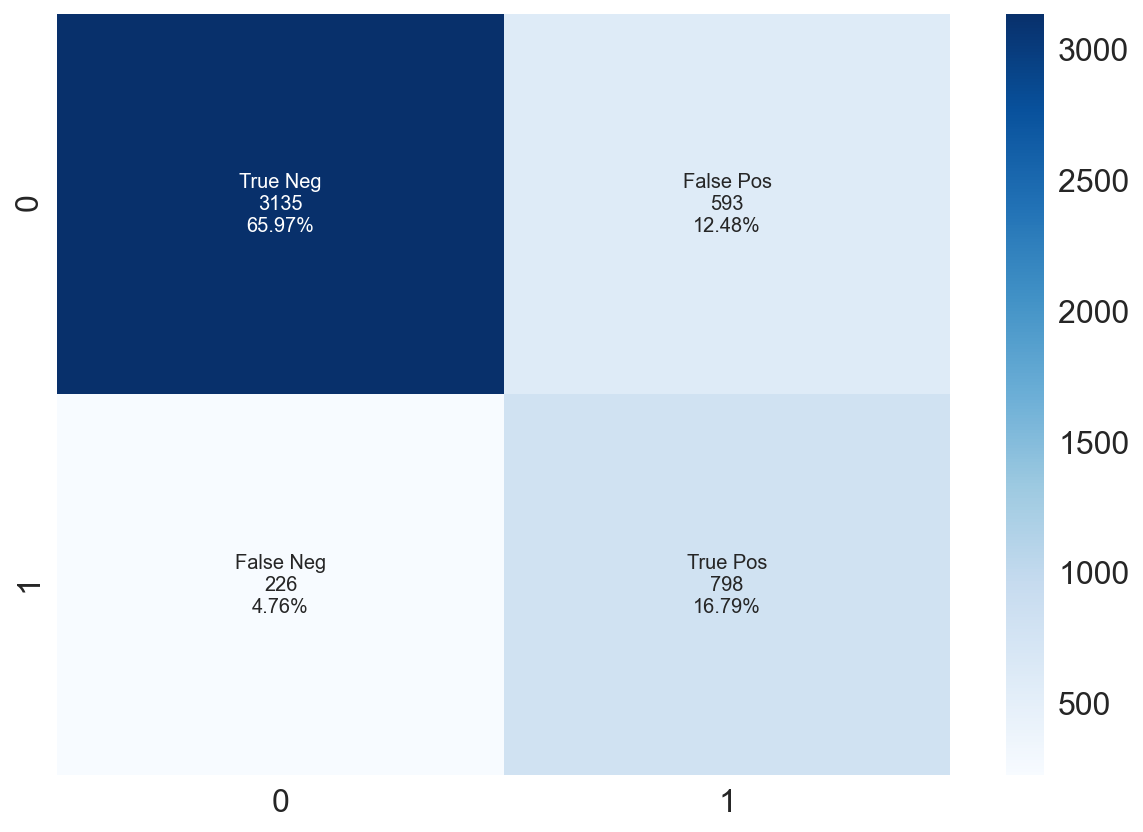

In [141]:
confusion_matrix_normalized(y_holdout_set, pred_threshold_holdout_pca, color = 'Blues');

##### RFE model

In [142]:
# @hidden
# apply fitted XGB-model 
pred_threshold_holdout_rfe = makePredThresh(clf_xgb_rfe, thr=xgb_threshold_rfe, X_test = holdout_set_prediction)
xgb_accuracy_holdout_rfe = round(metrics.accuracy_score(y_holdout_set, pred_threshold_holdout_rfe), 4)
print ('The Accuracy of the XGB-model is: {}'.format(xgb_accuracy_holdout_rfe))
print (' ')
print(classification_report(y_holdout_set, pred_threshold_holdout_rfe))

The Accuracy of the XGB-model is: 0.9106
 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3728
           1       0.77      0.83      0.80      1024

    accuracy                           0.91      4752
   macro avg       0.86      0.88      0.87      4752
weighted avg       0.91      0.91      0.91      4752



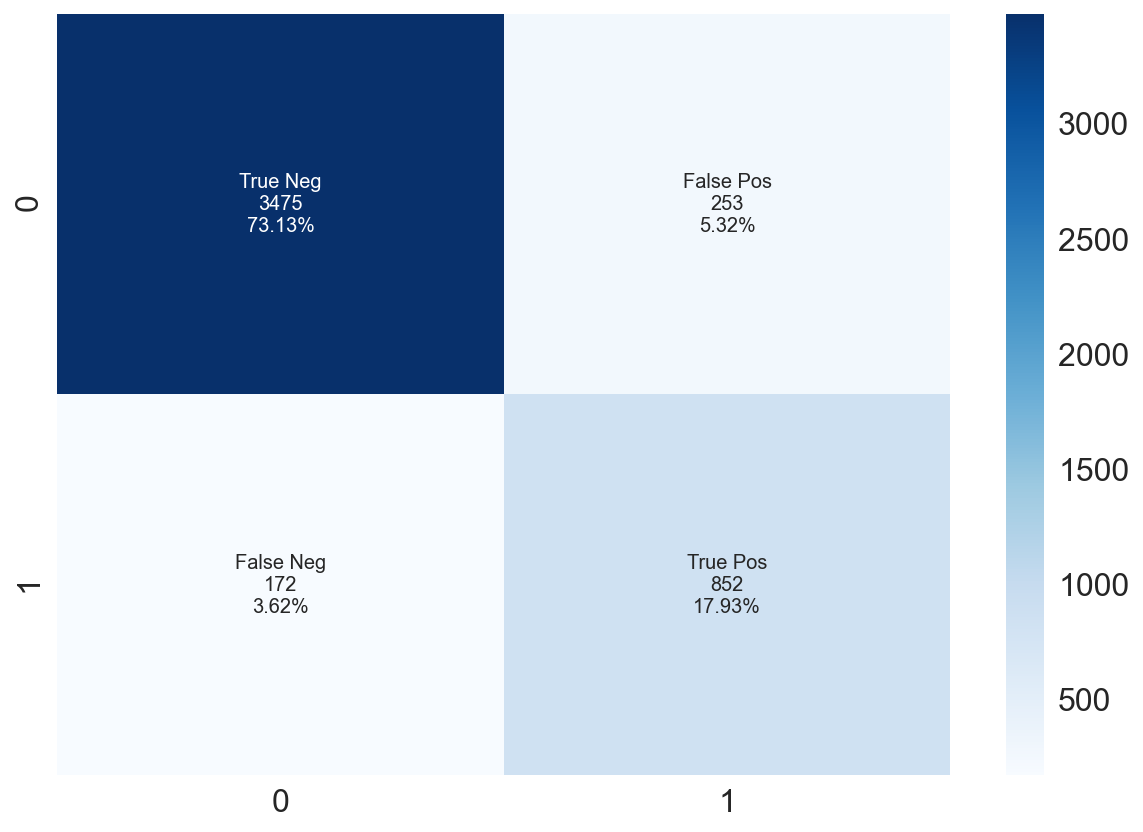

In [143]:
confusion_matrix_normalized(y_holdout_set, pred_threshold_holdout_rfe, color = 'Blues');

### 5. Model Interpretability with SHAP
SHAP — which stands for SHapley Additive exPlanations — is one of the state of the art techniques in ML-explainability. This algorithm was first published in 2017 by Lundberg and Lee and it is a brilliant way to reverse-engineer the output of any predictive algorithm.

In [ ]:
# https://christophm.github.io/interpretable-ml-book/shap.html
# https://gust.dev/python/model-interpretability
# https://www.kdnuggets.com/2019/12/interpretability-part-3-lime-shap.html

In [155]:
# https://www.kaggle.com/kritidoneria/responsible-ai-model-explainability/data
explainer = shap.TreeExplainer(clf_xgb_rfe.named_steps["xgb"])
observations = clf_xgb_rfe.named_steps["preprocessor"].transform(X_train)
shap_values = explainer.shap_values(observations)
shap.initjs()

Another interesting plot that we can generate with SHAP is the summary_plot, it can be seen as a feature importance plot with more meaningful insights. Below we're plotting the summary plot for class 1 on the whole subset. The colour corresponds to the value of the feature and the x axis corresponds to the SHAP value, meaning the impact on the probability.

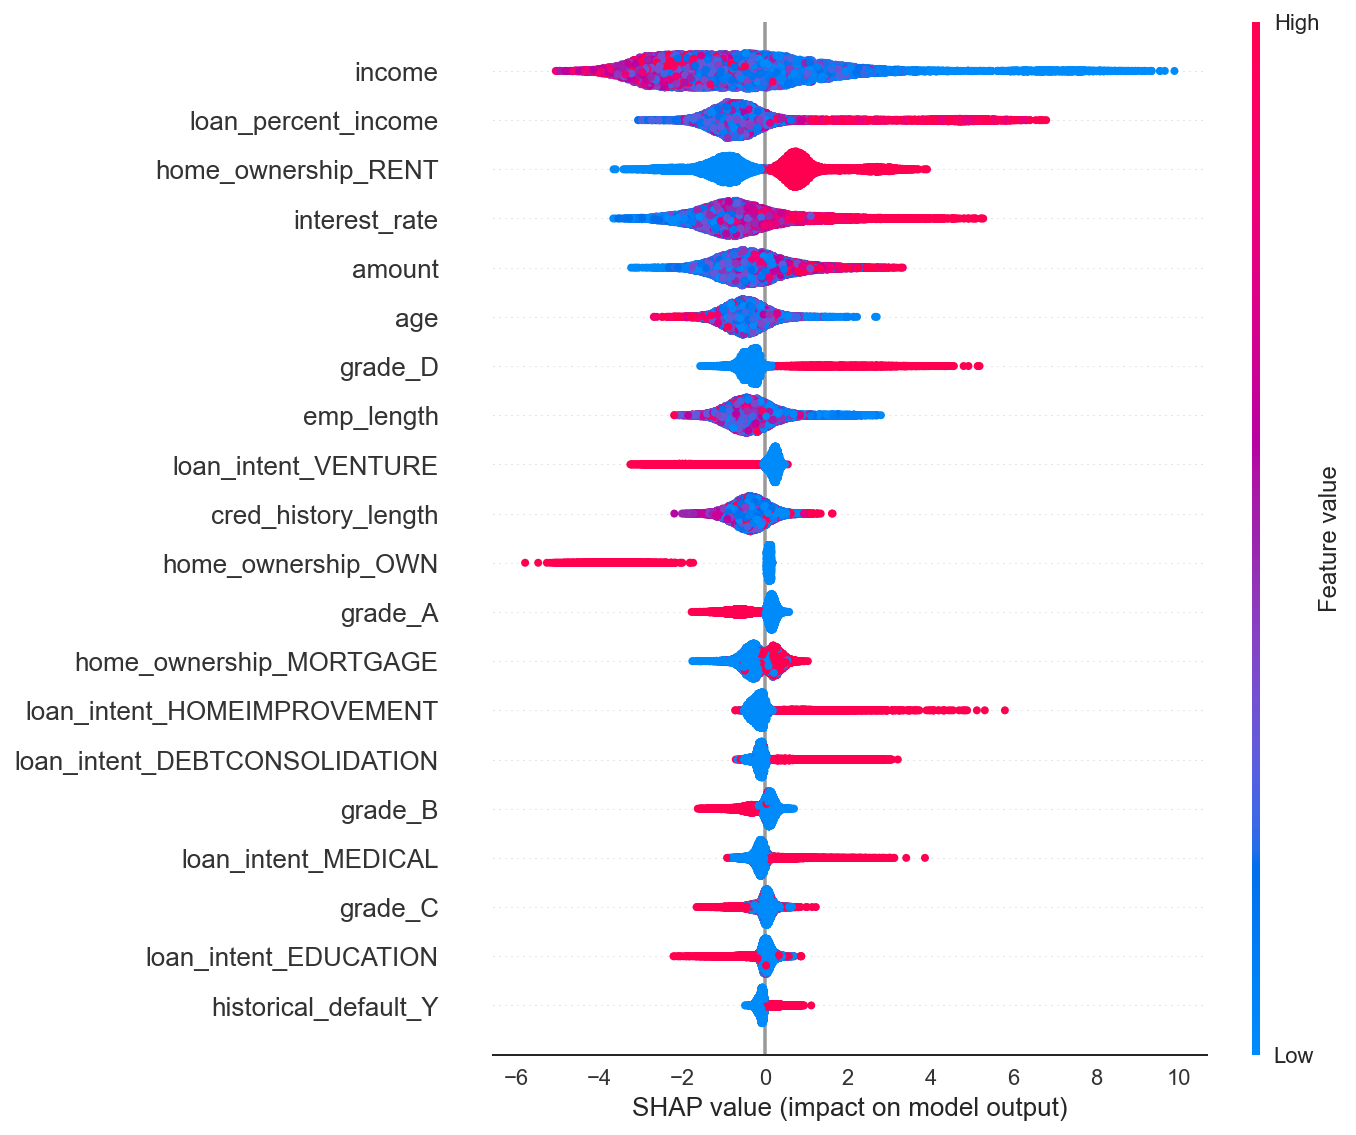

In [181]:
shap.summary_plot(shap_values, features=observations, feature_names=list(columns_pipeline))

That's better than the built-in feature importance on XGBoost because not only we can see what features are important but also how they affect our predictions.

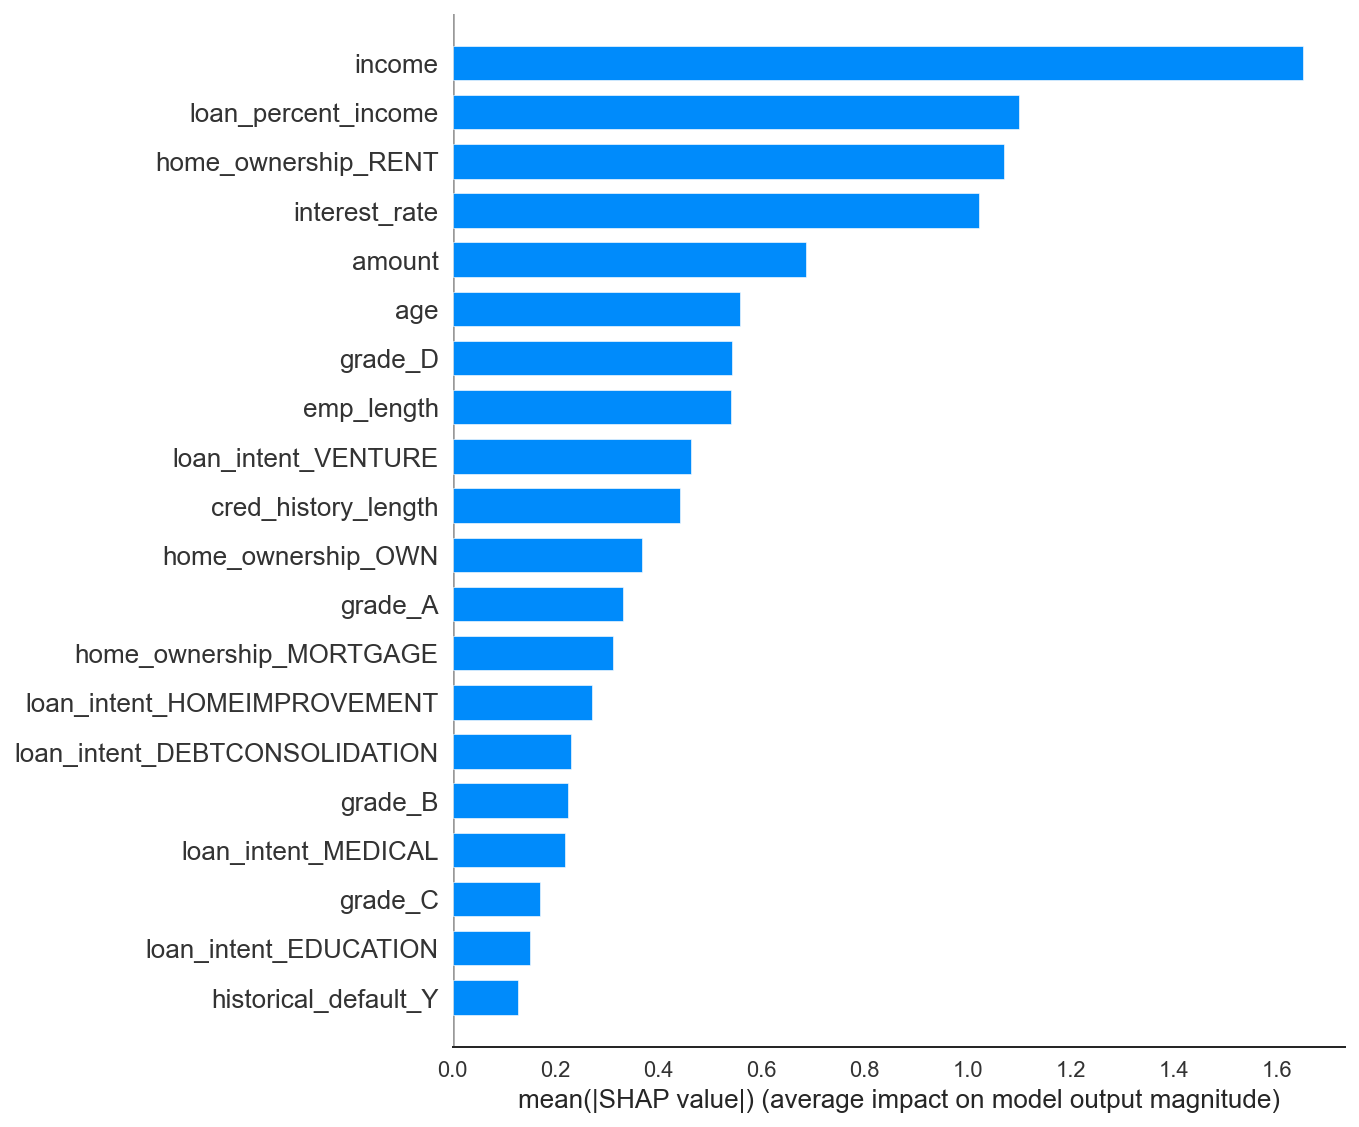

In [182]:
shap.summary_plot(shap_values, features=observations, feature_names=list(columns_pipeline), plot_type="bar")

### 6. GUI
Graphical User Interface, which is known as GUI, is a way for a person to communicate and interact with a system through icons or other visual indicators. 

In [254]:
# @hidden
df_data = df.copy()
form_item_layout = widgets.Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)


# displaying the text widget
text = widgets.Text(
    placeholder='Type in your <NAME> here',
    disabled=False
)

# add button that updates the graph based on the checkboxes
button = widgets.Button(description="Check credibility")

#display(button)
resultLabel = widgets.Label(
    value="",
    #visible = False,
    visibility = 'hidden',
    disabled = True
)

age = widgets.BoundedIntText(
    value=df_data.age.median(),
    min=18,
    max=100,
    step=1,
    disabled=False
)

income = widgets.BoundedFloatText(
    value=df_data.income.median(),
    min=0,
    max=df_data.income.max(),
    step=100,
    disabled=False,
    readout_format = ".2f"
)


home_ownership = widgets.Dropdown(
    options=[('RENT', 1), ('OWN', 2), ('MORTGAGE', 3)],
    value=1
)


emp_length = widgets.BoundedIntText(
    value=df_data.emp_length.median(),
    min=1,
    max=50,
    step=1,
    disabled=False
)


loan_intent = widgets.Dropdown(
    options=[('EDUCATION', 1), ('MEDICAL', 2), ('VENTURE', 3), ('HOME IMPROVEMENT', 4), ('PERSONAL', 5), ('DEBT CONSOLIDATION', 6)],
    value=1
)

grade = widgets.Dropdown(
    options=[('A', 1), ('B', 2), ('C', 3), ('D', 4), ('E', 5), ('F', 6), ('G', 7)],
    value=1
)

amount = widgets.BoundedFloatText(
    value=df_data.amount.median(),
    min=0,
    max=100000,
    step=500,
    readout_format = ".2f",
    disabled=False
)

interest_rate = widgets.BoundedFloatText(
    value=0,
    min=0,
    max=20,
    step=0.1,
    readout_format = ".2f",
    disabled=False
)

loan_percent_income = widgets.BoundedFloatText(
    value=df_data.loan_percent_income.median(),
    min=0,
    max=1,
    step=0.05,
    readout_format = ".2f",
    disabled=False
)

historical_default = widgets.Text(
    placeholder='N',
    disabled=False
)

historical_default = widgets.Dropdown(
    options=[('Y', 1), ('N', 2)],
    value=1
)

cred_history_length = widgets.BoundedFloatText(
    value=df_data.cred_history_length.median(),
    min=0,
    max=50,
    step=0.5,
    readout_format = ".2f",
    disabled=False
)

algos = widgets.Dropdown(options=['XGB (with RFE)', 'XGB (with PCA)'])

form_items = [
   Box([Label(value='Please, enter the name:'), text], layout=form_item_layout),
   Box([Label(value='Age:'), age], layout=form_item_layout),
   Box([Label(value='Income:'), income], layout=form_item_layout),
   Box([Label(value='Home Ownership:'), home_ownership], layout=form_item_layout),
   Box([Label(value='Employment Length (in years):'), emp_length], layout=form_item_layout),
   Box([Label(value='Loan Intent:'), loan_intent], layout=form_item_layout),
   Box([Label(value='Grade:'), grade], layout=form_item_layout),
   Box([Label(value='Interest Rate:'), interest_rate], layout=form_item_layout),
   Box([Label(value='Loan to income ratio:'), loan_percent_income], layout=form_item_layout),
   Box([Label(value='Historical Default:'), historical_default], layout=form_item_layout),
   Box([Label(value='Credit History Length:'), cred_history_length], layout=form_item_layout),
   Box([Label(value='Loan Amount:'), amount], layout=form_item_layout),
   Box([Label(value='Algorithm:'),algos], layout=form_item_layout),
   button,
   Box([Label(value='Result:'), resultLabel], layout=form_item_layout),
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='dashed 2px',
    align_items='stretch',
    width= '70%'
))

display(form)


# function to deal with the checkbox update button       
def on_button_clicked(b):
    name2 = text.value
    home_ownership2 = home_ownership
    amount2 = amount.value
    age2 = age.value
    income2 = income.value
    emp_length2 = emp_length.value
    loan_intent2 = loan_intent.value
    grade2 = grade.value
    interest_rate2 = interest_rate.value
    loan_percent_income2 = loan_percent_income.value
    historical_default2 = historical_default.value
    cred_history_length2 = cred_history_length.value
    algo2 = algos.value
    
    testARR = [age2, income2, home_ownership2, emp_length2,loan_intent2,grade2, amount2, interest_rate2, loan_percent_income2, historical_default2, cred_history_length2]
    testARR = np.array(testARR)
    testARR = testARR.reshape(1, -1)
    testARR = pd.DataFrame(testARR, columns = ['age', 'income', 'home_ownership', 'emp_length', 'loan_intent', 'grade', 'amount', 'interest_rate', 'loan_percent_income', 'historical_default', 'cred_history_length'])
    yGuess  = []
    
    if  algo2 == 'XGB (with RFE)':
        yGuess = clf_xgb_rfe.predict(testARR)
    elif algo2 == 'XGB (with PCA)':
        yGuess = clf_xgb_pca.predict(testARR)
    else: 
        yGuess = clf_xgb_rfe.predict(testARR)
    
    if(yGuess[0] == 0):
        resultLabel.value = text.value + ' can be provided with the loan.'    
    else:
        resultLabel.value = text.value + ' should not be provided with the loan.'
        
button.on_click(on_button_clicked)
plt.show()

Box(children=(Box(children=(Label(value='Please, enter the name:'), Text(value='', placeholder='Type in your <…